# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Matplolib default parameters
from matplotlib import rcParams
plt.style.use('default')
plt.rcParams['axes.prop_cycle'] = plt.rcParamsDefault['axes.prop_cycle']

# import warning
import warnings
warnings.filterwarnings('ignore')

# Set option max columns display
pd.set_option('max_columns', 150)

# Data Info

In [3]:
# read data
df = pd.read_csv('marketing_data.csv')
df.sample(5)

ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
369   8524        1974         PhD       Divorced  $25,509.00         1   
425   9560        1965  Graduation       Together  $83,003.00         0   
753   6177        1985         PhD        Married  $33,454.00         1   
2071  5562        1974  Graduation        Married  $60,093.00         0   
1688  6218        1965  Graduation        Married  $59,594.00         0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
369          0     9/18/12       15        40          3               30   
425          0      3/3/13       18       856         61              570   
753          0      5/8/13       32        76         10               56   
2071         1     6/26/13       92       502         12              109   
1688         1    10/20/12       74       457          4               29   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
369                10                 7            11                  3   
425                40                25           122                  1   
753                 3                 1            23                  2   
2071               16                 6            90                  2   
1688                0                 0             9                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
369                 3                    0                  3   
425                 7                    6                  8   
753                 4                    0                  4   
2071                7                    2                 10   
1688                8                    1                  7   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
369                   9             0             0             0   
425                   3             0             0             1   
753                   8             0             0             0   
2071                  6             0             0             0   
1688                  7             0             1             0   

      AcceptedCmp1  AcceptedCmp2  Response  Complain Country  
369              0             0         1         0      SP  
425              0             0         1         0      SP  
753              0             0         0         0      US  
2071             0             0         0         0      SP  
1688             0             0         0         0      SP

In [49]:
#data = pd.read_csv('marketing_data.csv')
data = df.copy()

https://www.kaggle.com/jackdaoud/marketing-data/tasks?taskId=2986

## Info

In [4]:
df.shape

(2240, 28)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

` Income` will be converted into proper name `Income`

In [12]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

There is only 24 null values on `Income`

In [13]:
df.duplicated().sum()

0

There's no duplicated data

## Dictionary

Marketing 4P (people, product, promotion, place)
<br>
People:
- `ID `                     : Customer's unique identifier
- `Year_Birth`              : Customer's birth year
- `Education`               : Customer's education level
- `Marital_Status`          : Customer's marital status
- `Income`                  : Customer's yearly household income
- `Kidhome`                 : Number of children in customer's household
- `Teenhome`                : Number of teenagers in customer's household
- `Dt_Customer`             : Date of customer's enrollment with the company
- `Recency`                 : Number of days since customer's last purchase
- `Complain`                : 1 if customer complained in the last 2 years, 0 otherwise
- `Country`                 : Customer's location
<br>
<br>    
Products:
- `MntWines`                : Amount spent on wine in the last 2 years
- `MntFruits`               : Amount spent on fruits in the last 2 years
- `MntMeatProducts`         : Amount spent on meat in the last 2 years
- `MntFishProducts`         : Amount spent on fish in the last 2 years
- `MntSweetProducts`        : Amount spent on sweets in the last 2 years
- `MntGoldProds`            : Amount spent on gold in the last 2 years
<br>  
<br>    
Promotions:
- `NumDealsPurchases`       : Number of purchases made with a discount
- `AcceptedCmp3`            : 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- `AcceptedCmp4`            : 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- `AcceptedCmp5`            : 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- `AcceptedCmp1`            : 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- `AcceptedCmp2`            : 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- `Response`                : 1 if customer accepted the offer in the last campaign, 0 otherwise
<br>  
<br>    
Places:
- `NumWebPurchases`         : Number of purchases made through the company's web site
- `NumCatalogPurchases`     : Number of purchases made using a catalogue
- `NumStorePurchases`       : Number of purchases made directly in stores
- `NumWebVisitsMonth`       : Number of visits to company's web site in the last month


# Exploratory Data Analysis

In [7]:
# copy data only for exploratory data analysis
eda = df.copy()


# renaming 'Income' column for remove spacing
eda.rename(columns={' Income ':'Income'}, inplace=True)

In [53]:
eda.dtypes

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
Income                 object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object

## Descriptive Analysis

In [8]:
# devide group of featues by type of data
cat = eda.select_dtypes(include='object').columns
num = eda.select_dtypes(exclude='object').columns

### Unique Values

In [28]:
col = eda[cat].columns

for i in col:
    print(eda[i].value_counts(), '\n')

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64 

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64 

$7,500.00      12
$35,860.00      4
$46,098.00      3
$39,922.00      3
$67,445.00      3
               ..
$46,086.00      1
$42,243.00      1
$35,788.00      1
$36,026.00      1
$94,871.00      1
Name:  Income , Length: 1974, dtype: int64 

8/31/12    12
9/12/12    11
2/14/13    11
5/12/14    11
8/20/13    10
           ..
9/5/12      1
11/9/13     1
5/16/13     1
7/20/13     1
9/1/12      1
Name: Dt_Customer, Length: 663, dtype: int64 

SP     1095
SA      337
CA      268
AUS     160
IND     148
GER     120
US      109
ME        3
Name: Country, dtype: int64 



- `Dt_Customer` will be extracted into new columns such as `Date`, `Day`, `Months`, and `Year`
- Remove dollar sign '$' in `Income` column
- `Education` can be transformed into ordinal values in Pre Processing step
- in `Marital_Status` feature, some values that has meaning as single will be converted into `Single`

In [40]:
eda.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [9]:
# Remove dollar character in Income feature
eda['Income'] = eda['Income'].str.replace(r'\D', '').astype(float) #'\D' matches any character that is not a decimal digit.

In [10]:
# we will set the
import datetime
reference_date=datetime.datetime(2021,11,1)
print(reference_date)

2021-11-01 00:00:00


In [11]:
# Age = reference_date - year_birth, then drop 'Year_Birth' column
eda['Year_Birth'] = pd.to_datetime(eda['Year_Birth'], format='%Y')
eda['Age'] = (reference_date - eda['Year_Birth']).astype('timedelta64[Y]')
eda = eda.drop(['Year_Birth'], axis=1)

In [12]:
reference_date=datetime.datetime(2021,11,1)

# Tenure is the term used to describe the length of time a customer remains a customer.
eda['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
eda['Cust_Tenure'] = (reference_date - eda['Dt_Customer']).astype('timedelta64[Y]')
eda['Month_Registered'] = eda['Dt_Customer'].dt.month_name()
eda['Day_Registered'] = eda['Dt_Customer'].dt.day_name()
eda['Registered_on_weekend'] = np.where(eda['Day_Registered'] == 'Sunday',1,
                               np.where(eda['Day_Registered'] == 'Saturday',1,0))

# drop Dt_Customer column
eda = eda.drop(['Dt_Customer'],axis=1)

In [13]:
# devide group of featues by type of data
cat = eda.select_dtypes(include='object').columns
num = eda.select_dtypes(exclude='object').columns

### Statical Analysis

In [96]:
eda[num].describe().T

count          mean           std       min  \
ID                     2240.0  5.592160e+03  3.246662e+03       0.0   
Income                 2216.0  5.224725e+06  2.517308e+06  173000.0   
Kidhome                2240.0  4.441964e-01  5.383981e-01       0.0   
Teenhome               2240.0  5.062500e-01  5.445382e-01       0.0   
Recency                2240.0  4.910938e+01  2.896245e+01       0.0   
MntWines               2240.0  3.039357e+02  3.365974e+02       0.0   
MntFruits              2240.0  2.630223e+01  3.977343e+01       0.0   
MntMeatProducts        2240.0  1.669500e+02  2.257154e+02       0.0   
MntFishProducts        2240.0  3.752545e+01  5.462898e+01       0.0   
MntSweetProducts       2240.0  2.706295e+01  4.128050e+01       0.0   
MntGoldProds           2240.0  4.402188e+01  5.216744e+01       0.0   
NumDealsPurchases      2240.0  2.325000e+00  1.932238e+00       0.0   
NumWebPurchases        2240.0  4.084821e+00  2.778714e+00       0.0   
NumCatalogPurchases    2240.0  2.662054e+00  2.923101e+00       0.0   
NumStorePurchases      2240.0  5.790179e+00  3.250958e+00       0.0   
NumWebVisitsMonth      2240.0  5.316518e+00  2.426645e+00       0.0   
AcceptedCmp3           2240.0  7.276786e-02  2.598131e-01       0.0   
AcceptedCmp4           2240.0  7.455357e-02  2.627283e-01       0.0   
AcceptedCmp5           2240.0  7.276786e-02  2.598131e-01       0.0   
AcceptedCmp1           2240.0  6.428571e-02  2.453160e-01       0.0   
AcceptedCmp2           2240.0  1.339286e-02  1.149756e-01       0.0   
Response               2240.0  1.491071e-01  3.562736e-01       0.0   
Complain               2240.0  9.375000e-03  9.639117e-02       0.0   
Age                    2240.0  5.219420e+01  1.198407e+01      25.0   
Cust_Tenure            2240.0  7.810714e+00  6.587925e-01       7.0   
Registered_on_weekend  2240.0  2.825893e-01  4.503589e-01       0.0   

                              25%        50%         75%         max  
ID                        2828.25     5458.5     8427.75     11191.0  
Income                 3530300.00  5138150.0  6852200.00  66666600.0  
Kidhome                      0.00        0.0        1.00         2.0  
Teenhome                     0.00        0.0        1.00         2.0  
Recency                     24.00       49.0       74.00        99.0  
MntWines                    23.75      173.5      504.25      1493.0  
MntFruits                    1.00        8.0       33.00       199.0  
MntMeatProducts             16.00       67.0      232.00      1725.0  
MntFishProducts              3.00       12.0       50.00       259.0  
MntSweetProducts             1.00        8.0       33.00       263.0  
MntGoldProds                 9.00       24.0       56.00       362.0  
NumDealsPurchases            1.00        2.0        3.00        15.0  
NumWebPurchases              2.00        4.0        6.00        27.0  
NumCatalogPurchases          0.00        2.0        4.00        28.0  
NumStorePurchases            3.00        5.0        8.00        13.0  
NumWebVisitsMonth            3.00        6.0        7.00        20.0  
AcceptedCmp3                 0.00        0.0        0.00         1.0  
AcceptedCmp4                 0.00        0.0        0.00         1.0  
AcceptedCmp5                 0.00        0.0        0.00         1.0  
AcceptedCmp1                 0.00        0.0        0.00         1.0  
AcceptedCmp2                 0.00        0.0        0.00         1.0  
Response                     0.00        0.0        0.00         1.0  
Complain                     0.00        0.0        0.00         1.0  
Age                         44.00       51.0       62.00       128.0  
Cust_Tenure                  7.00        8.0        8.00         9.0  
Registered_on_weekend        0.00        0.0        1.00         1.0

- `MntWines`,`MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, and `MntGoldProds` have extreme values
- `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, and `MntGoldProds` also right skewed

## Univariate Analysis

### Boxplot

In [97]:
len(num)

26

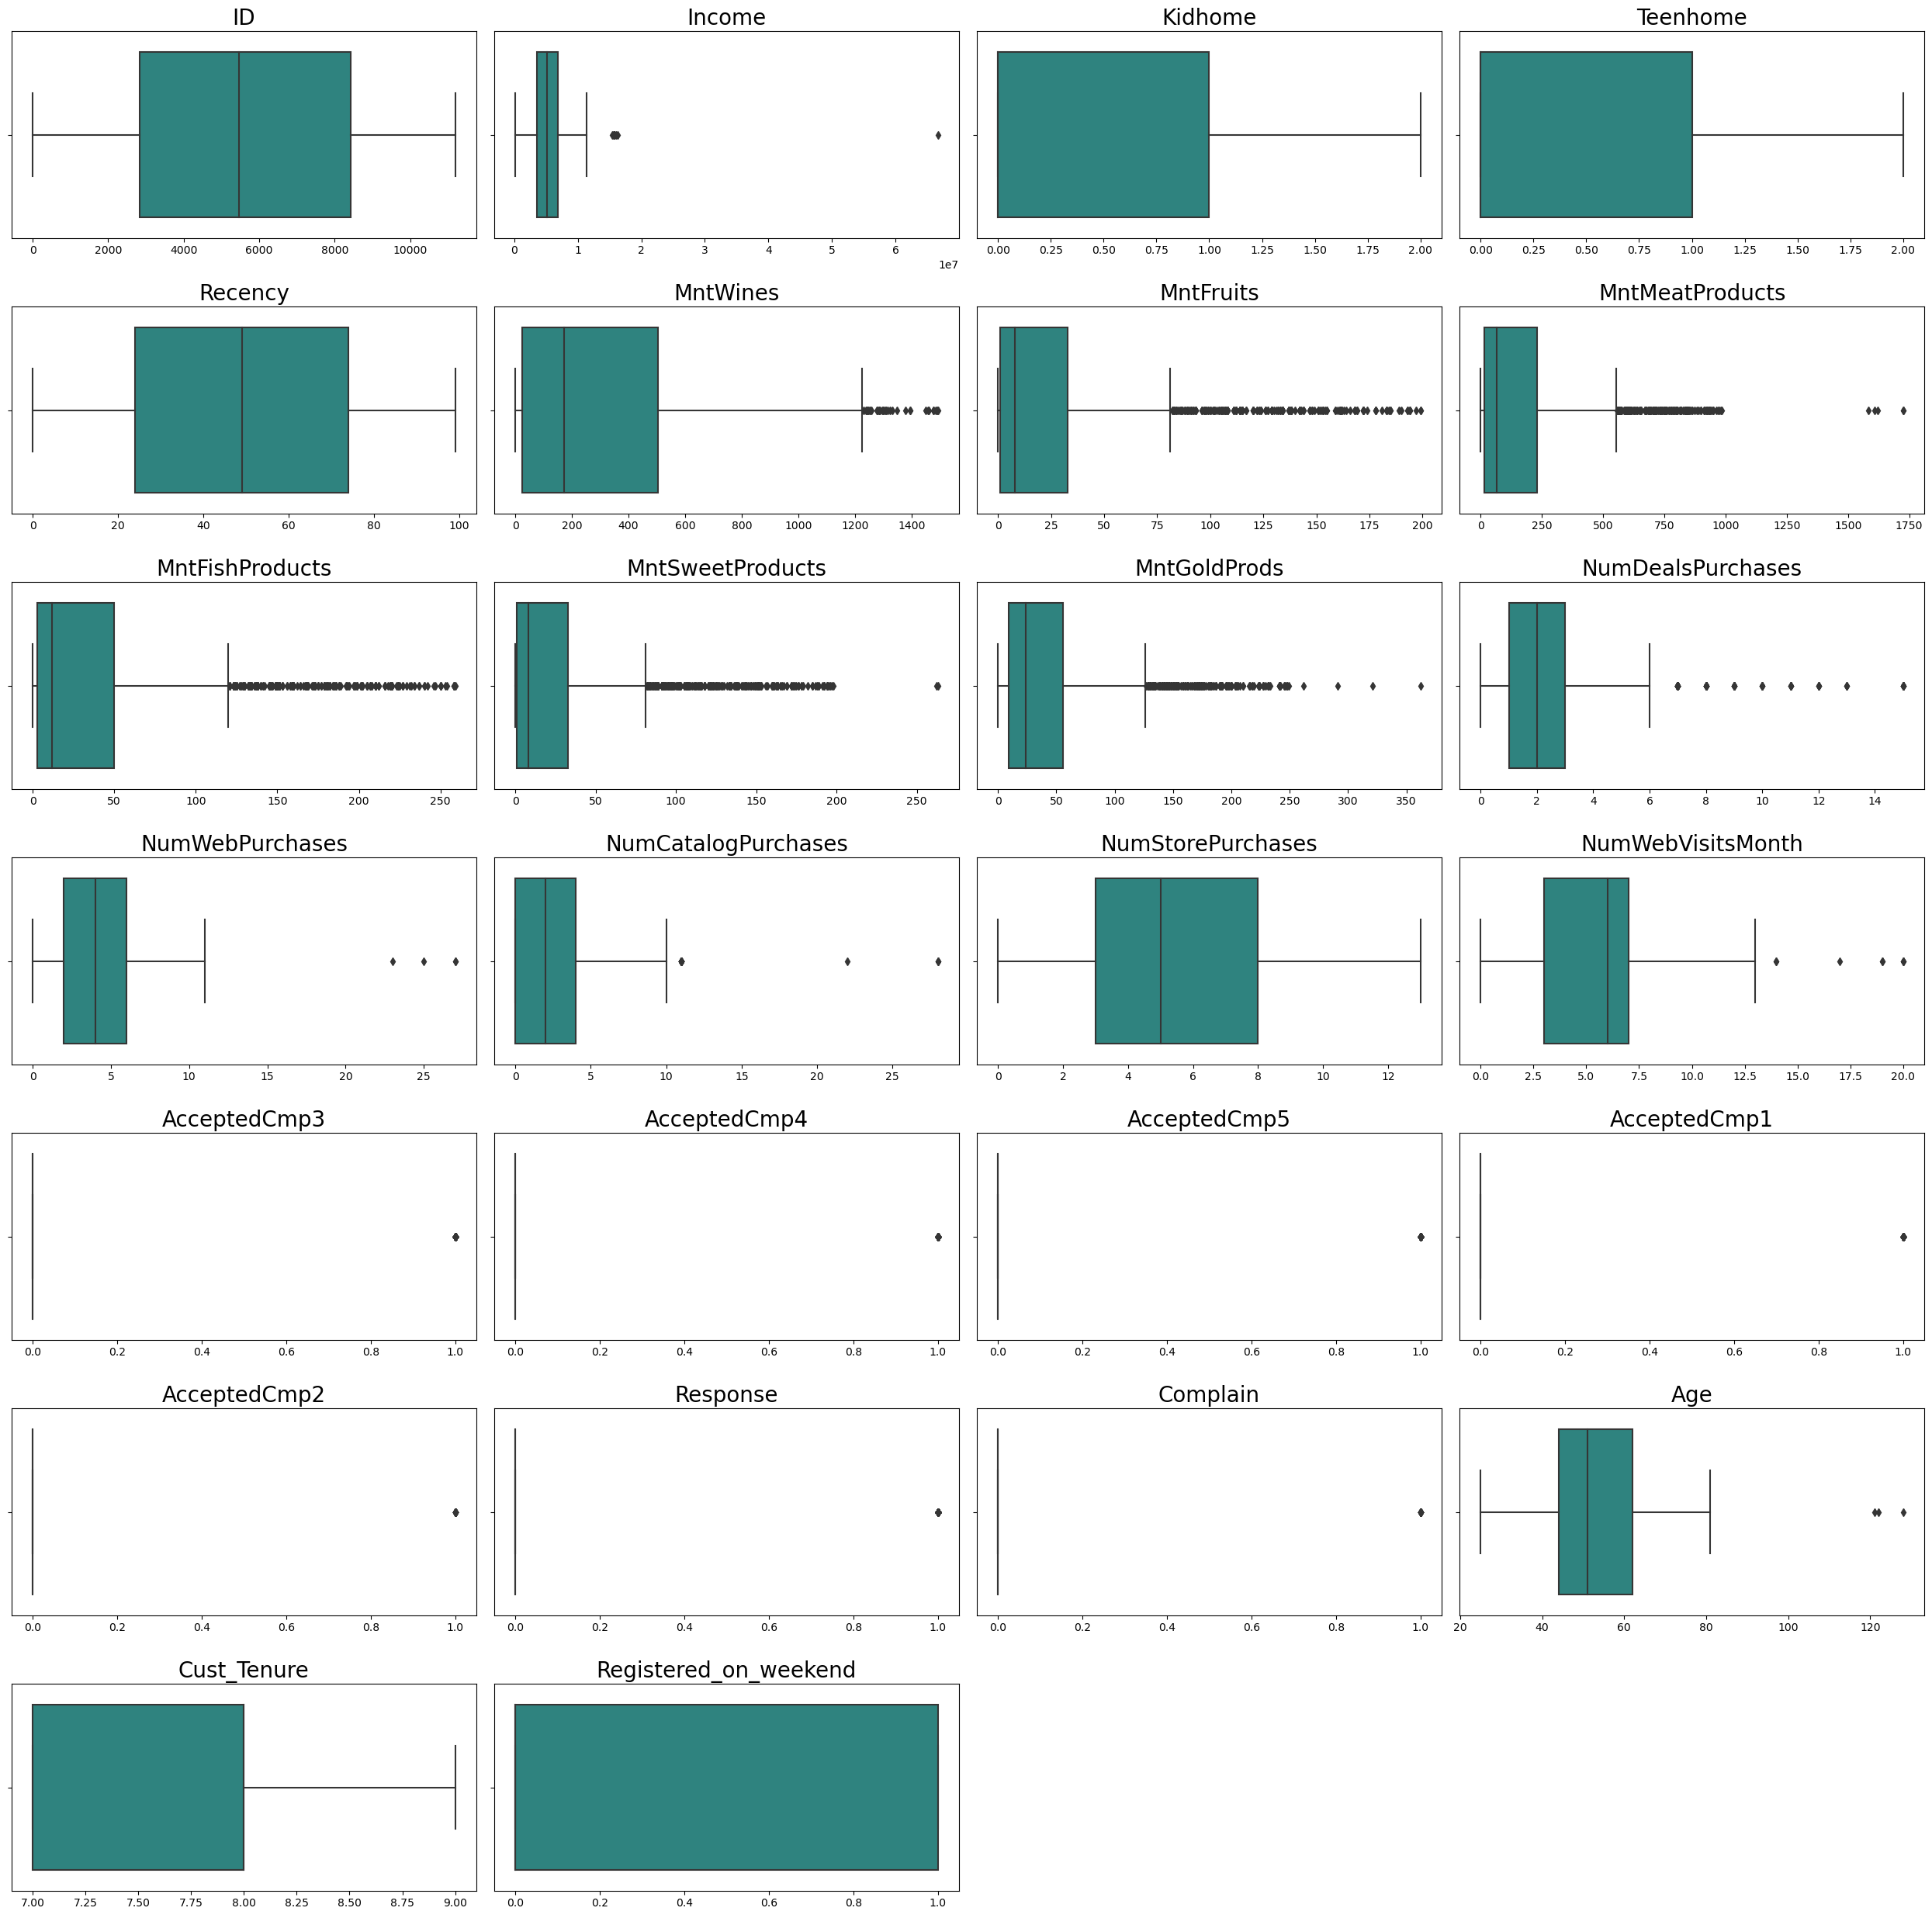

In [98]:
plt.figure(figsize=(25,25))
for i in range(0, len(num)):
    plt.subplot(7,4,i+1)
    sns.boxplot(x=eda[num[i]], palette='viridis')
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

- all `Mnt__` columns have a lot of outliers
- `AcceptedCmp` columns are boolean 
- `Age` feature will be handled later, it has weird data as an outlier 

### Displot

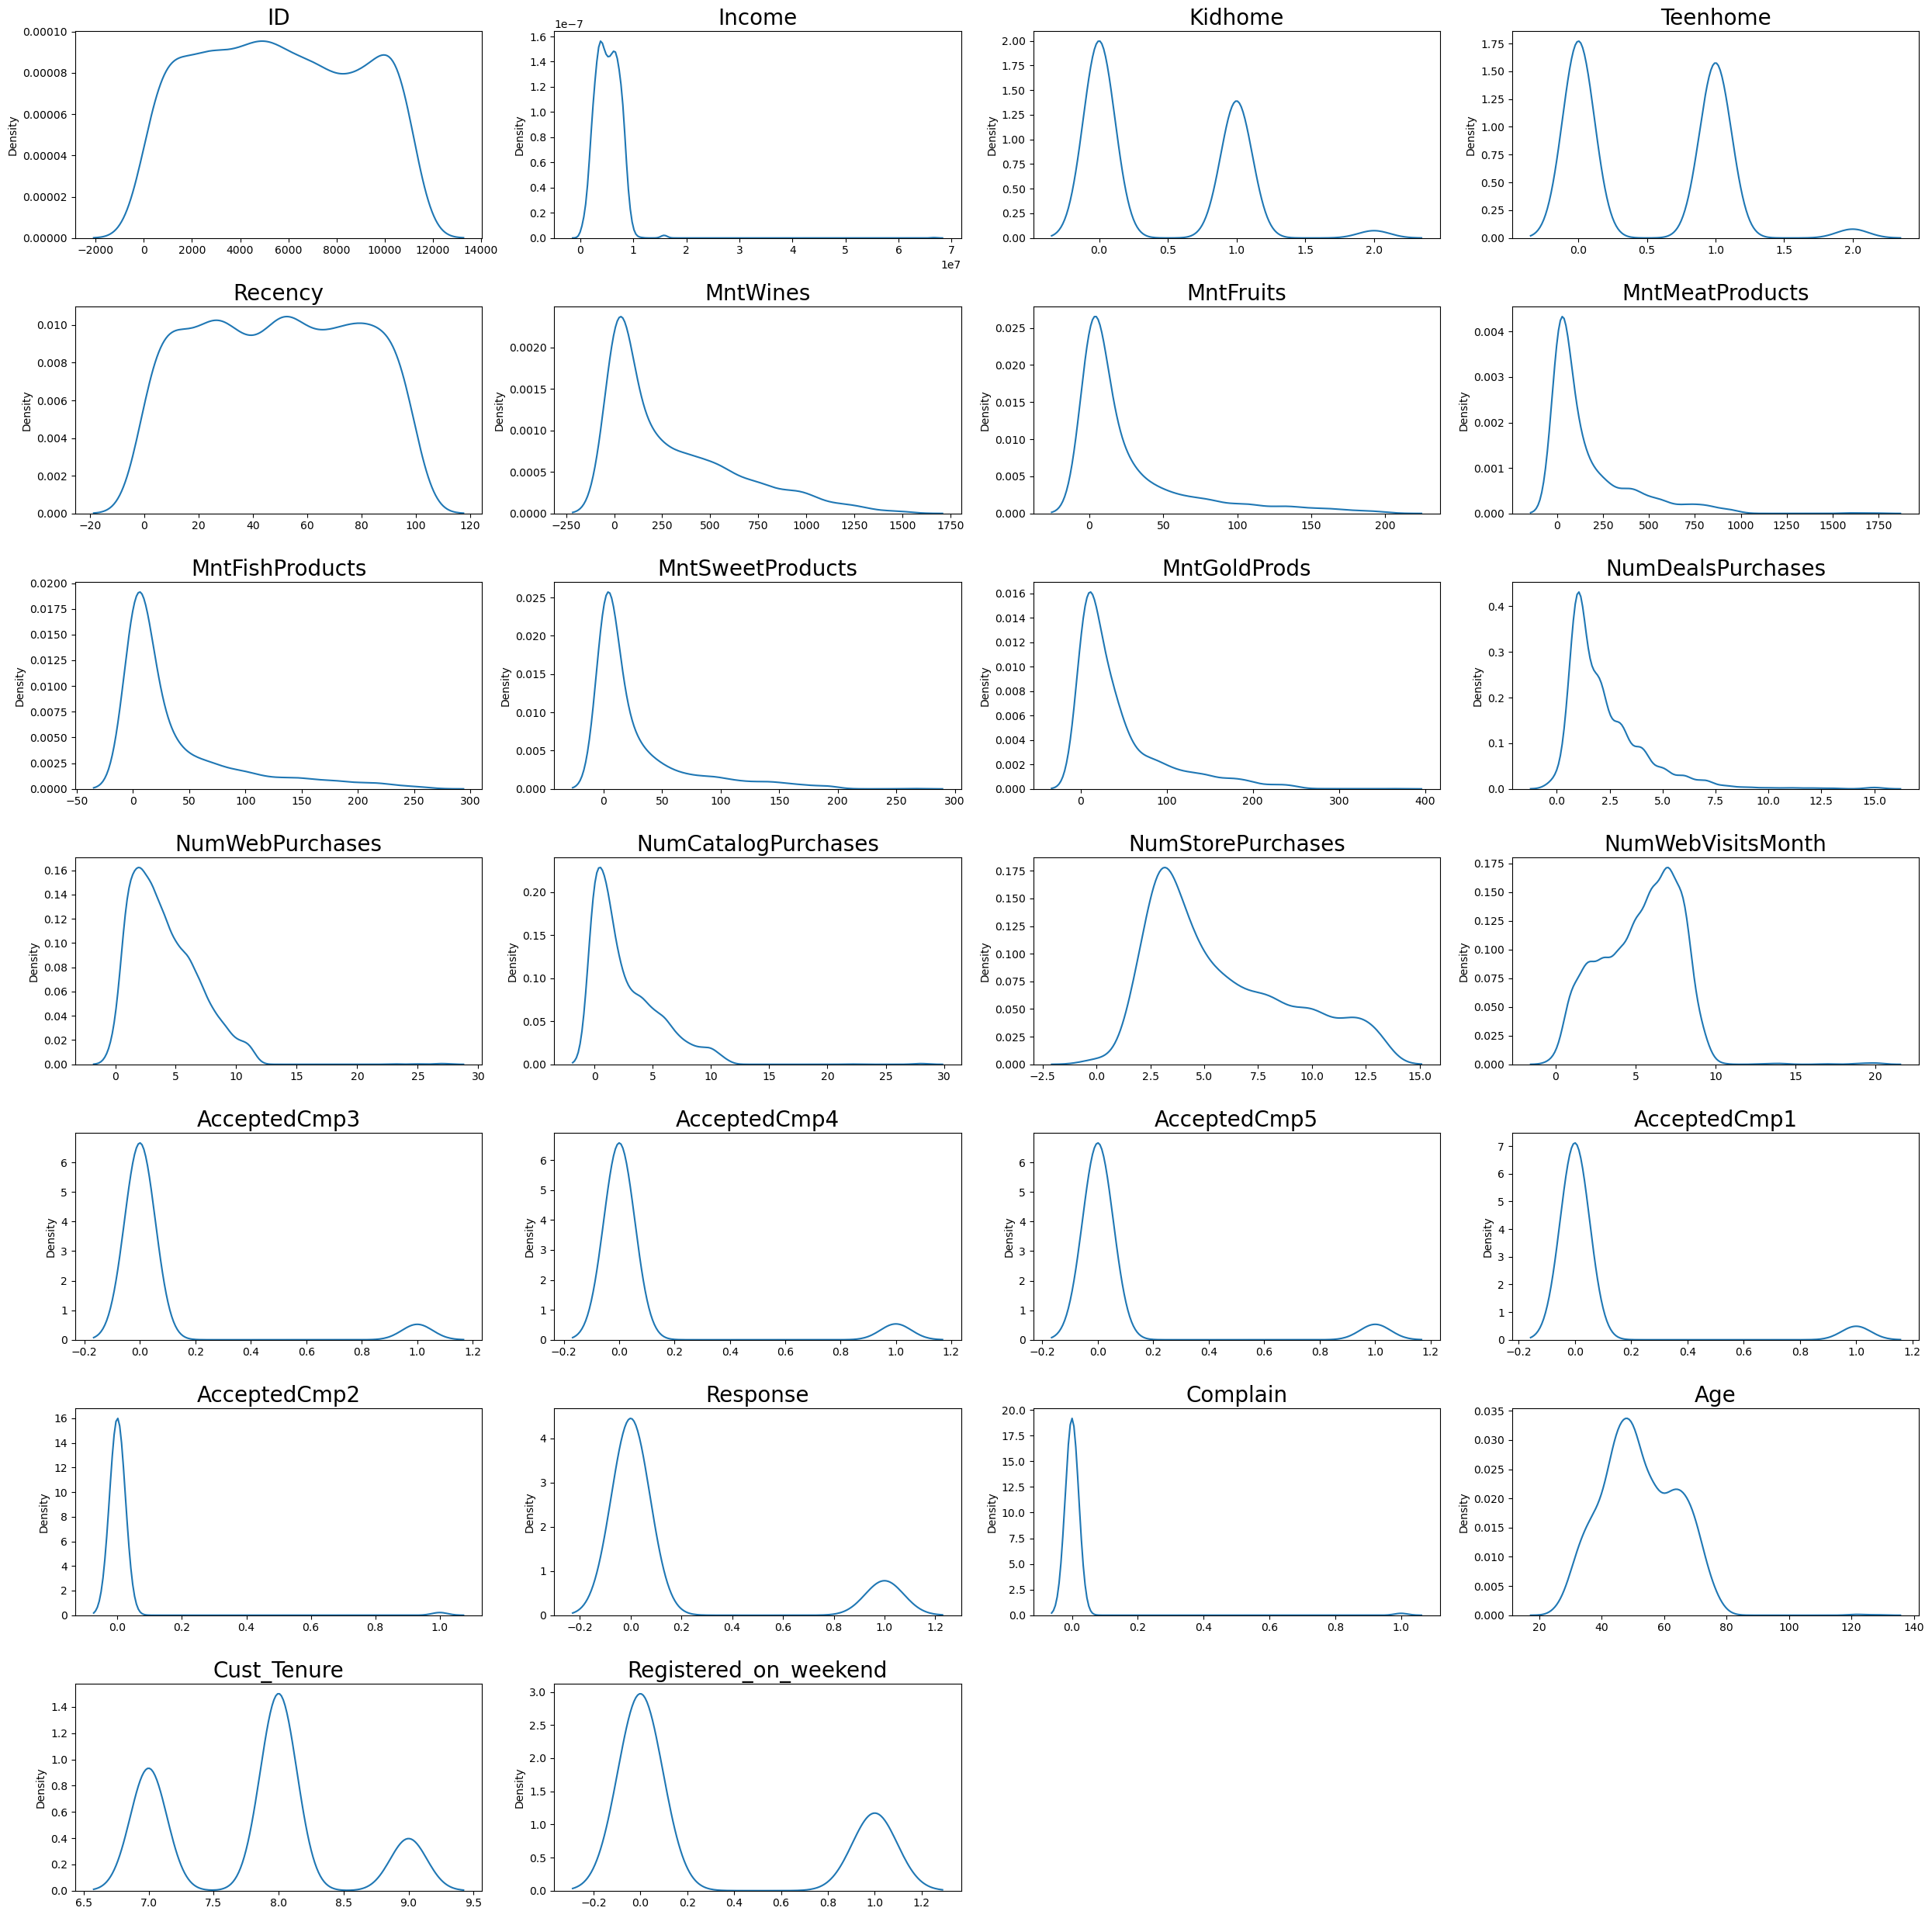

In [101]:
plt.figure(figsize=(25,25))
for i in range(0, len(num)):
    plt.subplot(7,4,i+1)
    sns.kdeplot(x=eda[num[i]], palette='viridis')
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

- All `Mnt__` and `Num__` are right skewed
- All `Mnt__` are dominated by 0
- `Age` is the only feature that has slightly normal distribution

### Violin Plot

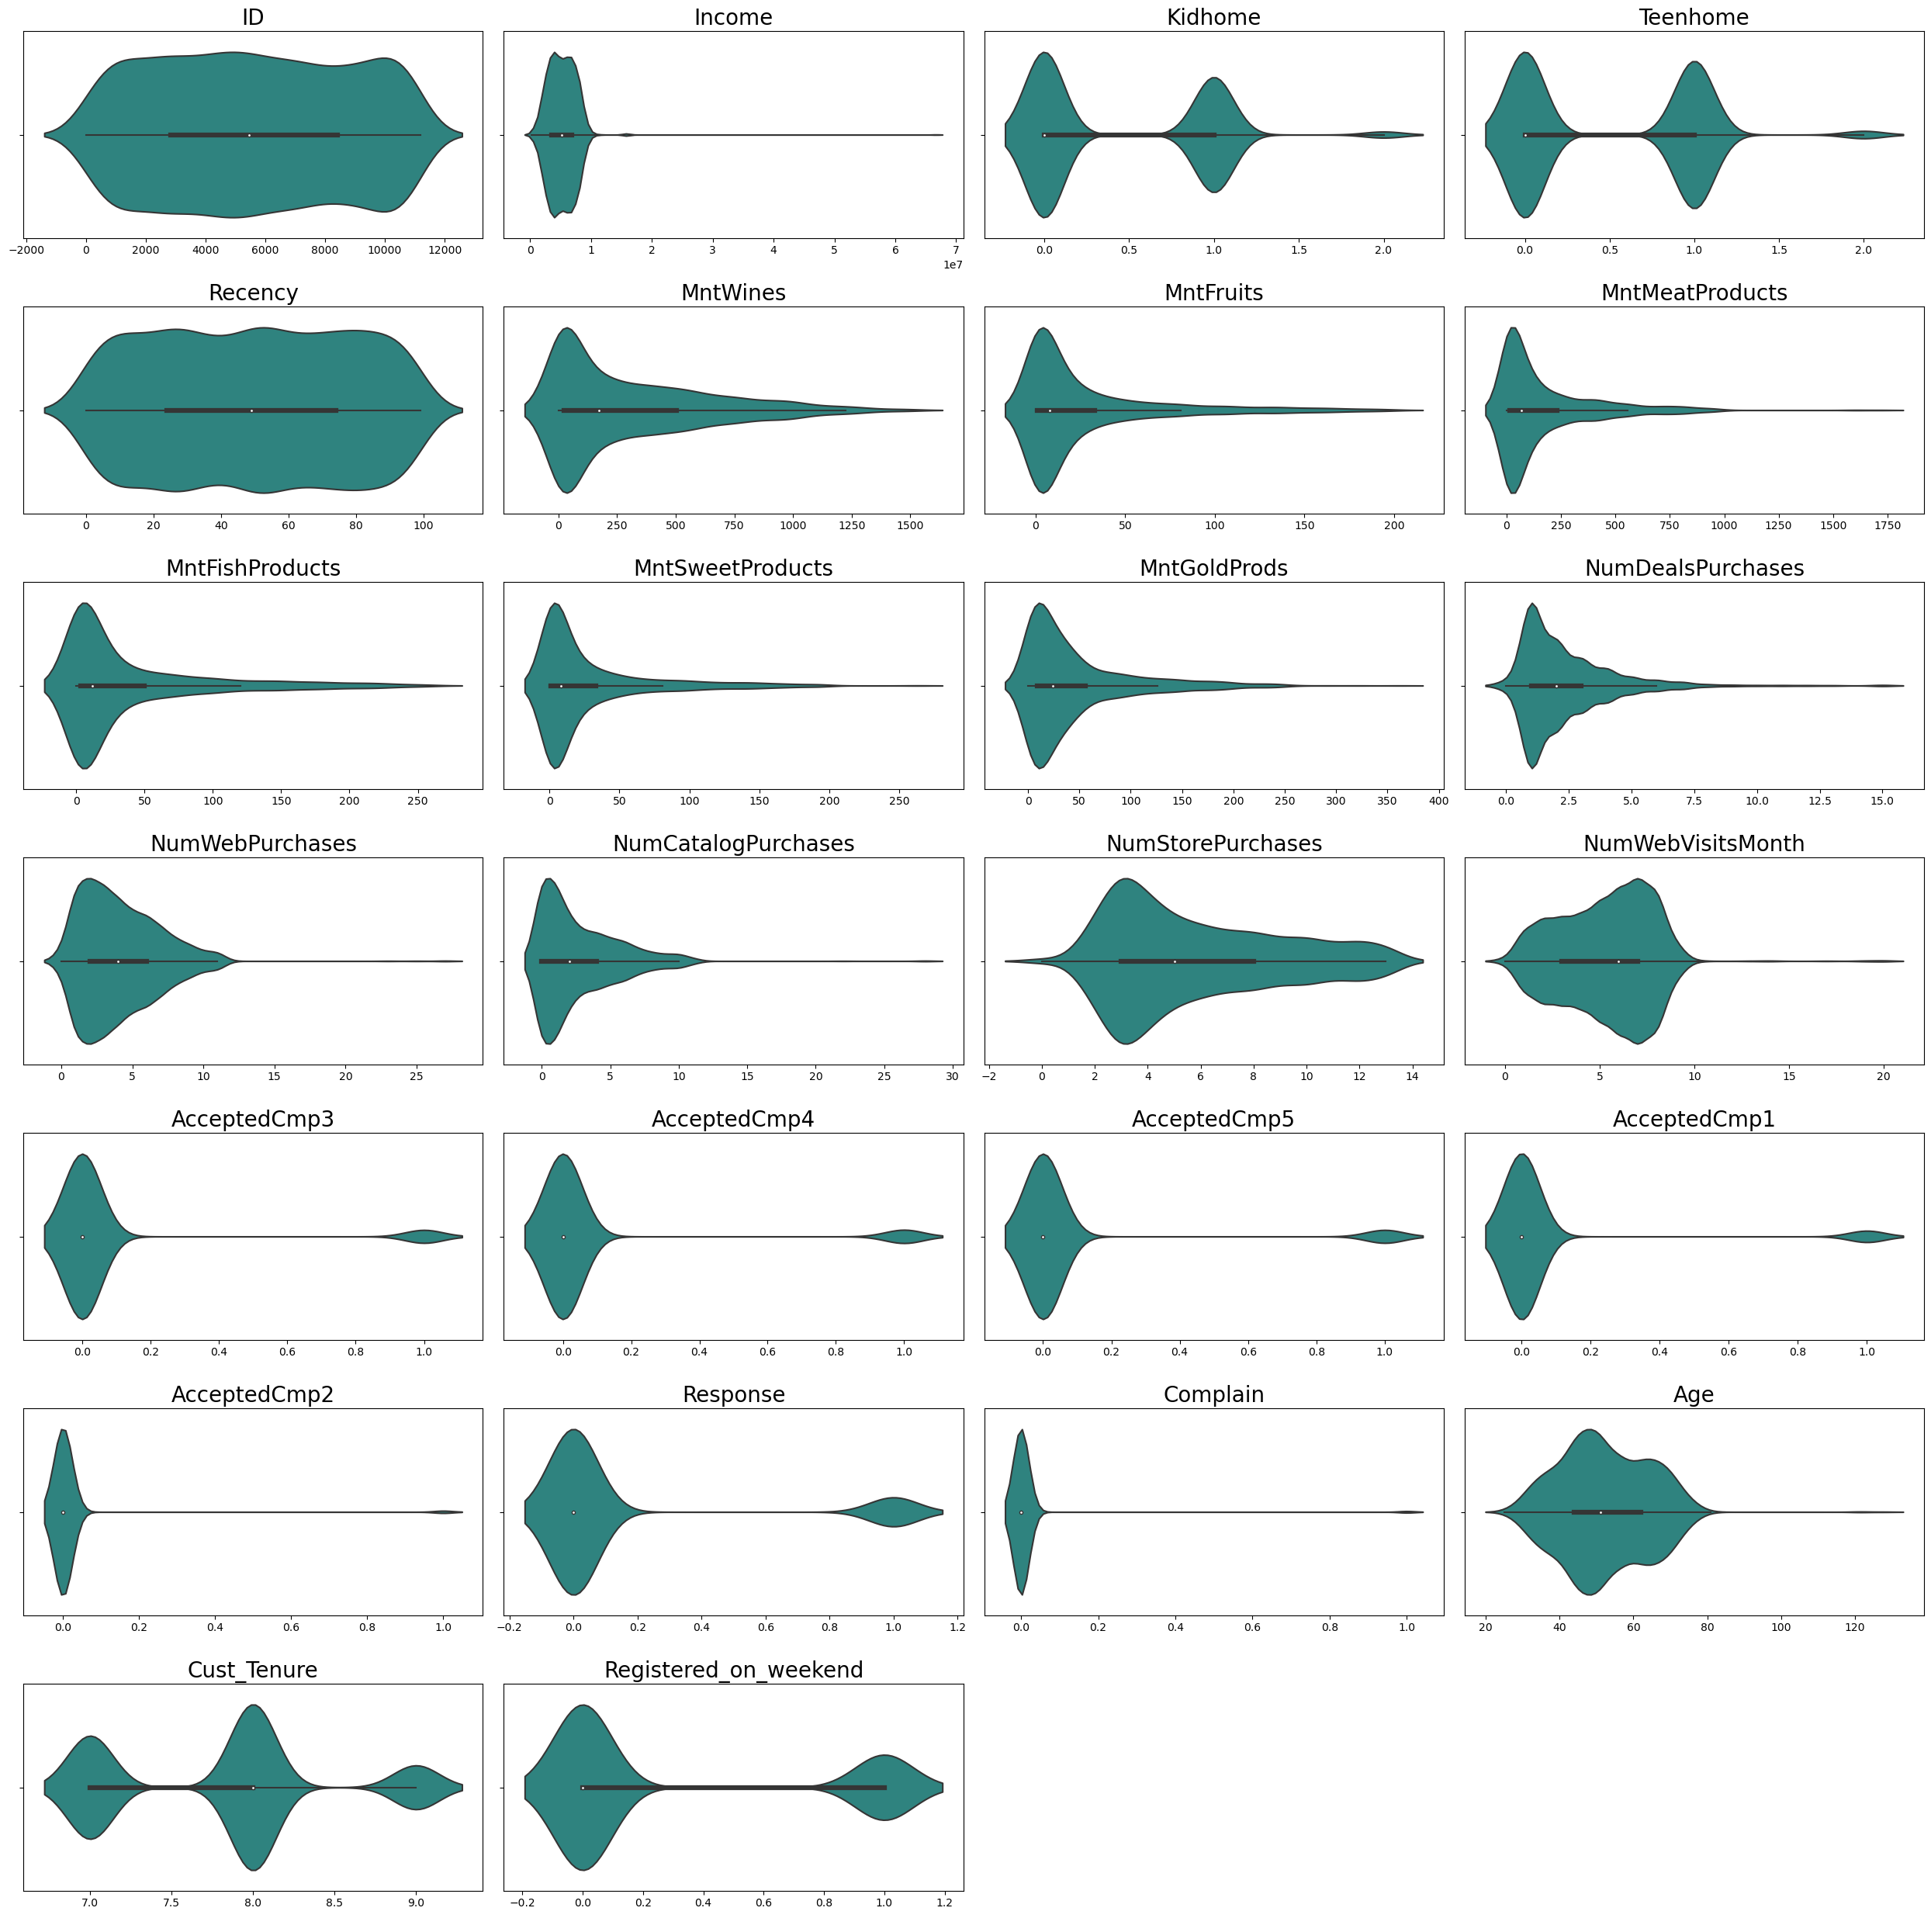

In [102]:
plt.figure(figsize=(25,25))
for i in range(0, len(num)):
    plt.subplot(7,4,i+1)
    sns.violinplot(x=eda[num[i]], palette='viridis')
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

### Countplot

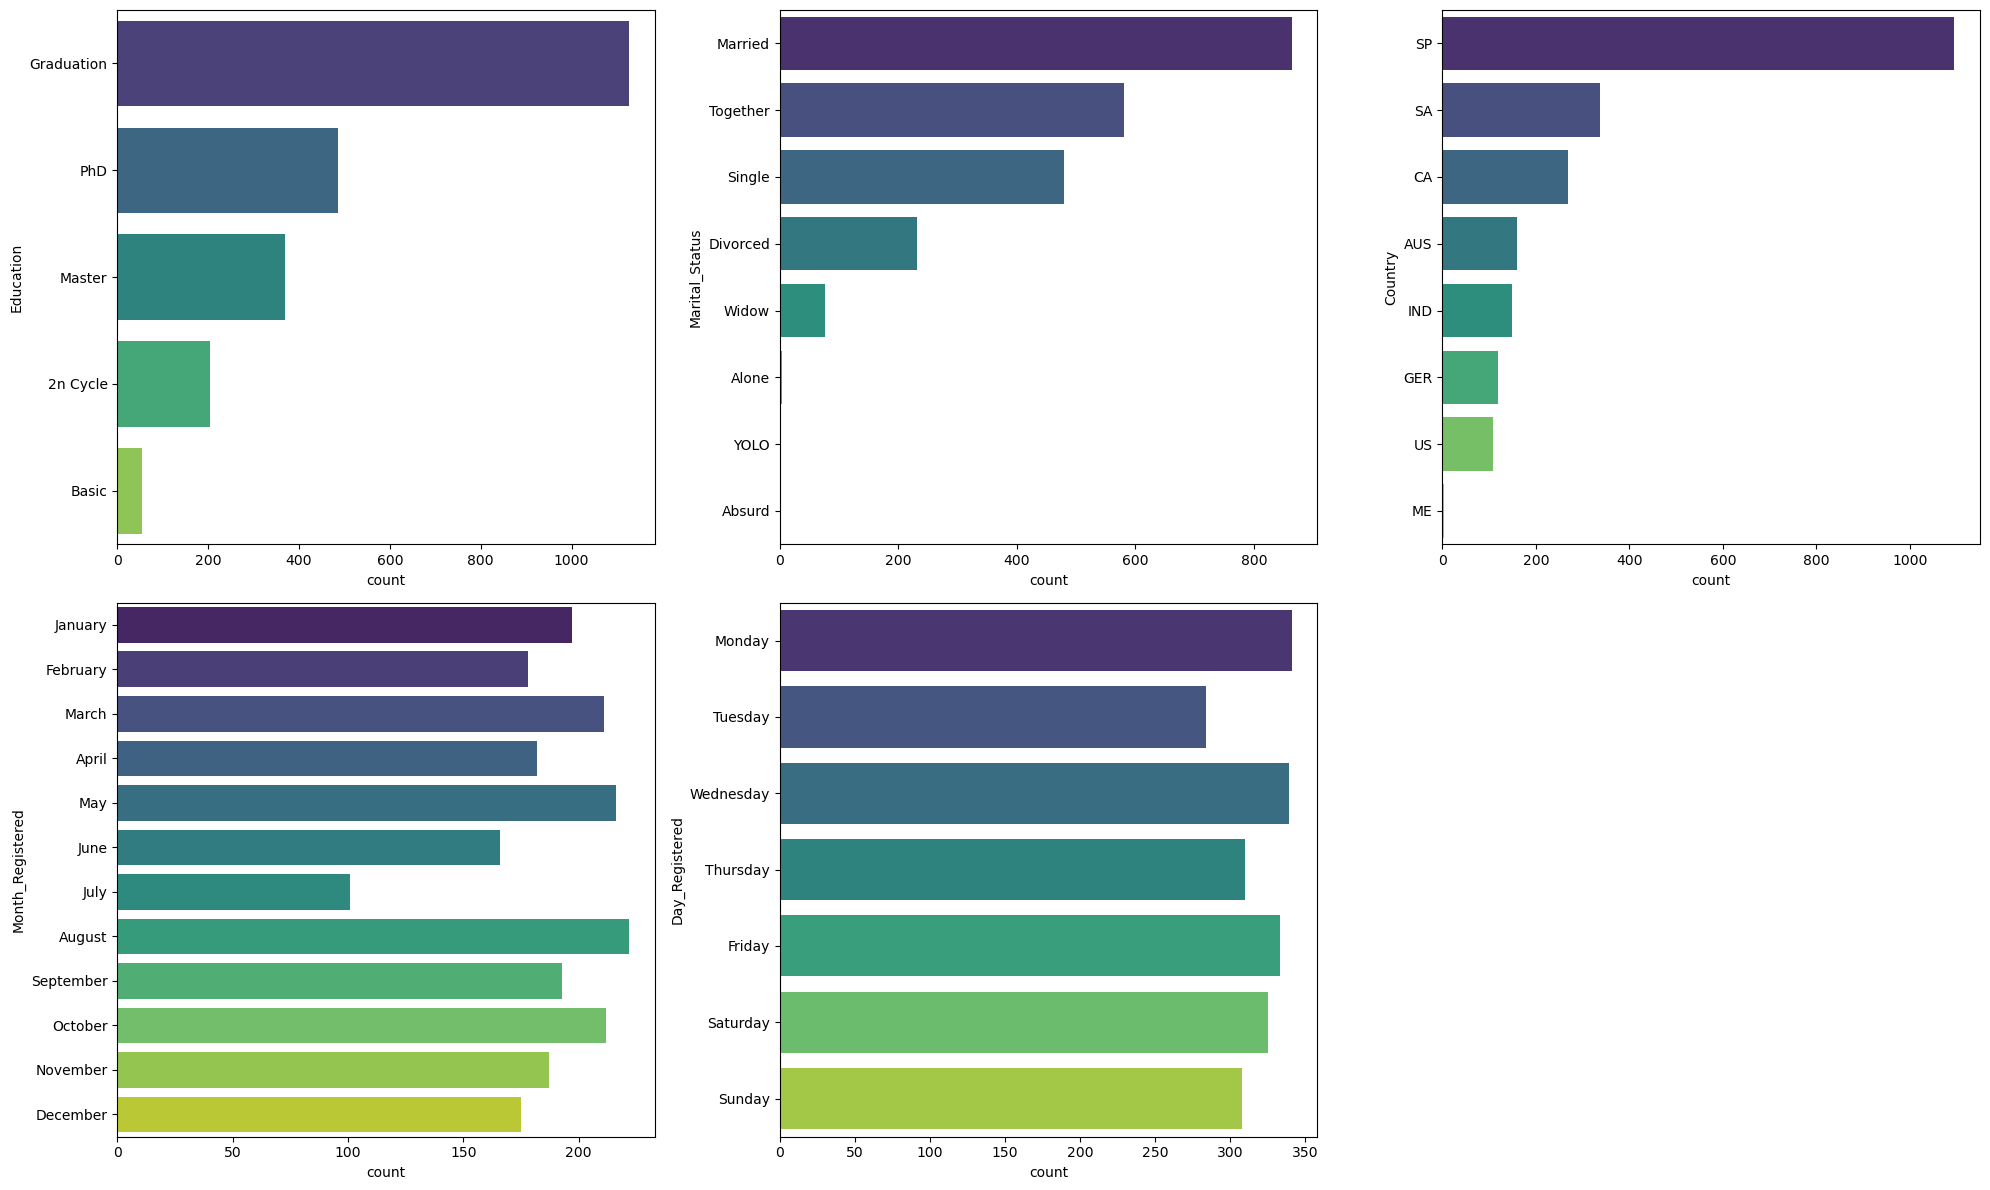

In [119]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
fig, axes = plt.subplots(2,3, figsize=(20,12))
xy = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2)]

for i in range(len(cat)):
    if i == 3:
        sns.countplot(y=eda[cat[i]], palette='viridis', ax=axes[xy[i]], order=month_order)
        plt.tight_layout()
    elif i == 4:
        sns.countplot(y=eda[cat[i]], palette='viridis', ax=axes[xy[i]], order=days_order)
        plt.tight_layout()
    else:
        sns.countplot(y=eda[cat[i]], palette='viridis', ax=axes[xy[i]], order=df[cat[i]].value_counts().index)
        plt.tight_layout() 
axes[1,2].axis('off')
plt.tight_layout()

## Bivariate Analysis

### Numerical Feature Analysis

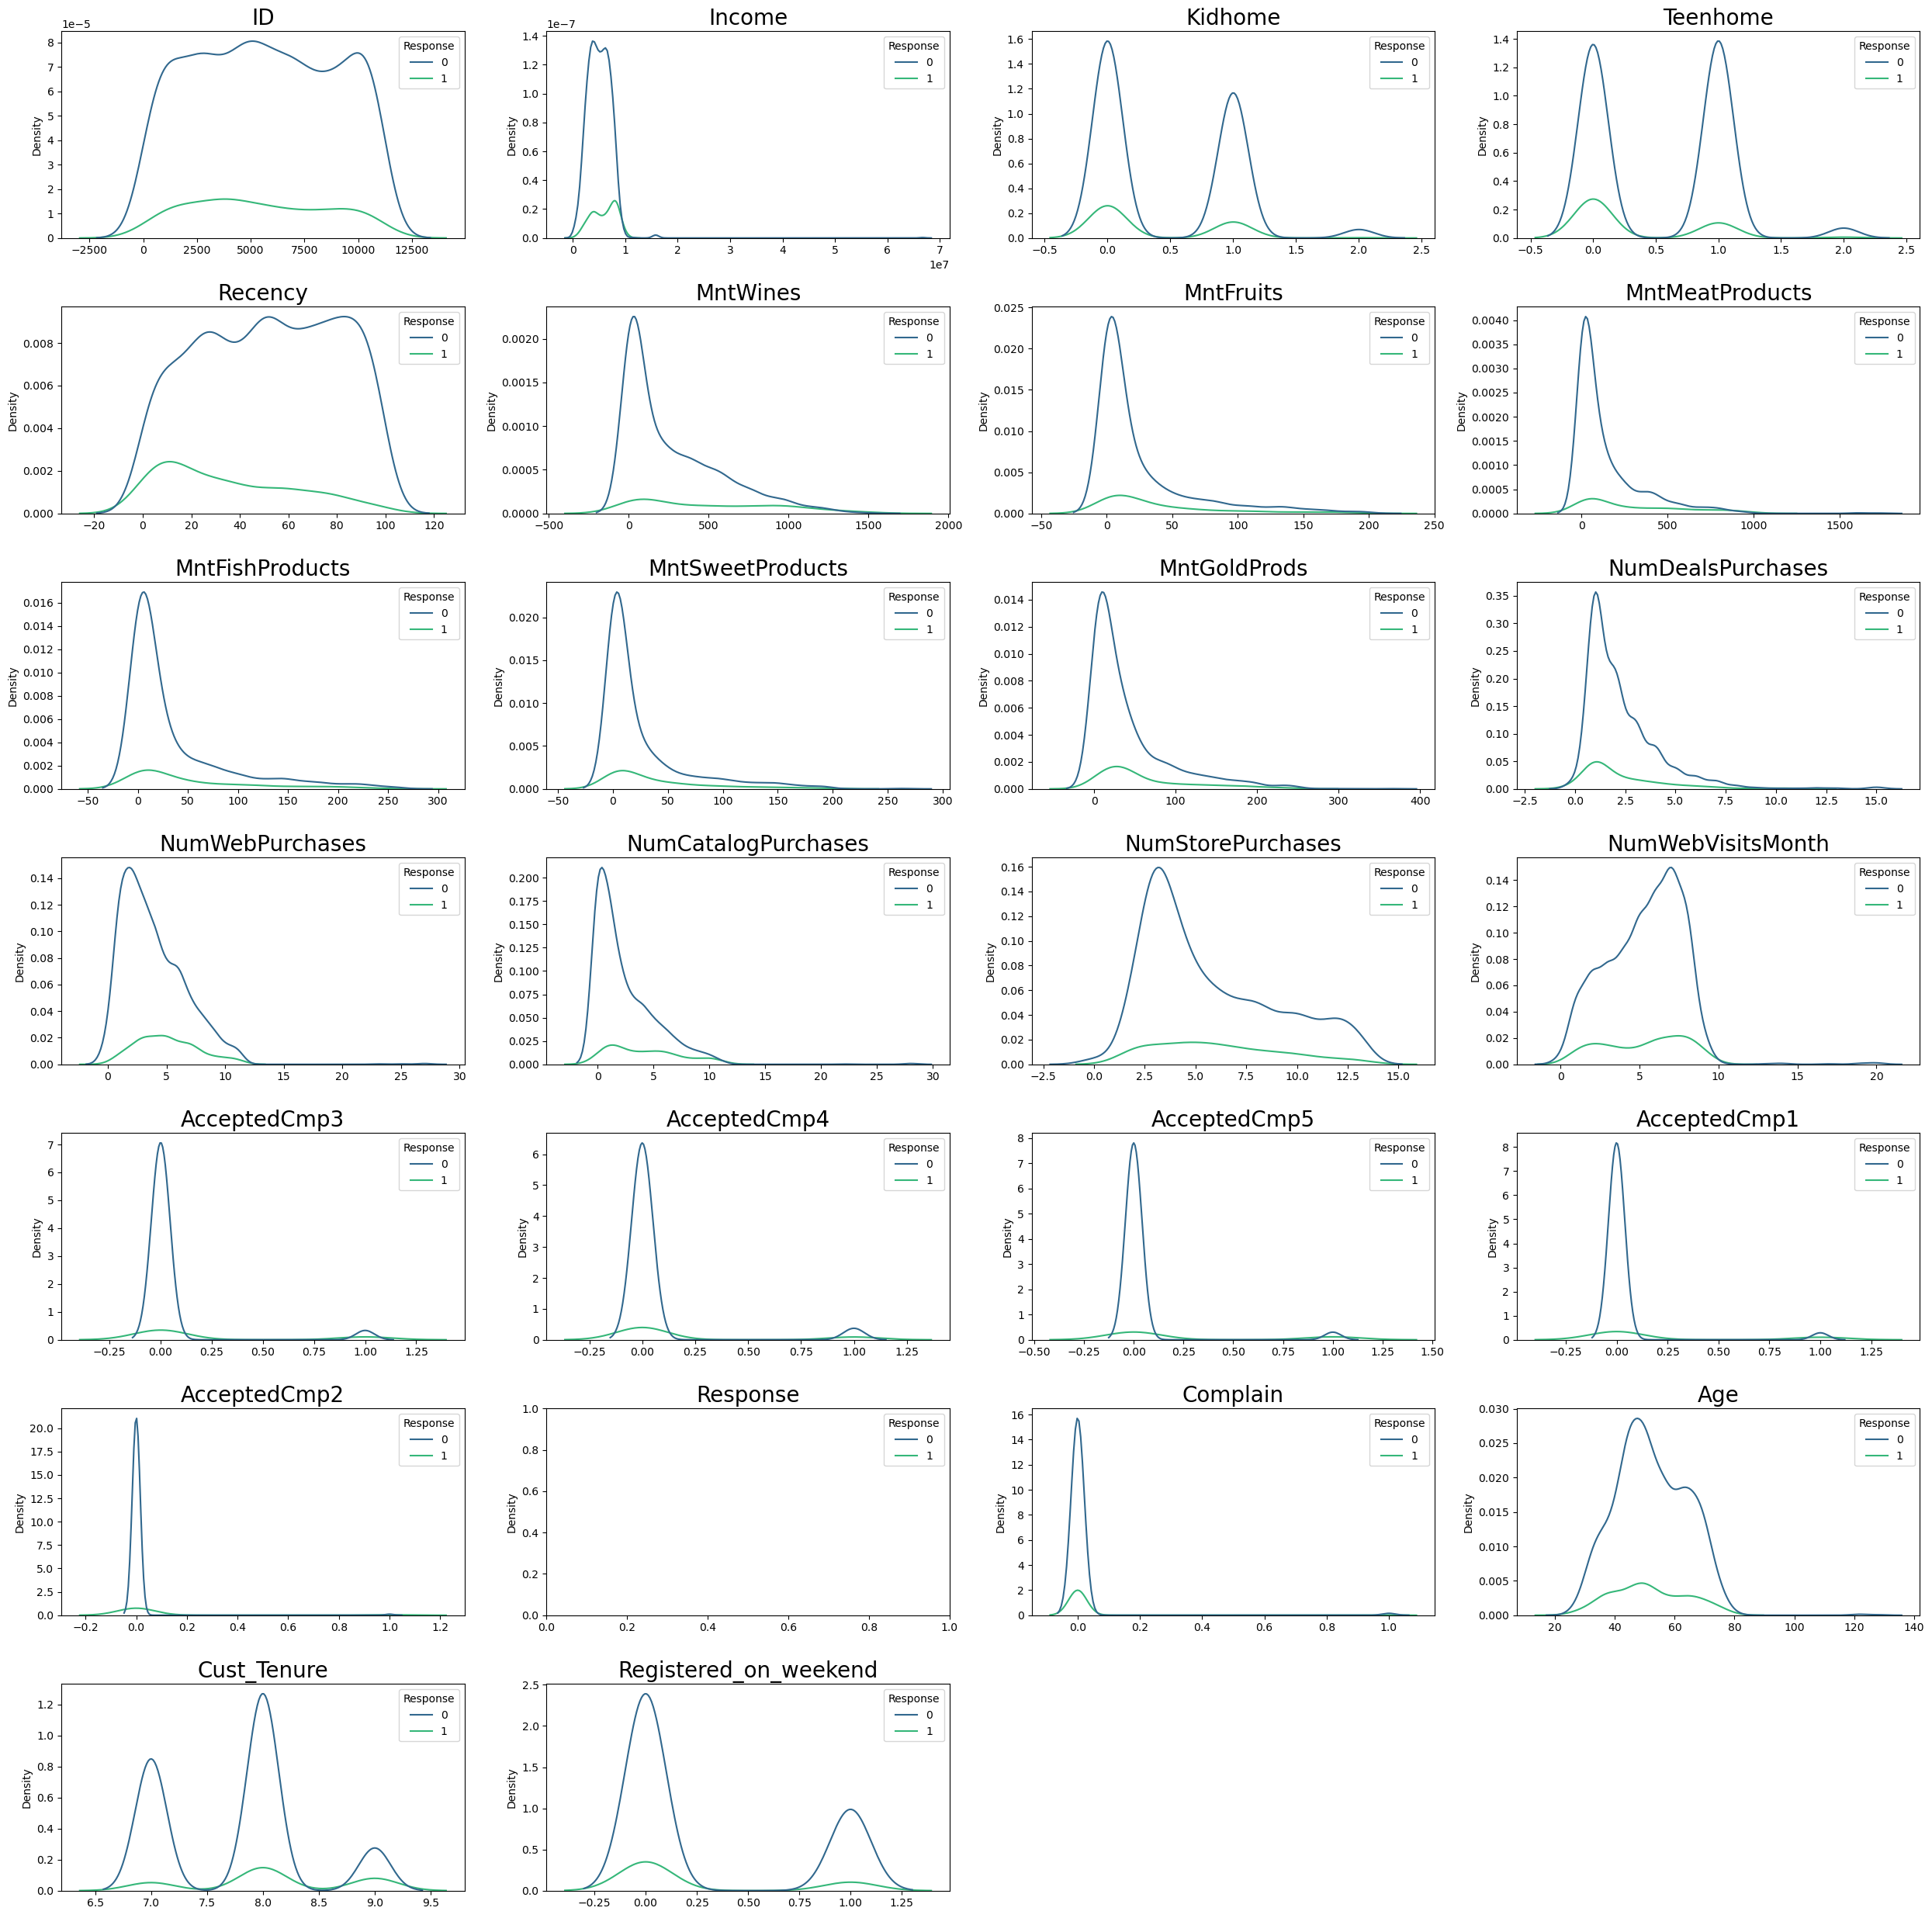

In [112]:
plt.figure(figsize=(25,25))
for i in range(0, len(num)):
    plt.subplot(7,4,i+1)
    sns.kdeplot(x=eda[num[i]], palette='viridis', hue=eda['Response'])
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

- There are no much different in distribution by adding hue on `Response` feature
- `Age` of customers between 20-80 years old

### Categorical Feature Analysis

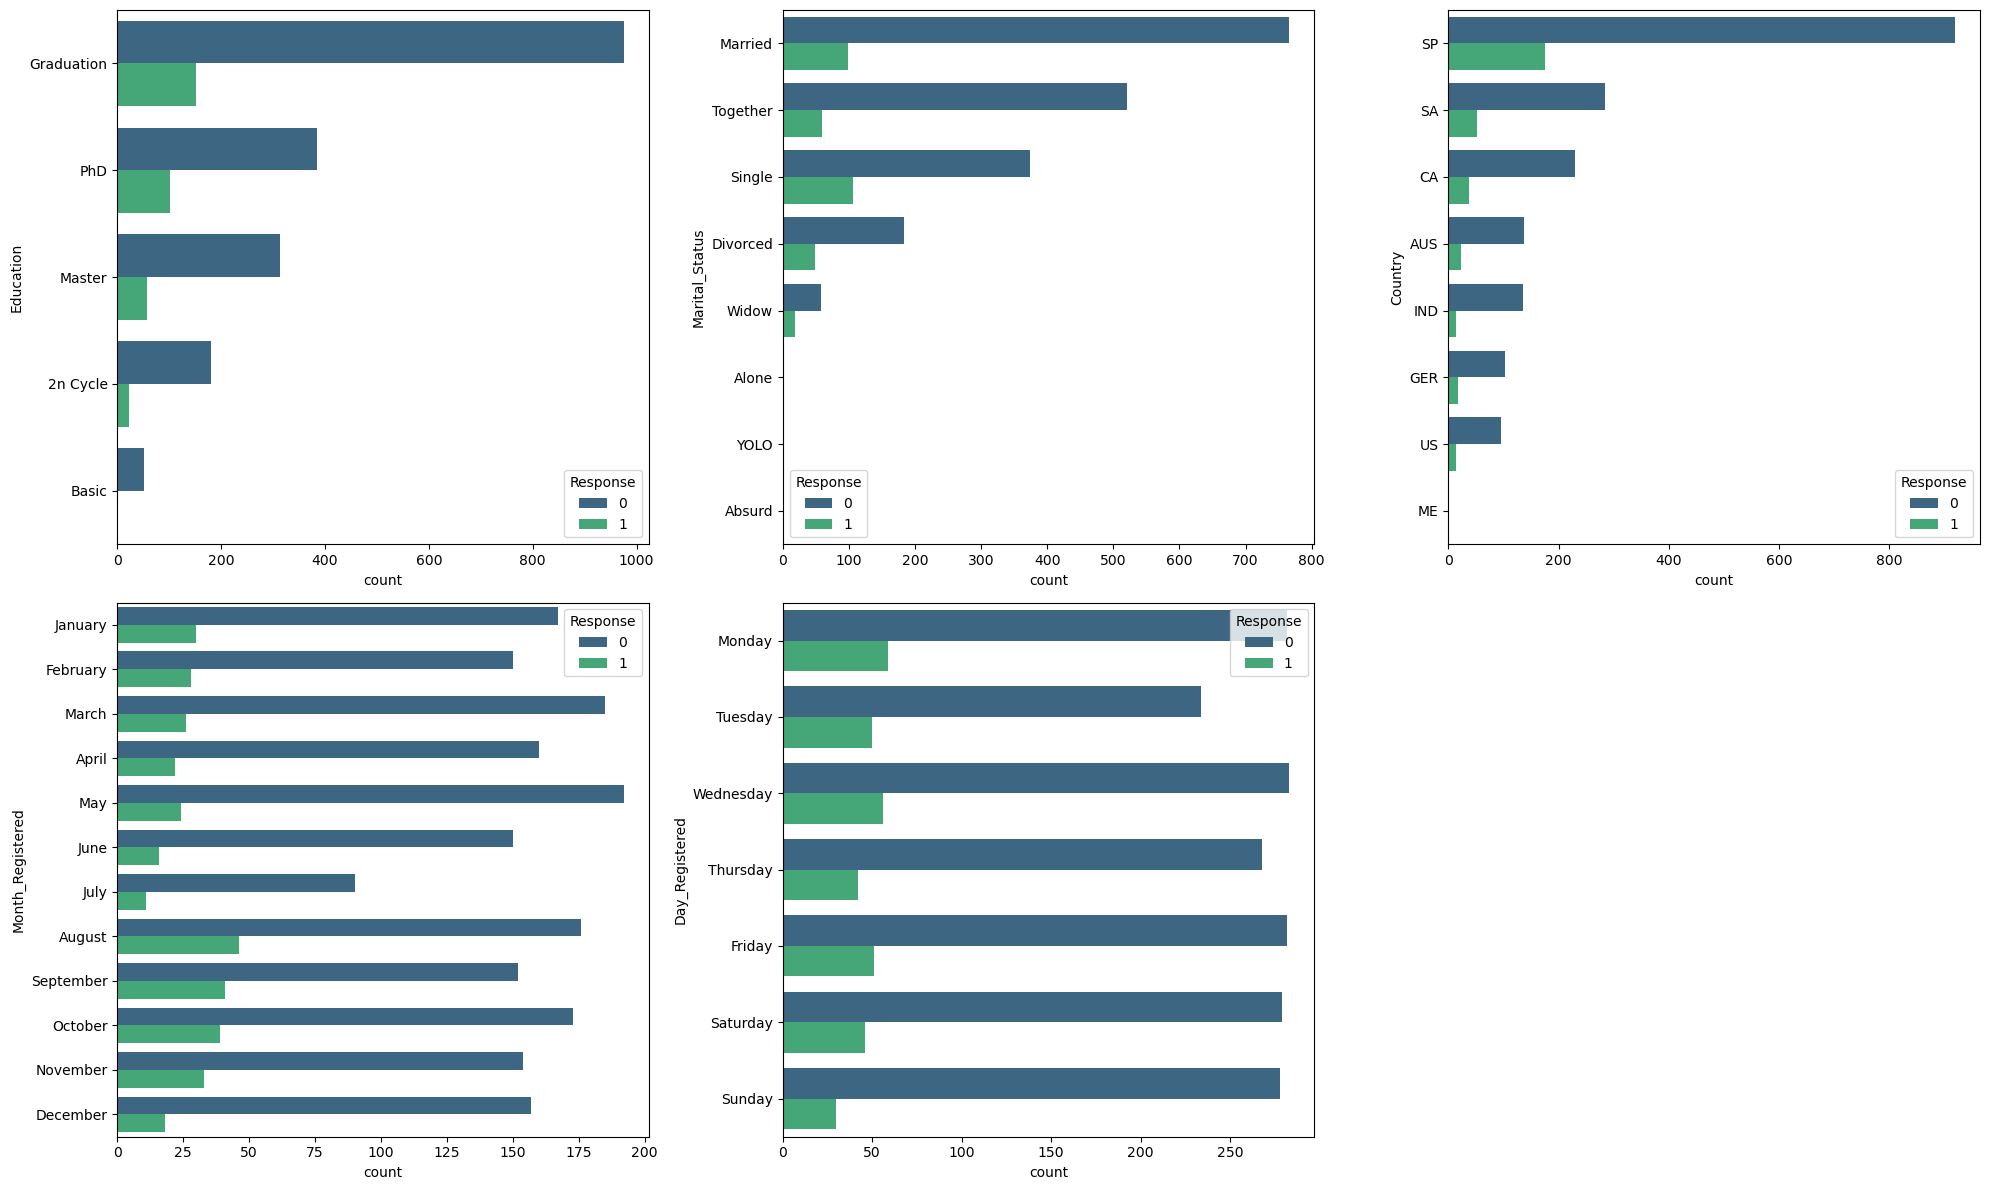

In [120]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
fig, axes = plt.subplots(2,3, figsize=(20,12))
xy = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2)]

for i in range(len(cat)):
    if i == 3:
        sns.countplot(y=eda[cat[i]], palette='viridis', ax=axes[xy[i]], order=month_order, hue=eda['Response'])
        plt.tight_layout()
    elif i == 4:
        sns.countplot(y=eda[cat[i]], palette='viridis', ax=axes[xy[i]], order=days_order, hue=eda['Response'])
        plt.tight_layout()
    else:
        sns.countplot(y=eda[cat[i]], palette='viridis', ax=axes[xy[i]], order=df[cat[i]].value_counts().index, hue=eda['Response'])
        plt.tight_layout() 
axes[1,2].axis('off')
plt.tight_layout()

### Correlation Heatmap

<AxesSubplot:>

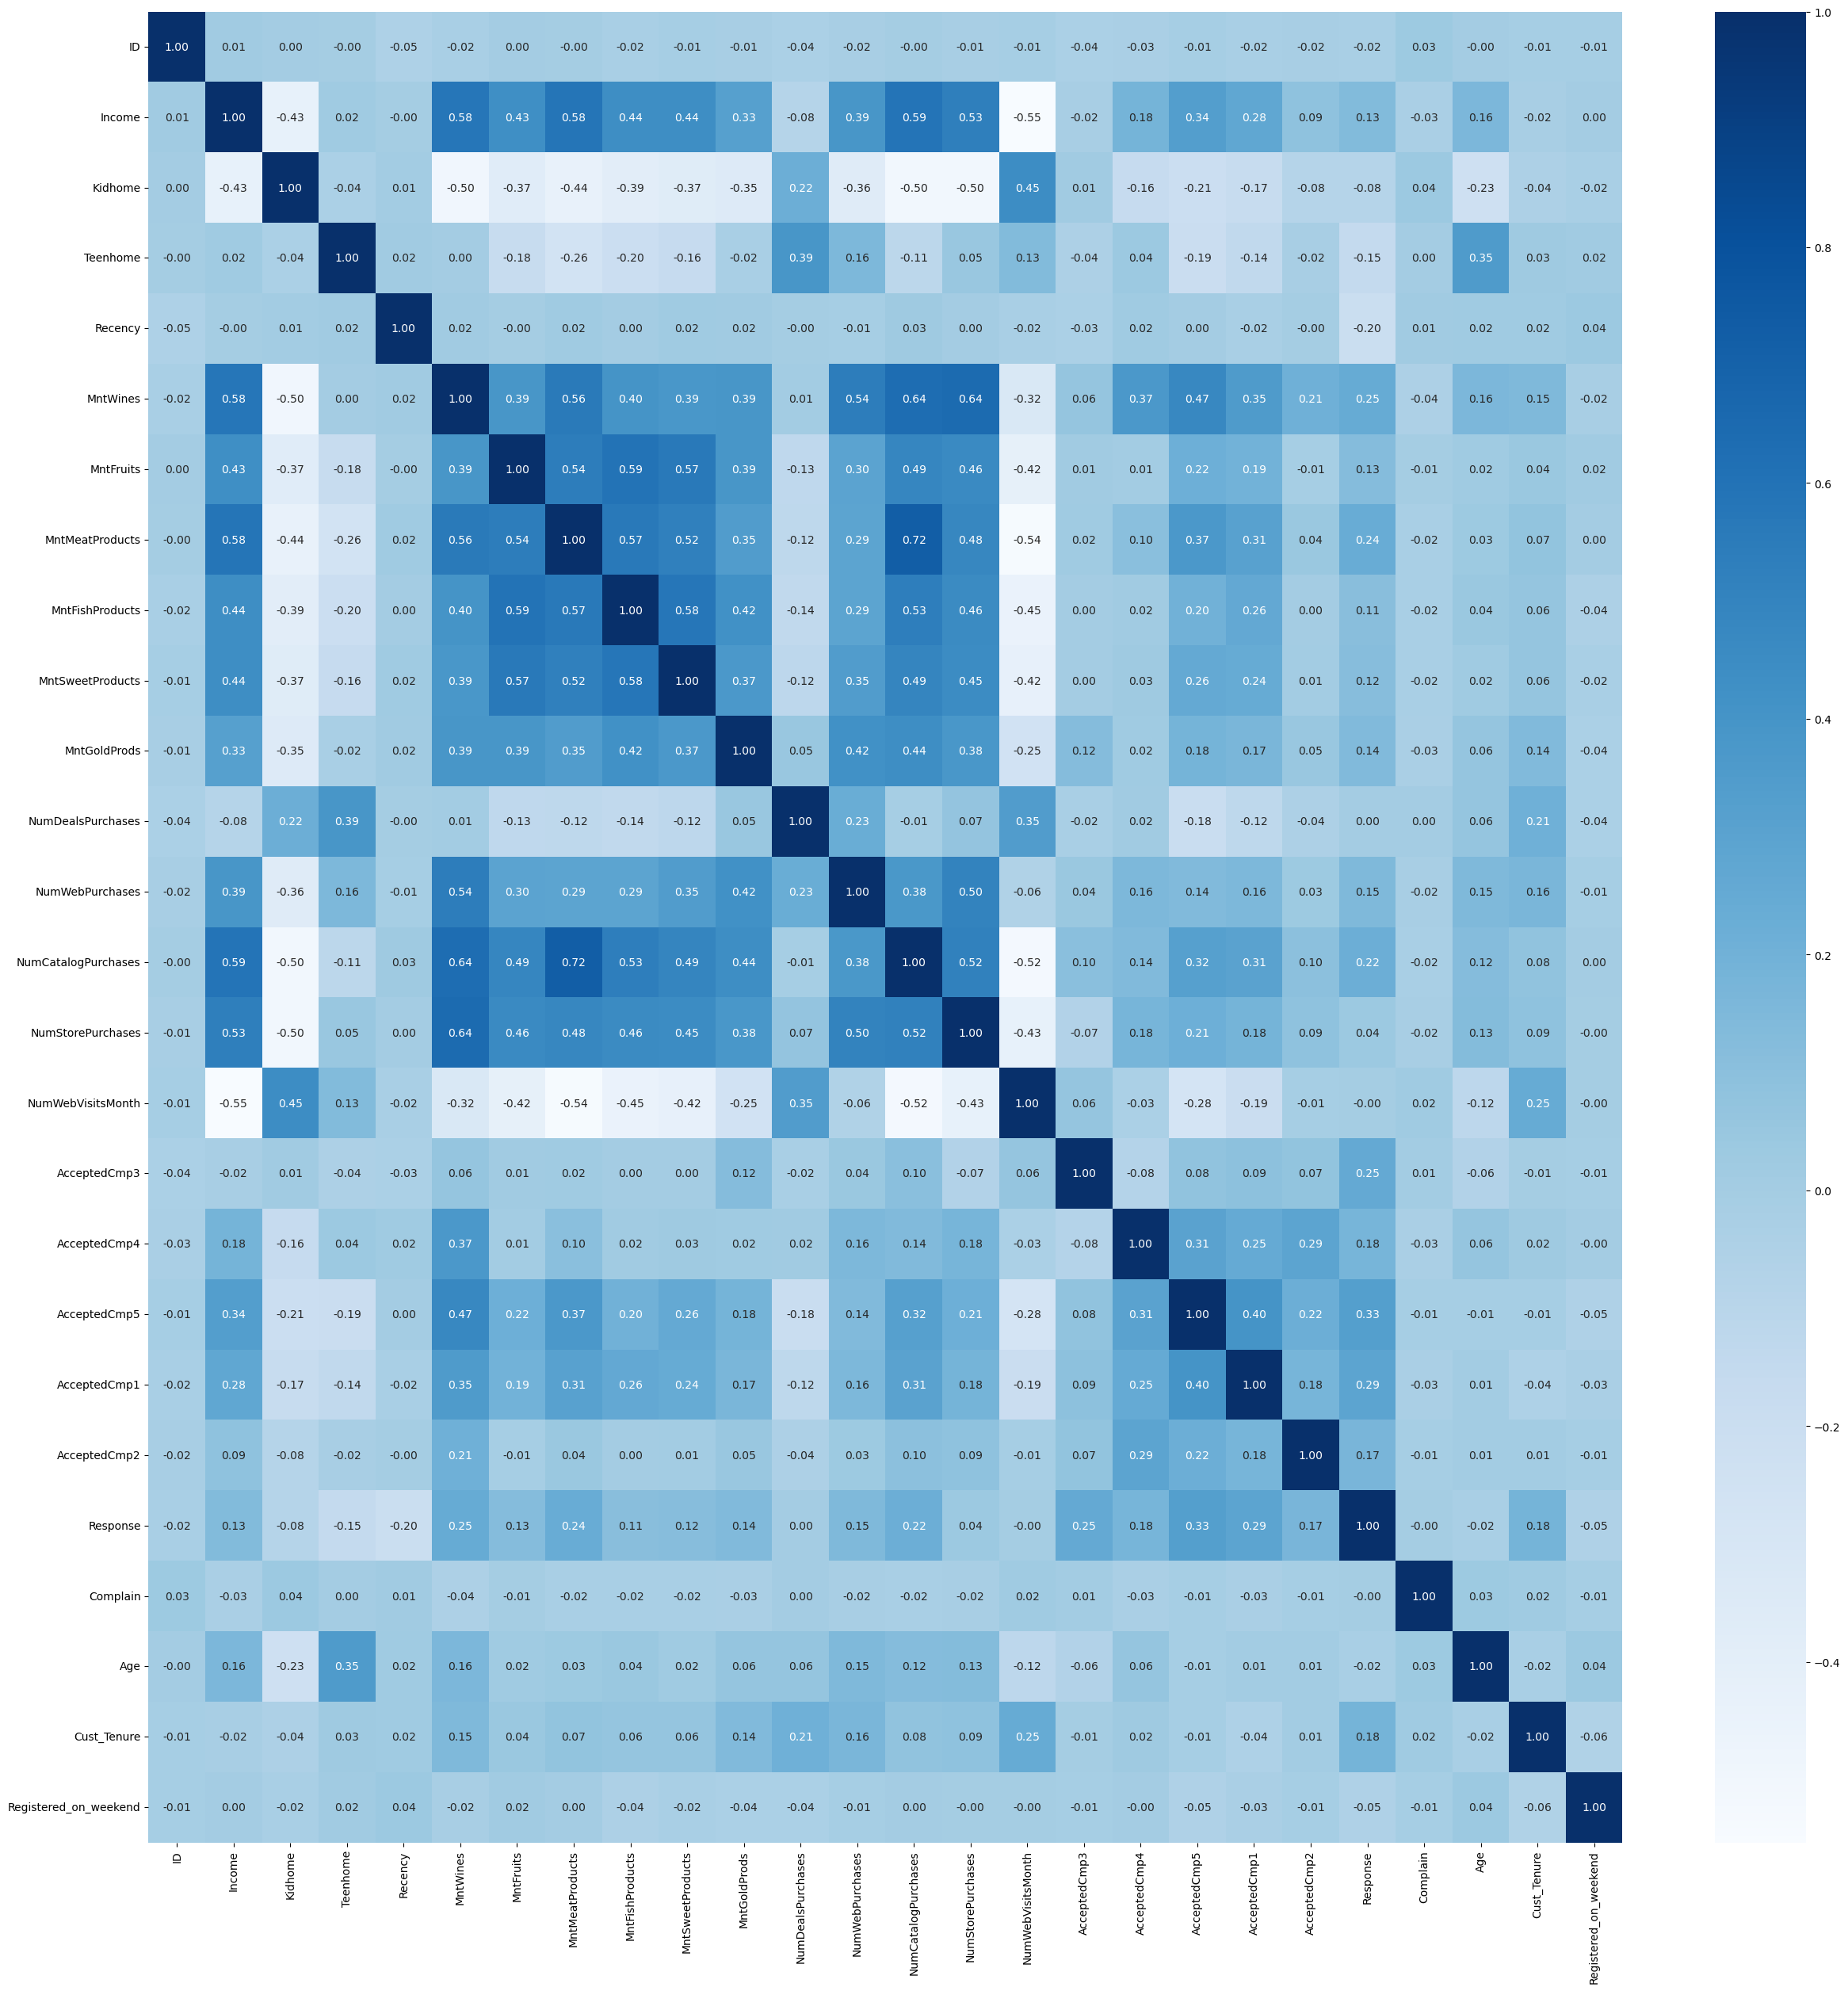

In [17]:
plt.figure(figsize=(30, 30))
sns.heatmap(eda[num].corr(), cmap='Blues', annot=True, fmt='.2f')

- `Complain`, `Age`, and `NumDealsPurchases` have very low correlation to target feature `Response`
- `AcceptedCmp1`, `AcceptedCmp5`, `AcceptedCmp3`, `NumCatalogPurchases`, `MntFruits`, and `MntWines` have slightly high correlation to target feature `Response`
- `Income` has slightly high correlation to amount products # check dictionary
- Product features have slightly high correlation to Places features

## Business Insights

# Data PreProcessing

this data doesn't have duplicated rows

## Feature Engineering

In [4]:
# renaming 'Income' column for remove spacing
df.rename(columns={' Income ':'Income'}, inplace=True)

In [5]:
# Remove dollar character in Income feature
df['Income'] = df['Income'].str.replace(r'\D', '').astype(float) #'\D' matches any character that is not a decimal digit.

In [6]:
# Marital Status
df.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [7]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [7]:
# we will convert marital status values into has_partner (1=yes (married and together), 0=no(single,alone,etc))
df['Marital_Status'] = np.where(df['Marital_Status'] == 'Married',1,
                       np.where(df['Marital_Status'] == 'Together',1,0))

# we will convert Education feature into ordinal values
df['Education'] = np.where(df['Education'] == 'Basic',0,
                  np.where(df['Education'] == 'Graduation',1,
                  np.where(df['Education'] == '2n Cycle',2,
                  np.where(df['Education'] == 'Master',3,4))))


## Feature Extraction

In [8]:
# import library datetime for feature extraction
import datetime
reference_date=datetime.datetime(2021,11,1)
print(reference_date)

2021-11-01 00:00:00


In [9]:
# Age = reference_date - year_birth, then drop 'Year_Birth' column
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format='%Y')
df['Age'] = (reference_date - df['Year_Birth']).astype('timedelta64[Y]')
df = df.drop(['Year_Birth'], axis=1)

In [10]:
reference_date=datetime.datetime(2021,11,1)

# Tenure is the term used to describe the length of time a customer remains a customer.
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Cust_Tenure'] = (reference_date - df['Dt_Customer']).astype('timedelta64[Y]')
df['Month_Registered'] = df['Dt_Customer'].dt.month_name()
df['Day_Registered'] = df['Dt_Customer'].dt.day_name()
df['Registered_on_weekend'] = np.where(df['Day_Registered'] == 'Sunday',1,
                              np.where(df['Day_Registered'] == 'Saturday',1,0))

# drop Dt_Customer column
df = df.drop(['Dt_Customer'],axis=1)

## Missing Values Handling

In [95]:
df.isnull().sum()

ID                        0
Education                 0
Marital_Status            0
Income                   24
Kidhome                   0
Teenhome                  0
Recency                   0
MntWines                  0
MntFruits                 0
MntMeatProducts           0
MntFishProducts           0
MntSweetProducts          0
MntGoldProds              0
NumDealsPurchases         0
NumWebPurchases           0
NumCatalogPurchases       0
NumStorePurchases         0
NumWebVisitsMonth         0
AcceptedCmp3              0
AcceptedCmp4              0
AcceptedCmp5              0
AcceptedCmp1              0
AcceptedCmp2              0
Response                  0
Complain                  0
Country                   0
Age                       0
Cust_Tenure               0
Month_Registered          0
Day_Registered            0
Registered_on_weekend     0
dtype: int64

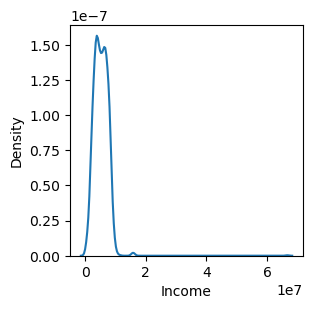

In [99]:
plt.figure(figsize=(3,3))
sns.kdeplot(df['Income'])
plt.show()

In [11]:
# fill missing values with median
df['Income'] = df['Income'].fillna(df['Income'].median())

## Outlier Handling

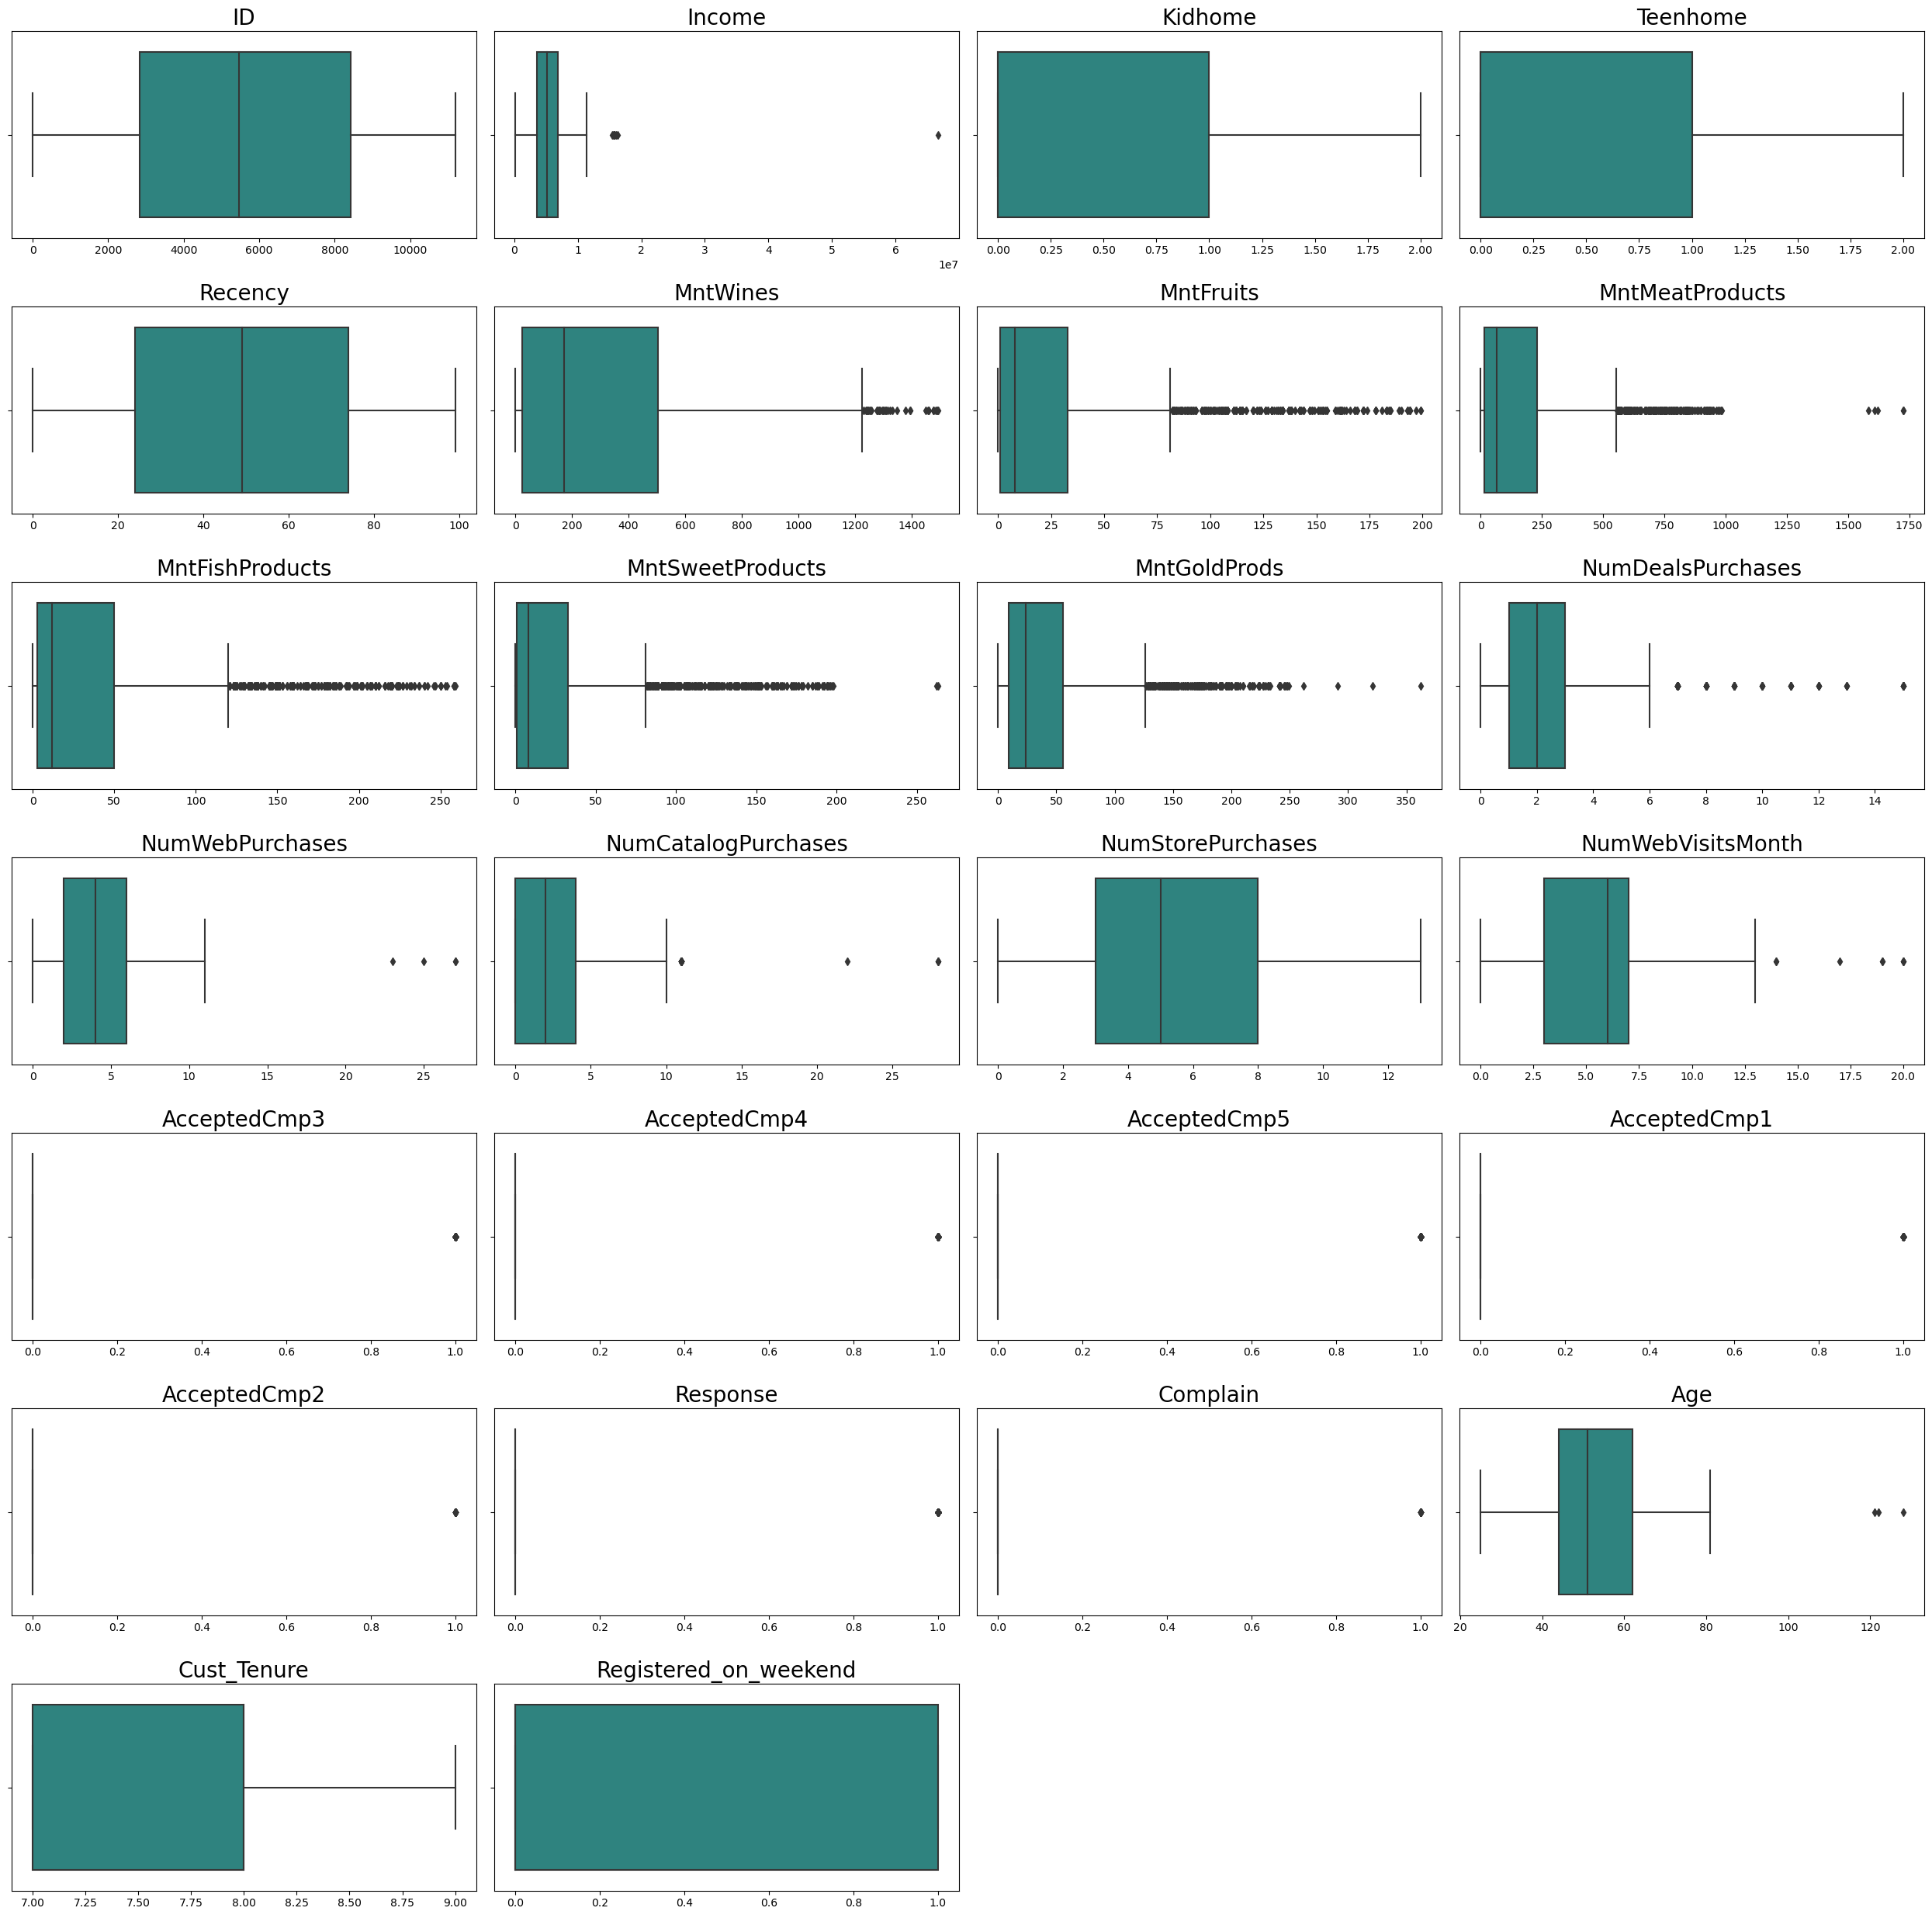

In [24]:
# devide group of featues by type of data
num = df.select_dtypes(exclude='object').columns

# plot boxplot before outlier handling
plt.figure(figsize=(25,25))
for i in range(0, len(num)):
    plt.subplot(7,4,i+1)
    sns.boxplot(x=df[num[i]], palette='viridis')
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

In [12]:
outlier_col = ['Income', 'MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds', 'Age']

from scipy import stats
import numpy as np

In [13]:
print(f'Number if rows before outlier handling: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in outlier_col:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Number if rows after outlier handling: {len(df)}')

Number if rows before outlier handling: 2240
Number if rows after outlier handling: 2011


## Feature Encoding

In [14]:
cat = df.select_dtypes(include='object').columns
cat

Index(['Country', 'Month_Registered', 'Day_Registered'], dtype='object')

In [15]:
dummies = pd.get_dummies(df[cat]) #one hot encoding
dummies.head()

Country_AUS  Country_CA  Country_GER  Country_IND  Country_ME  Country_SA  \
1            0           1            0            0           0           0   
2            0           0            0            0           0           0   
3            1           0            0            0           0           0   
4            0           0            0            0           0           0   
6            0           0            1            0           0           0   

   Country_SP  Country_US  Month_Registered_April  Month_Registered_August  \
1           0           0                       0                        0   
2           0           1                       0                        0   
3           0           0                       0                        0   
4           1           0                       1                        0   
6           0           0                       0                        0   

   Month_Registered_December  Month_Registered_February  \
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   
6                          0                          0   

   Month_Registered_January  Month_Registered_July  Month_Registered_June  \
1                         0                      0                      1   
2                         0                      0                      0   
3                         0                      0                      0   
4                         0                      0                      0   
6                         1                      0                      0   

   Month_Registered_March  Month_Registered_May  Month_Registered_November  \
1                       0                     0                          0   
2                       0                     1                          0   
3                       0                     1                          0   
4                       0                     0                          0   
6                       0                     0                          0   

   Month_Registered_October  Month_Registered_September  \
1                         0                           0   
2                         0                           0   
3                         0                           0   
4                         0                           0   
6                         0                           0   

   Day_Registered_Friday  Day_Registered_Monday  Day_Registered_Saturday  \
1                      0                      0                        0   
2                      0                      0                        0   
3                      0                      0                        0   
4                      0                      0                        0   
6                      0                      0                        0   

   Day_Registered_Sunday  Day_Registered_Thursday  Day_Registered_Tuesday  \
1                      1                        0                       0   
2                      0                        0                       1   
3                      1                        0                       0   
4                      0                        0                       1   
6                      0                        0                       0   

   Day_Registered_Wednesday  
1                         0  
2                         0  
3                         0  
4                         0  
6                         1

In [16]:
df = df.drop(cat, axis=1)
df = pd.concat([df,dummies],axis=1)
df.head()

ID  Education  Marital_Status     Income  Kidhome  Teenhome  Recency  \
1      1          1               0  5709100.0        0         0        0   
2  10476          1               1  6726700.0        0         1        0   
3   1386          1               1  3247400.0        1         1        0   
4   5371          1               0  2147400.0        1         0        0   
6   4073          2               1  6356400.0        0         0        0   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
1       464          5               64                7                 0   
2       134         11               59               15                 2   
3        10          0                1                0                 0   
4         6         16               24               11                 0   
6       769         80              252               15                34   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
1            37                  1                7                    3   
2            30                  1                3                    2   
3             0                  1                1                    0   
4            34                  2                3                    1   
6            65                  1               10                   10   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
1                  7                  5             0             0   
2                  5                  2             0             0   
3                  2                  7             0             0   
4                  2                  7             1             0   
6                  7                  6             1             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Complain   Age  \
1             0             0             1         1         0  60.0   
2             0             0             0         0         0  63.0   
3             0             0             0         0         0  54.0   
4             0             0             0         1         0  32.0   
6             0             0             0         1         0  67.0   

   Cust_Tenure  Registered_on_weekend  Country_AUS  Country_CA  Country_GER  \
1          7.0                      1            0           1            0   
2          7.0                      0            0           0            0   
3          7.0                      1            1           0            0   
4          7.0                      0            0           0            0   
6          7.0                      0            0           0            1   

   Country_IND  Country_ME  Country_SA  Country_SP  Country_US  \
1            0           0           0           0           0   
2            0           0           0           0           1   
3            0           0           0           0           0   
4            0           0           0           1           0   
6            0           0           0           0           0   

   Month_Registered_April  Month_Registered_August  Month_Registered_December  \
1                       0                        0                          0   
2                       0                        0                          0   
3                       0                        0                          0   
4                       1                        0                          0   
6                       0                        0                          0   

   Month_Registered_February  Month_Registered_January  Month_Registered_July  \
1                          0                         0                      0   
2                          0                         0                      0   
3                          0                         0                      0   
4                          0                         0        

In [151]:
df.shape

(2011, 55)

## Feature Transformation

In [17]:
X = df.drop(['ID','Response'],axis=1)
y = df['Response']

In [165]:
X.head()

Education  Marital_Status     Income  Kidhome  Teenhome  Recency  MntWines  \
1          1               0  5709100.0        0         0        0       464   
2          1               1  6726700.0        0         1        0       134   
3          1               1  3247400.0        1         1        0        10   
4          1               0  2147400.0        1         0        0         6   
6          2               1  6356400.0        0         0        0       769   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
1          5               64                7                 0   
2         11               59               15                 2   
3          0                1                0                 0   
4         16               24               11                 0   
6         80              252               15                34   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
1            37                  1                7                    3   
2            30                  1                3                    2   
3             0                  1                1                    0   
4            34                  2                3                    1   
6            65                  1               10                   10   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
1                  7                  5             0             0   
2                  5                  2             0             0   
3                  2                  7             0             0   
4                  2                  7             1             0   
6                  7                  6             1             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain   Age  Cust_Tenure  \
1             0             0             1         0  60.0          7.0   
2             0             0             0         0  63.0          7.0   
3             0             0             0         0  54.0          7.0   
4             0             0             0         0  32.0          7.0   
6             0             0             0         0  67.0          7.0   

   Registered_on_weekend  Country_AUS  Country_CA  Country_GER  Country_IND  \
1                      1            0           1            0            0   
2                      0            0           0            0            0   
3                      1            1           0            0            0   
4                      0            0           0            0            0   
6                      0            0           0            1            0   

   Country_ME  Country_SA  Country_SP  Country_US  Month_Registered_April  \
1           0           0           0           0                       0   
2           0           0           0           1                       0   
3           0           0           0           0                       0   
4           0           0           1           0                       1   
6           0           0           0           0                       0   

   Month_Registered_August  Month_Registered_December  \
1                        0                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   
6                        0                          0   

   Month_Registered_February  Month_Registered_January  Month_Registered_July  \
1                          0                         0                      0   
2                          0                         0                      0   
3                          0                         0                      0   
4                          0                         0                      0   
6                          0                         1                      0   

In [18]:
# we will re arange column sort, category features will be placed in right side dataframe
# the purpose is to make easier perform SMOTE NC (nominal and continous)
a = pd.DataFrame(X.nunique())
a.columns = ['n_unique']
ab = a[a['n_unique'] == 2]
ab.index

Index(['Marital_Status', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Registered_on_weekend',
       'Country_AUS', 'Country_CA', 'Country_GER', 'Country_IND', 'Country_ME',
       'Country_SA', 'Country_SP', 'Country_US', 'Month_Registered_April',
       'Month_Registered_August', 'Month_Registered_December',
       'Month_Registered_February', 'Month_Registered_January',
       'Month_Registered_July', 'Month_Registered_June',
       'Month_Registered_March', 'Month_Registered_May',
       'Month_Registered_November', 'Month_Registered_October',
       'Month_Registered_September', 'Day_Registered_Friday',
       'Day_Registered_Monday', 'Day_Registered_Saturday',
       'Day_Registered_Sunday', 'Day_Registered_Thursday',
       'Day_Registered_Tuesday', 'Day_Registered_Wednesday'],
      dtype='object')

In [19]:
abcd = ['Marital_Status', 'Education','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Registered_on_weekend',
       'Country_AUS', 'Country_CA', 'Country_GER', 'Country_IND', 'Country_ME',
       'Country_SA', 'Country_SP', 'Country_US', 'Month_Registered_April',
       'Month_Registered_August', 'Month_Registered_December',
       'Month_Registered_February', 'Month_Registered_January',
       'Month_Registered_July', 'Month_Registered_June',
       'Month_Registered_March', 'Month_Registered_May',
       'Month_Registered_November', 'Month_Registered_October',
       'Month_Registered_September', 'Day_Registered_Friday',
       'Day_Registered_Monday', 'Day_Registered_Saturday',
       'Day_Registered_Sunday', 'Day_Registered_Thursday',
       'Day_Registered_Tuesday', 'Day_Registered_Wednesday']

In [20]:
# we will drop 'ab' + 'Education' feature
# and we will concat again with X
c = X.drop(abcd, axis=1)
X = pd.concat([c,X[abcd]],axis=1)
X.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
1  5709100.0        0         0        0       464          5   
2  6726700.0        0         1        0       134         11   
3  3247400.0        1         1        0        10          0   
4  2147400.0        1         0        0         6         16   
6  6356400.0        0         0        0       769         80   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
1               64                7                 0            37   
2               59               15                 2            30   
3                1                0                 0             0   
4               24               11                 0            34   
6              252               15                34            65   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1                  1                7                    3                  7   
2                  1                3                    2                  5   
3                  1                1                    0                  2   
4                  2                3                    1                  2   
6                  1               10                   10                  7   

   NumWebVisitsMonth   Age  Cust_Tenure  Marital_Status  Education  \
1                  5  60.0          7.0               0          1   
2                  2  63.0          7.0               1          1   
3                  7  54.0          7.0               1          1   
4                  7  32.0          7.0               0          1   
6                  6  67.0          7.0               1          2   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
1             0             0             0             0             1   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             1             0             0             0             0   
6             1             0             0             0             0   

   Complain  Registered_on_weekend  Country_AUS  Country_CA  Country_GER  \
1         0                      1            0           1            0   
2         0                      0            0           0            0   
3         0                      1            1           0            0   
4         0                      0            0           0            0   
6         0                      0            0           0            1   

   Country_IND  Country_ME  Country_SA  Country_SP  Country_US  \
1            0           0           0           0           0   
2            0           0           0           0           1   
3            0           0           0           0           0   
4            0           0           0           1           0   
6            0           0           0           0           0   

   Month_Registered_April  Month_Registered_August  Month_Registered_December  \
1                       0                        0                          0   
2                       0                        0                          0   
3                       0                        0                          0   
4                       1                        0                          0   
6                       0                        0                          0   

   Month_Registered_February  Month_Registered_January  Month_Registered_July  \
1                          0                         0                      0   
2                          0                         0                      0   
3                          0                         0                      0   
4                          0                         0                      0   
6                          0                         1                      0   

 

In [21]:
print(X.shape)
print(y.shape)

(2011, 53)
(2011,)


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)

X_train.shape, X_test.shape

((1608, 53), (403, 53))

In [23]:
# set up the scaler
scaler = RobustScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# let's transform the returned NumPy arrays to dataframes

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [180]:
X_train_scaled.describe().T

count      mean       std       min       25%  \
Income                      1407.0  0.019719  0.642241 -1.545096 -0.472420   
Kidhome                     1407.0  0.484009  0.546156  0.000000  0.000000   
Teenhome                    1407.0 -0.463397  0.542546 -1.000000 -1.000000   
Recency                     1407.0 -0.010577  0.569198 -0.980392 -0.509804   
MntWines                    1407.0  0.287636  0.739479 -0.356481 -0.305556   
MntFruits                   1407.0  0.599637  1.310916 -0.266667 -0.222222   
MntMeatProducts             1407.0  0.489361  1.094970 -0.323171 -0.237805   
MntFishProducts             1407.0  0.549921  1.232653 -0.289855 -0.231884   
MntSweetProducts            1407.0  0.546013  1.241928 -0.280000 -0.240000   
MntGoldProds                1407.0  0.416365  1.075447 -0.525000 -0.325000   
NumDealsPurchases           1407.0  0.217484  0.953749 -1.000000 -0.500000   
NumWebPurchases             1407.0  0.244314  0.662219 -0.750000 -0.250000   
NumCatalogPurchases         1407.0  0.328536  0.642177 -0.250000 -0.250000   
NumStorePurchases           1407.0  0.321535  0.635002 -0.800000 -0.200000   
NumWebVisitsMonth           1407.0 -0.149491  0.784915 -2.000000 -0.666667   
Age                         1407.0  0.068072  0.648066 -1.444444 -0.388889   
Cust_Tenure                 1407.0 -0.196873  0.661084 -1.000000 -1.000000   
Marital_Status              1407.0 -0.348969  0.476814 -1.000000 -1.000000   
Education                   1407.0  0.550462  0.649388 -0.500000  0.000000   
AcceptedCmp3                1407.0  0.070362  0.255848  0.000000  0.000000   
AcceptedCmp4                1407.0  0.073205  0.260566  0.000000  0.000000   
AcceptedCmp5                1407.0  0.056859  0.231655  0.000000  0.000000   
AcceptedCmp1                1407.0  0.046908  0.211518  0.000000  0.000000   
AcceptedCmp2                1407.0  0.010661  0.102737  0.000000  0.000000   
Complain                    1407.0  0.007107  0.084035  0.000000  0.000000   
Registered_on_weekend       1407.0  0.275764  0.447057  0.000000  0.000000   
Country_AUS                 1407.0  0.071073  0.257038  0.000000  0.000000   
Country_CA                  1407.0  0.117982  0.322701  0.000000  0.000000   
Country_GER                 1407.0  0.054726  0.227526  0.000000  0.000000   
Country_IND                 1407.0  0.061123  0.239641  0.000000  0.000000   
Country_ME                  1407.0  0.000711  0.026660  0.000000  0.000000   
Country_SA                  1407.0  0.149964  0.357164  0.000000  0.000000   
Country_SP                  1407.0  0.490405  0.500086  0.000000  0.000000   
Country_US                  1407.0  0.054016  0.226129  0.000000  0.000000   
Month_Registered_April      1407.0  0.073205  0.260566  0.000000  0.000000   
Month_Registered_August     1407.0  0.094527  0.292665  0.000000  0.000000   
Month_Registered_December   1407.0  0.074627  0.262882  0.000000  0.000000   
Month_Registered_February   1407.0  0.081023  0.272968  0.000000  0.000000   
Month_Registered_January    1407.0  0.083866  0.277286  0.000000  0.000000   
Month_Registered_July       1407.0  0.046198  0.209987  0.000000  0.000000   
Month_Registered_June       1407.0  0.080313  0.271873  0.000000  0.000000   
Month_Registered_March      1407.0  0.088842  0.284616  0.000000  0.000000   
Month_Registered_May        1407.0  0.108031  0.310530  0.000000  0.000000   
Month_Registered_November   1407.0  0.089552  0.285641  0.000000  0.000000   
Month_Registered_October    1407.0  0.098081  0.297530  0.000000  0.000000   
Month_Registered_September  1407.0  0.081734  0.274057  0.000000  0.000000   
Day_Registered_Friday       1407.0  0.142857  0.350052  0.000000  0.000000   
Day_Registered_Monday       1407.0  0.163468  0.369924  0.000000  0.000000   
Day_Registered_Saturday     1407.0  0.137171  0.344150  0.000000  0.000000   
Day_Registered_Sunday       1407.0  0.138593  0.345644  0.000000  0.000000   
Day_Registered_Thursday     1407.0  0.142857  0.350

## Handling Imbalanced Data

In [28]:
X.iloc[:,17:53].head(2)

Marital_Status  Education  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
1               0          1             0             0             0   
2               1          1             0             0             0   

   AcceptedCmp1  AcceptedCmp2  Complain  Registered_on_weekend  Country_AUS  \
1             0             1         0                      1            0   
2             0             0         0                      0            0   

   Country_CA  Country_GER  Country_IND  Country_ME  Country_SA  Country_SP  \
1           1            0            0           0           0           0   
2           0            0            0           0           0           0   

   Country_US  Month_Registered_April  Month_Registered_August  \
1           0                       0                        0   
2           1                       0                        0   

   Month_Registered_December  Month_Registered_February  \
1                          0                          0   
2                          0                          0   

   Month_Registered_January  Month_Registered_July  Month_Registered_June  \
1                         0                      0                      1   
2                         0                      0                      0   

   Month_Registered_March  Month_Registered_May  Month_Registered_November  \
1                       0                     0                          0   
2                       0                     1                          0   

   Month_Registered_October  Month_Registered_September  \
1                         0                           0   
2                         0                           0   

   Day_Registered_Friday  Day_Registered_Monday  Day_Registered_Saturday  \
1                      0                      0                        0   
2                      0                      0                        0   

   Day_Registered_Sunday  Day_Registered_Thursday  Day_Registered_Tuesday  \
1                      1                        0                       0   
2                      0                        0                       1   

   Day_Registered_Wednesday  
1                         0  
2                         0

In [29]:
y.value_counts()

0    1739
1     272
Name: Response, dtype: int64

In [44]:
272/(272+1739)*100

13.525609149676779

In [45]:
100-13.52

86.48

### SMOTE-NC (60% resample)

In [23]:
#Import the SMOTE-NC
from imblearn.over_sampling import SMOTENC #(Nominal and Continuous)

#Obatin column index for categorical features
cat_col_index = list(range(17,53))

# SMOTE-NC
# For SMOTE-NC we need to pinpoint the column position where is the categorical features are.
smotenc = SMOTENC(categorical_features=cat_col_index, random_state = 101, sampling_strategy=0.6)
X_smotenc, y_smotenc = smotenc.fit_resample(X_train_scaled, y_train)

In [25]:
y_train.value_counts()

0    1379
1     229
Name: Response, dtype: int64

In [25]:
y_smotenc.value_counts()

0    1379
1     827
Name: Response, dtype: int64

In [45]:
print(X_smotenc.shape)
print(y_smotenc.shape)
print(X_test_scaled.shape)
print(y_test.shape)

(2206, 18)
(2206,)
(403, 18)
(403,)


### SMOTEENN

In [24]:
from imblearn.combine import SMOTEENN

# defining the Model
sn = SMOTEENN(random_state = 0)

# Training the Model
sn.fit(X, y)

# Making the Samples
X_smoteenn, y_smoteenn = sn.fit_resample(X_train_scaled, y_train)

In [32]:
y_train.value_counts()

0    1379
1     229
Name: Response, dtype: int64

In [31]:
y_smoteenn.value_counts()

1    1364
0     803
Name: Response, dtype: int64

In [46]:
print(X_smoteenn.shape)
print(y_smoteenn.shape)
print(X_test_scaled.shape)
print(y_test.shape)

(2167, 53)
(2167,)
(403, 18)
(403,)


## Feature Selection

### Quasi Constant

In [225]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(
    threshold=0.01)  # 0.1 indicates 99% of observations approximately

sel.fit(X_smotenc)  # fit finds the features with low variance

sum(sel.get_support()) # how many not quasi-constant?

50

In [226]:
features_to_keep = X_smotenc.columns[sel.get_support()]

In [227]:
# # let's print the feature that will be removed by Quaasi Constant

quasi_constant = X_smotenc.columns[~sel.get_support()]
quasi_constant

Index(['AcceptedCmp2', 'Complain', 'Country_ME'], dtype='object')

### Chi Square

In [207]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# we use default train data (without scaled and imbalace handled)
selector = SelectKBest(chi2,k=20)
fit = selector.fit(X_train, y_train)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

In [208]:
#concat two dataframes 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
features_keep_chi = featureScores.nlargest(20,'Score')
features_keep_chi

Features         Score
0                       Income  2.098925e+07
4                     MntWines  2.384736e+04
6              MntMeatProducts  1.574047e+04
9                 MntGoldProds  1.756012e+03
8             MntSweetProducts  1.054575e+03
3                      Recency  9.213065e+02
7              MntFishProducts  8.193117e+02
5                    MntFruits  5.100526e+02
12         NumCatalogPurchases  2.153534e+02
21                AcceptedCmp5  1.066624e+02
19                AcceptedCmp3  9.300651e+01
22                AcceptedCmp1  9.265731e+01
11             NumWebPurchases  5.538610e+01
20                AcceptedCmp4  4.969754e+01
23                AcceptedCmp2  3.315457e+01
2                     Teenhome  1.463139e+01
18                   Education  1.036781e+01
17              Marital_Status  9.722510e+00
30                  Country_ME  5.931034e+00
45  Month_Registered_September  4.979080e+00

In [209]:
chi_list = features_keep_chi['Features'].unique()
chi_list

array(['Income', 'MntWines', 'MntMeatProducts', 'MntGoldProds',
       'MntSweetProducts', 'Recency', 'MntFishProducts', 'MntFruits',
       'NumCatalogPurchases', 'AcceptedCmp5', 'AcceptedCmp3',
       'AcceptedCmp1', 'NumWebPurchases', 'AcceptedCmp4', 'AcceptedCmp2',
       'Teenhome', 'Education', 'Marital_Status', 'Country_ME',
       'Month_Registered_September'], dtype=object)

In [210]:
len(chi_list)

20

In [213]:
dropped_by_chi = featureScores.nsmallest(33,'Score')
list_dropped_chi = dropped_by_chi['Features'].unique()
list_dropped_chi

array(['Country_US', 'Month_Registered_February', 'Country_AUS',
       'Month_Registered_March', 'Age', 'Country_GER',
       'Day_Registered_Friday', 'Country_CA', 'Country_SP', 'Complain',
       'Month_Registered_April', 'Month_Registered_November',
       'Country_IND', 'NumWebVisitsMonth', 'Month_Registered_January',
       'Month_Registered_July', 'Country_SA', 'Day_Registered_Monday',
       'Day_Registered_Wednesday', 'Day_Registered_Saturday',
       'Month_Registered_May', 'Month_Registered_June',
       'Month_Registered_August', 'Day_Registered_Sunday', 'Kidhome',
       'Month_Registered_December', 'Registered_on_weekend',
       'Cust_Tenure', 'Day_Registered_Thursday',
       'Month_Registered_October', 'Day_Registered_Tuesday',
       'NumDealsPurchases', 'NumStorePurchases'], dtype=object)

In [214]:
len(list_dropped_chi)

33

### Univariate feature selection

In [215]:
# Import libraries
from sklearn.feature_selection import f_classif, f_regression

# calculate the univariate statistical measure between
# each of the variables and the target

# similarly to chi2, the output is one array with f-scores
# and one array with the pvalues

univariate = f_classif(X_train, y_train)

<AxesSubplot:>

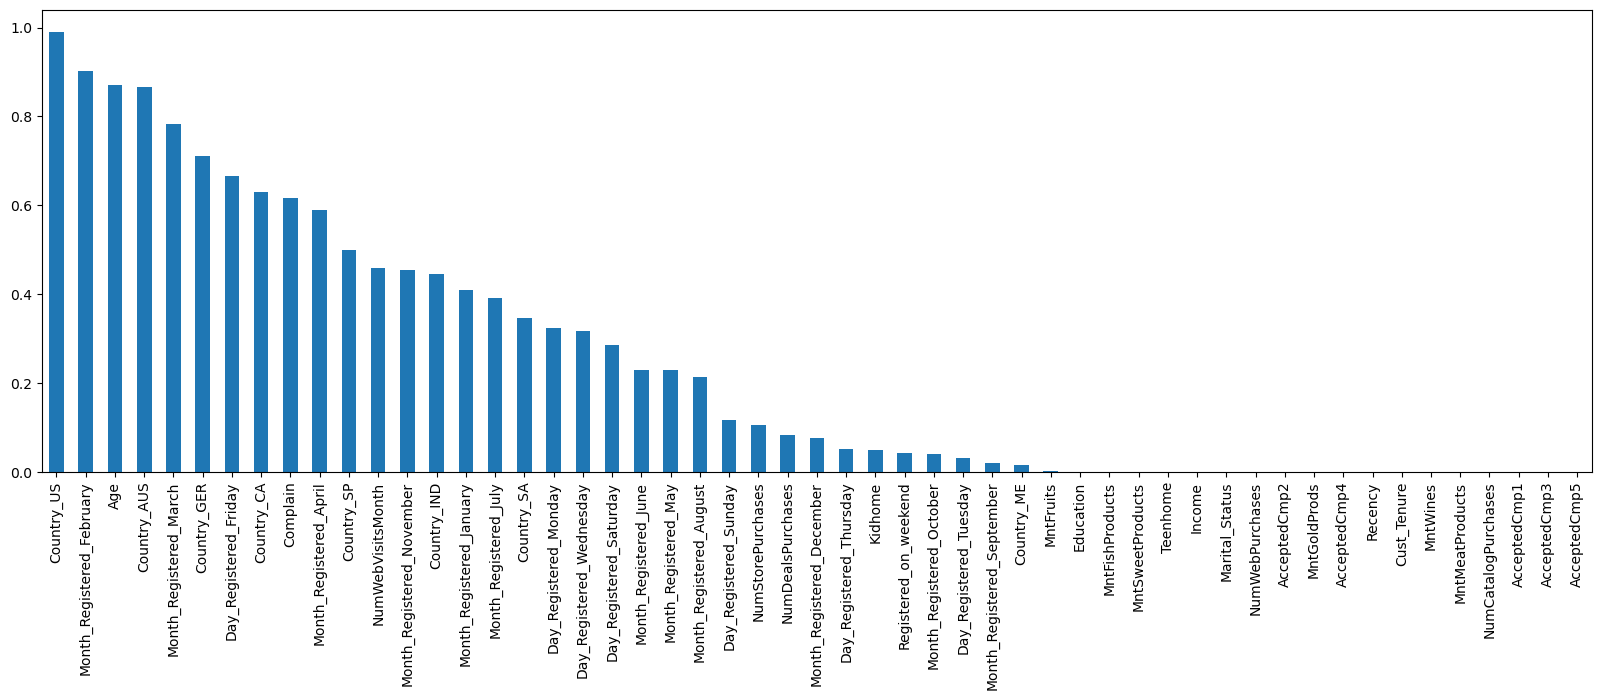

In [216]:
# 1) let's capture the pvalues in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on their anova pvalues
# 4) and make a var plot

univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False).plot.bar(figsize=(20, 6))

- The smaller the p_value the more predictive the feature is.
- Features on the left of the plot are very bad at predicting the target. The most predictive features are on the right of the plot.

In [ ]:
univariate_drop = univariate.sort_values(ascending=False).head(33)
univariate_drop

In [218]:
univariate_kept = univariate.sort_values(ascending=False).tail(20) 
univariate_kept

Country_ME             1.482422e-02
MntFruits              7.103408e-04
Education              3.184084e-04
MntFishProducts        2.840175e-04
MntSweetProducts       1.845070e-06
Teenhome               2.142466e-07
Income                 1.716560e-07
Marital_Status         1.157914e-07
NumWebPurchases        1.783559e-08
AcceptedCmp2           5.931087e-09
MntGoldProds           1.822779e-09
AcceptedCmp4           1.496634e-13
Recency                1.155209e-13
Cust_Tenure            5.176773e-14
MntWines               3.491547e-16
MntMeatProducts        3.453113e-16
NumCatalogPurchases    1.293694e-18
AcceptedCmp1           1.148229e-23
AcceptedCmp3           2.479649e-24
AcceptedCmp5           2.029345e-27
dtype: float64

### Summary

In [229]:
# fist drop quasi constant features
df = df.drop(quasi_constant, axis=1)

# find overlapping features between Chi Square method and univareate feature selection
list_match = [x for x in chi_list if x in univariate_kept]
list_match

['Income',
 'MntWines',
 'MntMeatProducts',
 'MntGoldProds',
 'MntSweetProducts',
 'Recency',
 'MntFishProducts',
 'MntFruits',
 'NumCatalogPurchases',
 'AcceptedCmp5',
 'AcceptedCmp3',
 'AcceptedCmp1',
 'NumWebPurchases',
 'AcceptedCmp4',
 'AcceptedCmp2',
 'Teenhome',
 'Education',
 'Marital_Status',
 'Country_ME']

In [25]:
# we will drop `Education`, `Marital_Status`, and `Country_ME` because 
# according to business, this demography information have less predictive power

list_match = ['Income', 'MntWines', 'MntMeatProducts',
              'MntGoldProds', 'MntFishProducts', 'MntFruits',
              'MntSweetProducts', 'Recency', 'NumCatalogPurchases',
              'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp3',
              'NumWebPurchases', 'AcceptedCmp4', 'AcceptedCmp2',
              'NumDealsPurchases', 'NumStorePurchases','Complain']

In [26]:
len(list_match)

18

In [38]:
print(X_smotenc.shape)
print(y_smotenc.shape)
print(X_test_scaled.shape)
print(y_test.shape)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(2206, 53)
(2206,)
(403, 53)
(403,)
(1608, 53)
(403, 53)


In [27]:
# match columns
X_smotenc = X_smotenc[list_match] # smote-nc
X_smoteenn = X_smoteenn[list_match] # smoteenn
X_train_scaled = X_train_scaled[list_match]
X_test_scaled = X_test_scaled[list_match]
X_train = X_train[list_match]
X_test = X_test[list_match]

# Modeling

## Standard Model

In [28]:
# Import Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

### SMOTE-NC

In [40]:
lr_sm = LogisticRegression()
dt_sm = DecisionTreeClassifier()
rf_sm = RandomForestClassifier()
ab_sm = AdaBoostClassifier()
gb_sm = GradientBoostingClassifier()
xg_sm = XGBClassifier()


# Train the Model
lr_sm.fit(X_smotenc, y_smotenc)
dt_sm.fit(X_smotenc, y_smotenc)
rf_sm.fit(X_smotenc, y_smotenc)
ab_sm.fit(X_smotenc, y_smotenc)
gb_sm.fit(X_smotenc, y_smotenc)
xg_sm.fit(X_smotenc, y_smotenc)

# Predictions for the X test
y_pred_lr_sm = lr_sm.predict(X_test_scaled)
y_pred_dt_sm = dt_sm.predict(X_test_scaled)
y_pred_rf_sm = rf_sm.predict(X_test_scaled)
y_pred_ab_sm = lr_sm.predict(X_test_scaled)
y_pred_gb_sm = gb_sm.predict(X_test_scaled)
y_pred_xg_sm = xg_sm.predict(X_test_scaled)

[13:42:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [41]:
fpr_lr_sm, tpr_lr_sm, thresholds = roc_curve(y_test, y_pred_lr_sm, pos_label=1)
fpr_dt_sm, tpr_dt_sm, thresholds = roc_curve(y_test, y_pred_dt_sm, pos_label=1)
fpr_rf_sm, tpr_rf_sm, thresholds = roc_curve(y_test, y_pred_rf_sm, pos_label=1)
fpr_ab_sm, tpr_ab_sm, thresholds = roc_curve(y_test, y_pred_ab_sm, pos_label=1)
fpr_gb_sm, tpr_gb_sm, thresholds = roc_curve(y_test, y_pred_gb_sm, pos_label=1)
fpr_xg_sm, tpr_xg_sm, thresholds = roc_curve(y_test, y_pred_xg_sm, pos_label=1)

abcd = [['Logistic Regression', accuracy_score(y_test, y_pred_lr_sm), precision_score(y_test, y_pred_lr_sm),
          recall_score(y_test, y_pred_lr_sm), f1_score(y_test, y_pred_lr_sm), auc(fpr_lr_sm, tpr_lr_sm)],
        ['Decision Tree', accuracy_score(y_test, y_pred_dt_sm), precision_score(y_test, y_pred_dt_sm),
          recall_score(y_test, y_pred_dt_sm), f1_score(y_test, y_pred_dt_sm), auc(fpr_dt_sm, tpr_dt_sm)],
        ['Random Forest', accuracy_score(y_test, y_pred_rf_sm), precision_score(y_test, y_pred_rf_sm),
          recall_score(y_test, y_pred_rf_sm), f1_score(y_test, y_pred_rf_sm), auc(fpr_rf_sm, tpr_rf_sm)],
        ['Ada Boost', accuracy_score(y_test, y_pred_ab_sm), precision_score(y_test, y_pred_ab_sm),
          recall_score(y_test, y_pred_ab_sm), f1_score(y_test, y_pred_ab_sm), auc(fpr_ab_sm, tpr_ab_sm)],
        ['Gradient Boost', accuracy_score(y_test, y_pred_gb_sm), precision_score(y_test, y_pred_gb_sm),
          recall_score(y_test, y_pred_gb_sm), f1_score(y_test, y_pred_gb_sm), auc(fpr_gb_sm, tpr_gb_sm)],
        ['XG Boost', accuracy_score(y_test, y_pred_xg_sm), precision_score(y_test, y_pred_xg_sm),
          recall_score(y_test, y_pred_xg_sm), f1_score(y_test, y_pred_xg_sm), auc(fpr_xg_sm, tpr_xg_sm)]]

df_score = pd.DataFrame(abcd,columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'],dtype=float)
df_score

Model  Accuracy  Precision    Recall  F1 Score       AUC
0  Logistic Regression  0.866005   0.420290  0.674419  0.517857  0.781654
1        Decision Tree  0.826303   0.315068  0.534884  0.396552  0.697997
2        Random Forest  0.888337   0.479167  0.534884  0.505495  0.732720
3            Ada Boost  0.866005   0.420290  0.674419  0.517857  0.781654
4       Gradient Boost  0.900744   0.529412  0.627907  0.574468  0.780620
5             XG Boost  0.903226   0.550000  0.511628  0.530120  0.730814

In [42]:
# feature importance
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_smotenc.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title(model, fontsize=20)

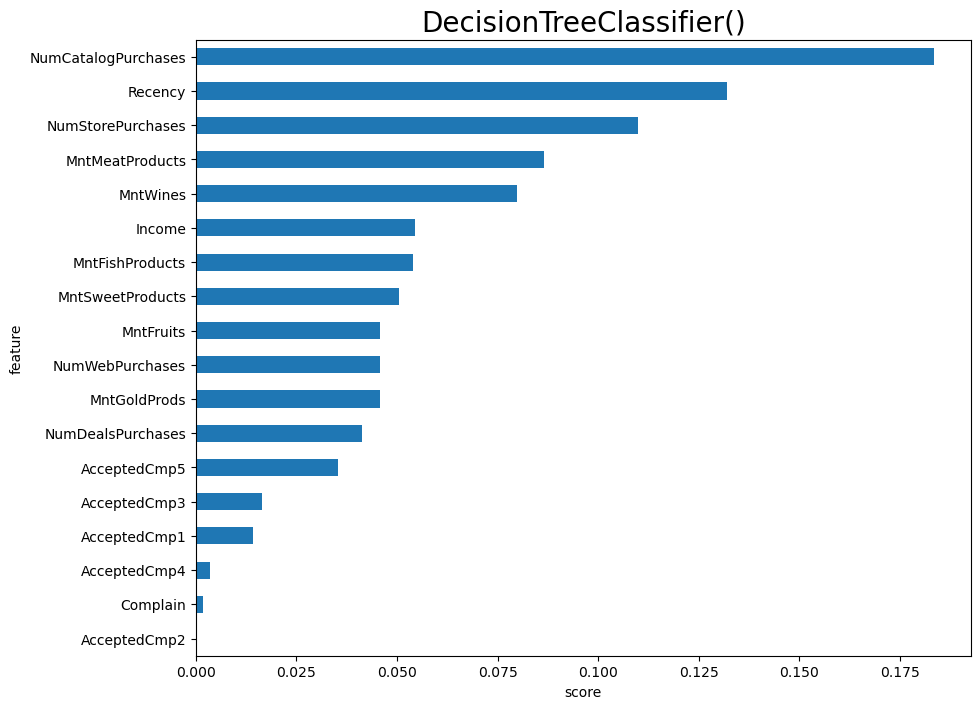

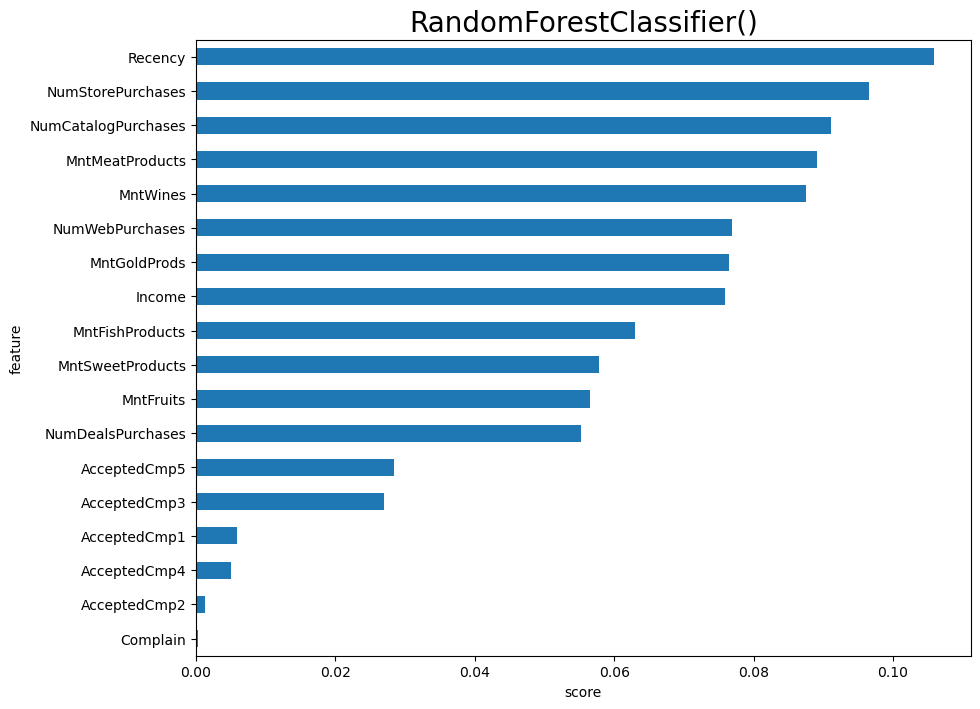

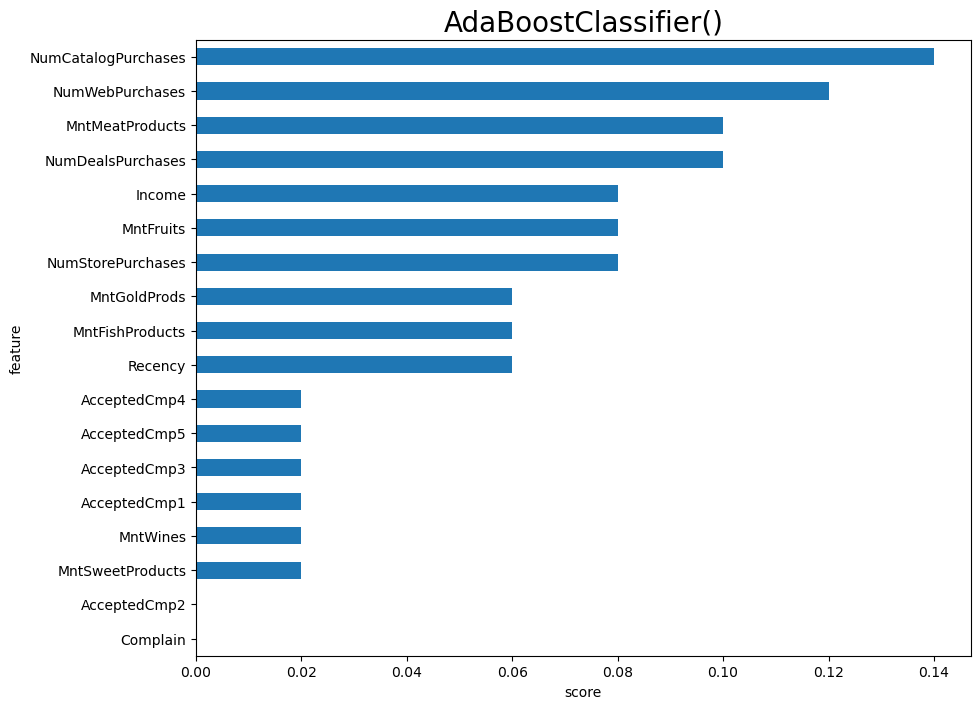

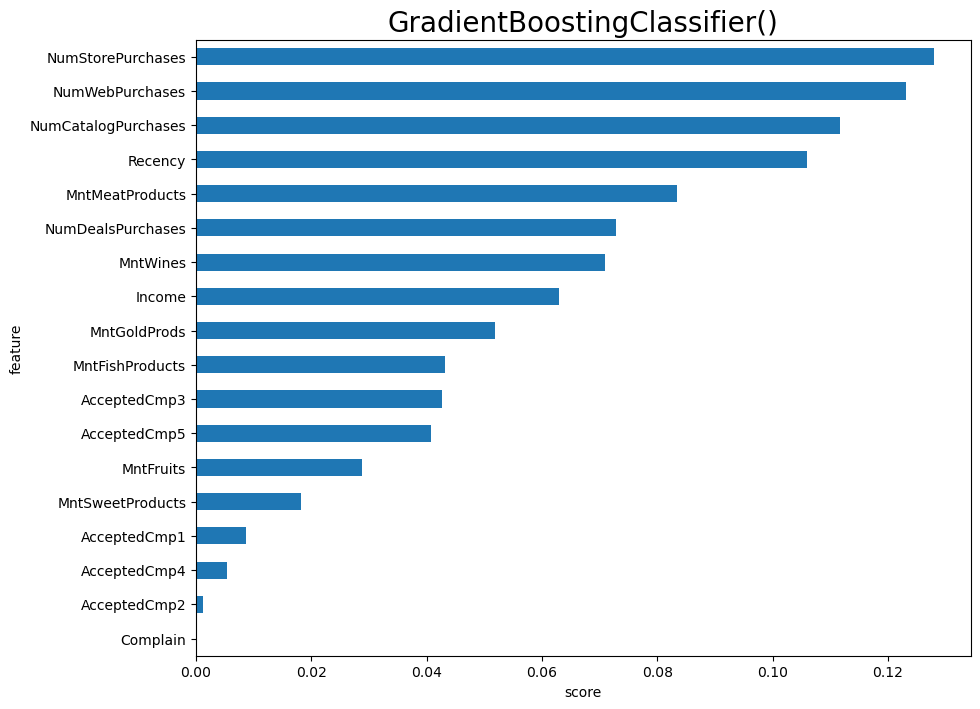

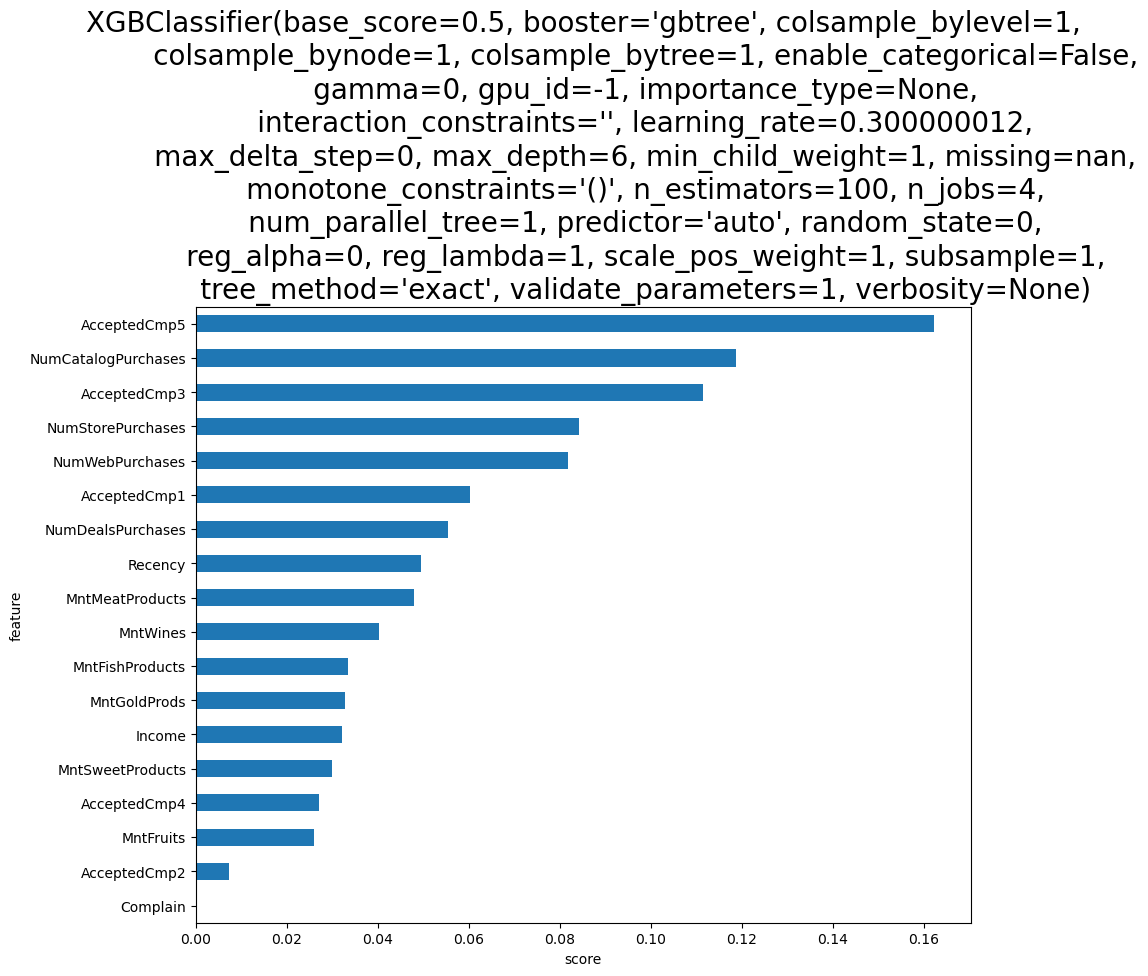

In [43]:
model = [dt_sm, rf_sm, ab_sm, gb_sm, xg_sm]

for i in model:
    show_feature_importance(i)
    plt.show()

### SMOTEENN

In [49]:
lr_sn = LogisticRegression()
dt_sn = DecisionTreeClassifier()
rf_sn = RandomForestClassifier()
ab_sn = AdaBoostClassifier()
gb_sn = GradientBoostingClassifier()
xg_sn = XGBClassifier()


# Train the Model
lr_sn.fit(X_smoteenn, y_smoteenn)
dt_sn.fit(X_smoteenn, y_smoteenn)
rf_sn.fit(X_smoteenn, y_smoteenn)
ab_sn.fit(X_smoteenn, y_smoteenn)
gb_sn.fit(X_smoteenn, y_smoteenn)
xg_sn.fit(X_smoteenn, y_smoteenn)

# Predictions for the X test
y_pred_lr_sn = lr_sn.predict(X_test_scaled)
y_pred_dt_sn = dt_sn.predict(X_test_scaled)
y_pred_rf_sn = rf_sn.predict(X_test_scaled)
y_pred_ab_sn = lr_sn.predict(X_test_scaled)
y_pred_gb_sn = gb_sn.predict(X_test_scaled)
y_pred_xg_sn = xg_sn.predict(X_test_scaled)

[13:47:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [50]:
fpr_lr_sn, tpr_lr_sn, thresholds = roc_curve(y_test, y_pred_lr_sn, pos_label=1)
fpr_dt_sn, tpr_dt_sn, thresholds = roc_curve(y_test, y_pred_dt_sn, pos_label=1)
fpr_rf_sn, tpr_rf_sn, thresholds = roc_curve(y_test, y_pred_rf_sn, pos_label=1)
fpr_ab_sn, tpr_ab_sn, thresholds = roc_curve(y_test, y_pred_ab_sn, pos_label=1)
fpr_gb_sn, tpr_gb_sn, thresholds = roc_curve(y_test, y_pred_gb_sn, pos_label=1)
fpr_xg_sn, tpr_xg_sn, thresholds = roc_curve(y_test, y_pred_xg_sn, pos_label=1)

asdq = [['Logistic Regression', accuracy_score(y_test, y_pred_lr_sn), precision_score(y_test, y_pred_lr_sn),
          recall_score(y_test, y_pred_lr_sn), f1_score(y_test, y_pred_lr_sn), auc(fpr_lr_sn, tpr_lr_sn)],
        ['Decision Tree', accuracy_score(y_test, y_pred_dt_sn), precision_score(y_test, y_pred_dt_sn),
          recall_score(y_test, y_pred_dt_sn), f1_score(y_test, y_pred_dt_sn), auc(fpr_dt_sn, tpr_dt_sn)],
        ['Random Forest', accuracy_score(y_test, y_pred_rf_sn), precision_score(y_test, y_pred_rf_sn),
          recall_score(y_test, y_pred_rf_sn), f1_score(y_test, y_pred_rf_sn), auc(fpr_rf_sn, tpr_rf_sn)],
        ['Ada Boost', accuracy_score(y_test, y_pred_ab_sn), precision_score(y_test, y_pred_ab_sn),
          recall_score(y_test, y_pred_ab_sn), f1_score(y_test, y_pred_ab_sn), auc(fpr_ab_sn, tpr_ab_sn)],
        ['Gradient Boost', accuracy_score(y_test, y_pred_gb_sn), precision_score(y_test, y_pred_gb_sn),
          recall_score(y_test, y_pred_gb_sn), f1_score(y_test, y_pred_gb_sn), auc(fpr_gb_sn, tpr_gb_sn)],
        ['XG Boost', accuracy_score(y_test, y_pred_xg_sn), precision_score(y_test, y_pred_xg_sn),
          recall_score(y_test, y_pred_xg_sn), f1_score(y_test, y_pred_xg_sn), auc(fpr_xg_sn, tpr_xg_sn)]]

df_score_sn = pd.DataFrame(abcd,columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'],dtype=float)
df_score_sn

Model  Accuracy  Precision    Recall  F1 Score       AUC
0  Logistic Regression  0.866005   0.420290  0.674419  0.517857  0.781654
1        Decision Tree  0.826303   0.315068  0.534884  0.396552  0.697997
2        Random Forest  0.888337   0.479167  0.534884  0.505495  0.732720
3            Ada Boost  0.866005   0.420290  0.674419  0.517857  0.781654
4       Gradient Boost  0.900744   0.529412  0.627907  0.574468  0.780620
5             XG Boost  0.903226   0.550000  0.511628  0.530120  0.730814

## Hyperparameter SMOTE-NC

### Logistic Regression

In [39]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

param = {
    'penalty' : ['none', 'l2', 'l1', 'elasticnet'],
    'C' : [0.0001, 0.001, 0.002]
     }


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)
lr = LogisticRegression()

# search
lr_clf = RandomizedSearchCV(lr,
                            param,
                            scoring='roc_auc',
                            cv=skf,
                            refit=True) # refits best model to entire dataset

search_lr = lr_clf.fit(X_smotenc,y_smotenc)

# best hyperparameters
search_lr.best_params_

{'penalty': 'none', 'C': 0.002}

In [40]:
# let's get the predictions
y_train_pred_lr = search_lr.predict(X_train_scaled) 
y_test_pred_lr = search_lr.predict(X_test_scaled) 

In [42]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

print('AUC Train Score:', roc_auc_score(y_train, y_train_pred_lr))
print('AUC Test Score:', roc_auc_score(y_test, y_test_pred_lr))

AUC Train Score: 0.7600707429914089
AUC Test Score: 0.7816537467700257


### Decision Tree

In [43]:
hyperparameters = dict(
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum depth of the tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 20, num = 10)], # number minimum samples in a node 
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 20, num = 10)], # number of  minimum samples in a
                       max_features = ['auto', 'sqrt', 'log2'], # num of features that is considered
                      )
# Stratified KFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# Init
dt = DecisionTreeClassifier()
dt_tuned = RandomizedSearchCV(dt, hyperparameters, cv=5, scoring='roc_auc')
search_dt = dt_tuned.fit(X_smotenc,y_smotenc)

# best hyperparameters
search_dt.best_params_

{'min_samples_split': 12,
 'min_samples_leaf': 7,
 'max_features': 'auto',
 'max_depth': 30,
 'criterion': 'gini'}

In [45]:
# let's get the predictions
y_train_pred_dt = search_dt.predict(X_train_scaled)
y_test_pred_dt = search_dt.predict(X_test_scaled)

In [46]:
print('AUC Train Score:', roc_auc_score(y_train, y_train_pred_dt))
print('AUC Test Score:', roc_auc_score(y_test, y_test_pred_dt))

AUC Train Score: 0.8236808522092143
AUC Test Score: 0.7375645994832041


Overfitting

### Random Forest

max_depth: 1; train: 0.5607965394833925; test: 0.5688953488372093
max_depth: 2; train: 0.6365301734374951; test: 0.6261627906976744
max_depth: 3; train: 0.6856766025630876; test: 0.717797157622739
max_depth: 4; train: 0.7194996057519055; test: 0.717797157622739
max_depth: 5; train: 0.759518162328882; test: 0.7382751937984496
max_depth: 6; train: 0.8159241396999914; test: 0.7676033591731266
max_depth: 7; train: 0.8501097244696652; test: 0.7847868217054264
max_depth: 8; train: 0.8853909706103088; test: 0.761531007751938
max_depth: 9; train: 0.9214132131694696; test: 0.7759366925064599
max_depth: 10; train: 0.9647108372309534; test: 0.7731589147286821
max_depth: 11; train: 0.9712610555715647; test: 0.7587532299741603
max_depth: 12; train: 0.9799946800257132; test: 0.7936369509043928
max_depth: 13; train: 0.9843614922527875; test: 0.7717700258397933
max_depth: 14; train: 0.9847240738336432; test: 0.7471253229974161
max_depth: 15; train: 0.9887283044798617; test: 0.7587532299741603
max_dept

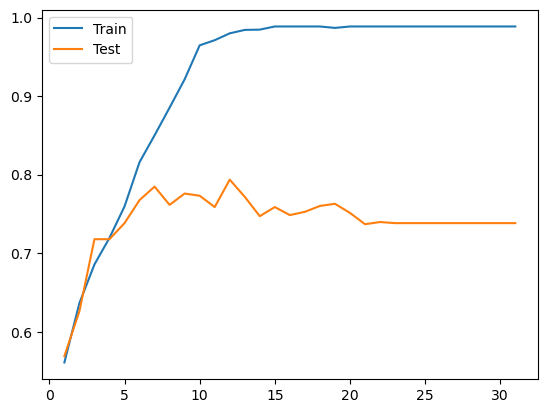

In [47]:
values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion
#values = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features

train_score = []
test_score = []

for x in values :
    model_rf_tunned = RandomForestClassifier(max_depth=x, random_state=123)
    model_rf_tunned.fit(X_smotenc,y_smotenc)
    
    # eval on train
    y_pred_train_rf = model_rf_tunned.predict(X_train_scaled)
    train_auc = roc_auc_score(y_train, y_pred_train_rf)
    train_score.append(train_auc)
    
    # eval on test
    y_pred_test_rf = model_rf_tunned.predict(X_test_scaled)
    test_auc = roc_auc_score(y_test, y_pred_test_rf)
    test_score.append(test_auc)
    
    print('max_depth: ' + str(x) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

`max_depth`: 12; train: 0.9799946800257132; test: 0.7936369509043928

min_samples_split: 2; train: 0.9799946800257132; test: 0.7936369509043928
min_samples_split: 4; train: 0.9694402310388833; test: 0.7471253229974161
min_samples_split: 7; train: 0.9494269944361936; test: 0.7731589147286821
min_samples_split: 10; train: 0.9399682068203336; test: 0.7587532299741603
min_samples_split: 13; train: 0.9319676621562997; test: 0.7689922480620155
min_samples_split: 16; train: 0.9203254684269025; test: 0.7457364341085273
min_samples_split: 19; train: 0.9130580035529828; test: 0.748514211886305
min_samples_split: 22; train: 0.9003201484526159; test: 0.7689922480620155
min_samples_split: 25; train: 0.8810399916400404; test: 0.7820090439276486
min_samples_split: 27; train: 0.8879686248183134; test: 0.7648255813953488
min_samples_split: 30; train: 0.8712265390717278; test: 0.790859173126615
min_samples_split: 33; train: 0.8635885759885493; test: 0.7703811369509044
min_samples_split: 36; train: 0.851221219097441; test: 0.7587532299741603
min_samples_split: 39; train: 0

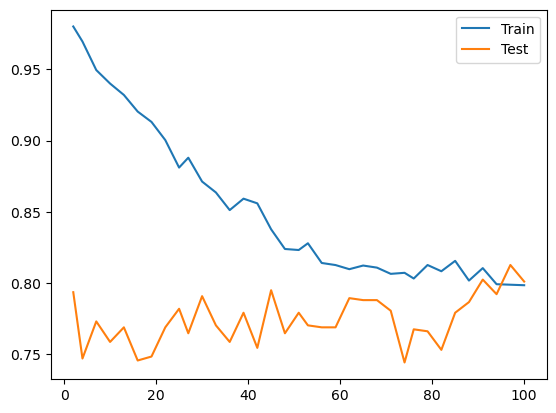

In [50]:
#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion
#values = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features

train_score = []
test_score = []

for x in values :
    model_rf_tunned = RandomForestClassifier(max_depth=12, 
                                             random_state=123,
                                             min_samples_split=x)
    model_rf_tunned.fit(X_smotenc,y_smotenc)
    
    # eval on train
    y_pred_train_rf = model_rf_tunned.predict(X_train_scaled)
    train_auc = roc_auc_score(y_train, y_pred_train_rf)
    train_score.append(train_auc)
    
    # eval on test
    y_pred_test_rf = model_rf_tunned.predict(X_test_scaled)
    test_auc = roc_auc_score(y_test, y_pred_test_rf)
    test_score.append(test_auc)
    
    print('min_samples_split: ' + str(x) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

`min_samples_split`: 91; train: 0.810524999129171; test: 0.8024870801033591

min_samples_leaf: 1; train: 0.810524999129171; test: 0.8024870801033591
min_samples_leaf: 2; train: 0.8072538482730667; test: 0.7997093023255814
min_samples_leaf: 4; train: 0.7919700054783068; test: 0.7969315245478035
min_samples_leaf: 5; train: 0.7948864913819583; test: 0.7983204134366926
min_samples_leaf: 7; train: 0.7901412643172225; test: 0.7983204134366926
min_samples_leaf: 9; train: 0.8007036299324554; test: 0.7983204134366926
min_samples_leaf: 10; train: 0.7916074238974512; test: 0.7983204134366926
min_samples_leaf: 12; train: 0.7901650142024313; test: 0.7983204134366926
min_samples_leaf: 14; train: 0.78834418966975; test: 0.7997093023255814
min_samples_leaf: 15; train: 0.7865233651370686; test: 0.7969315245478035
min_samples_leaf: 17; train: 0.7861607835562128; test: 0.7969315245478035
min_samples_leaf: 18; train: 0.7876190265080386; test: 0.7880813953488373
min_samples_leaf: 20; train: 0.7828896327001086; test: 0.7880813953488373
min_samples_leaf: 22; train: 0.7806983099581686

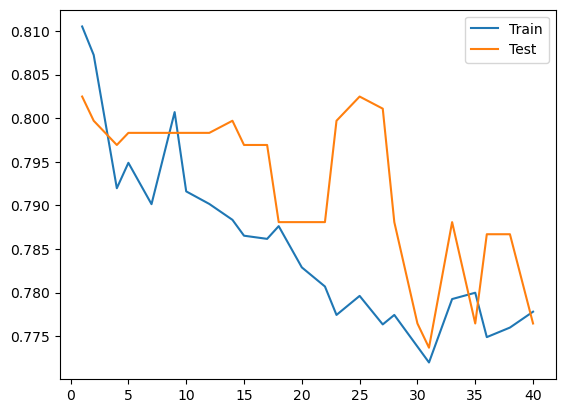

In [51]:
#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion
#values = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features

train_score = []
test_score = []

for x in values :
    model_rf_tunned = RandomForestClassifier(max_depth=12, 
                                             random_state=123,
                                             min_samples_split=91,
                                             min_samples_leaf=x)
    model_rf_tunned.fit(X_smotenc,y_smotenc)
    
    # eval on train
    y_pred_train_rf = model_rf_tunned.predict(X_train_scaled)
    train_auc = roc_auc_score(y_train, y_pred_train_rf)
    train_score.append(train_auc)
    
    # eval on test
    y_pred_test_rf = model_rf_tunned.predict(X_test_scaled)
    test_auc = roc_auc_score(y_test, y_pred_test_rf)
    test_score.append(test_auc)
    
    print('min_samples_leaf: ' + str(x) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

`min_samples_leaf`: 1; train: 0.810524999129171; test: 0.8024870801033591

criterion: gini; train: 0.810524999129171; test: 0.8024870801033591
criterion: entropy; train: 0.7934203318017297; test: 0.7880813953488373


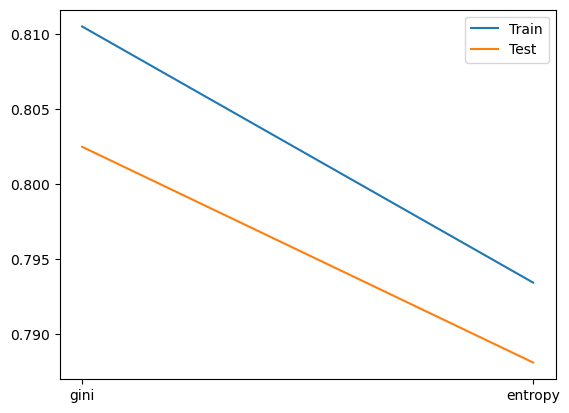

In [53]:
#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
values = ['gini', 'entropy'] # criterion
#values = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features

train_score = []
test_score = []

for x in values :
    model_rf_tunned = RandomForestClassifier(max_depth=12, 
                                             random_state=123,
                                             min_samples_split=91,
                                             min_samples_leaf=1,
                                             criterion=x)
    model_rf_tunned.fit(X_smotenc,y_smotenc)
    
    # eval on train
    y_pred_train_rf = model_rf_tunned.predict(X_train_scaled)
    train_auc = roc_auc_score(y_train, y_pred_train_rf)
    train_score.append(train_auc)
    
    # eval on test
    y_pred_test_rf = model_rf_tunned.predict(X_test_scaled)
    test_auc = roc_auc_score(y_test, y_pred_test_rf)
    test_score.append(test_auc)
    
    print('criterion: ' + str(x) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

n_estimators: 100; train: 0.810524999129171; test: 0.8024870801033591
n_estimators: 105; train: 0.8087120912248925; test: 0.8024870801033591
n_estimators: 110; train: 0.8072538482730667; test: 0.8024870801033591
n_estimators: 115; train: 0.8025165378367338; test: 0.8024870801033591
n_estimators: 121; train: 0.8032496176268482; test: 0.8024870801033591
n_estimators: 126; train: 0.8028870360459924; test: 0.8024870801033591
n_estimators: 131; train: 0.8036121992077039; test: 0.8024870801033591
n_estimators: 136; train: 0.801066211513311; test: 0.8024870801033591
n_estimators: 142; train: 0.801066211513311; test: 0.8024870801033591
n_estimators: 147; train: 0.8025165378367338; test: 0.8024870801033591
n_estimators: 152; train: 0.799970550142341; test: 0.8010981912144702
n_estimators: 157; train: 0.8036042825793009; test: 0.7894702842377261
n_estimators: 163; train: 0.8036042825793009; test: 0.8024870801033591
n_estimators: 168; train: 0.805787688692838; test: 0.8024870801033591
n_estimator

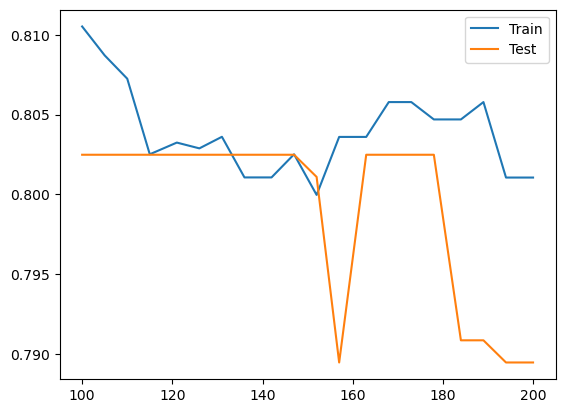

In [55]:
#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion
values = [int(x) for x in np.linspace(start = 100, stop = 200, num = 20)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features

train_score = []
test_score = []

for x in values :
    model_rf_tunned = RandomForestClassifier(max_depth=12, 
                                             random_state=123,
                                             min_samples_split=91,
                                             min_samples_leaf=1,
                                             criterion='gini',
                                             n_estimators=x)
    model_rf_tunned.fit(X_smotenc,y_smotenc)
    
    # eval on train
    y_pred_train_rf = model_rf_tunned.predict(X_train_scaled)
    train_auc = roc_auc_score(y_train, y_pred_train_rf)
    train_score.append(train_auc)
    
    # eval on test
    y_pred_test_rf = model_rf_tunned.predict(X_test_scaled)
    test_auc = roc_auc_score(y_test, y_pred_test_rf)
    test_score.append(test_auc)
    
    print('n_estimators: ' + str(x) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

`n_estimators`: 142; train: 0.801066211513311; test: 0.8024870801033591

In [57]:
model_rf_tunned = RandomForestClassifier(max_depth=12, 
                                             random_state=123,
                                             min_samples_split=91,
                                             min_samples_leaf=1,
                                             criterion='gini',
                                             n_estimators=142)
model_rf_tunned.fit(X_smotenc,y_smotenc)

# train
y_pred_train_rf = model_rf_tunned.predict(X_train_scaled)
train_auc_rf_sm = roc_auc_score(y_train, y_pred_train_rf)
   
# test
y_pred_test_rf = model_rf_tunned.predict(X_test_scaled)
test_auc_rf_sm = roc_auc_score(y_test, y_pred_test_rf)

print('train auc: ', train_auc_rf_sm)
print('test auc: ', test_auc_rf_sm)   

train auc:  0.801066211513311
test auc:  0.8024870801033591


### AdaBoost

In [58]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], 
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
model_ab_tunned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='recall')
model_ab_tunned.fit(X_smotenc,y_smotenc)

# train
y_pred_train_ab = model_ab_tunned.predict(X_train_scaled)
train_auc = roc_auc_score(y_train, y_pred_train_ab)

# test
y_pred_test_ab = model_ab_tunned.predict(X_test_scaled)
test_auc = roc_auc_score(y_test, y_pred_test_ab)

print('train auc: ', train_auc)
print('test auc: ', test_auc) 

train auc:  0.7803594782625217
test auc:  0.7504198966408269


In [59]:
model_ab_tunned.best_params_

{'n_estimators': 1700,
 'learning_rate': 0.07394736842105264,
 'algorithm': 'SAMME.R'}

we will use `n_estimators` less than 1700 to prevent overfit

In [61]:
hyperparameters = dict(n_estimators = [300], 
                       learning_rate = [0.07394736842105264],  
                       algorithm = ['SAMME.R']
                      )


# Init model
ab = AdaBoostClassifier(random_state=42)
model_ab_tunned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='roc_auc')
model_ab_tunned.fit(X_smotenc,y_smotenc)

# train
y_pred_train_ab = model_ab_tunned.predict(X_train_scaled)
train_auc_ab = roc_auc_score(y_train, y_pred_train_ab)

# test
y_pred_test_ab = model_ab_tunned.predict(X_test_scaled)
test_auc_ab = roc_auc_score(y_test, y_pred_test_ab)

print('train auc: ', train_auc_ab)
print('test auc: ', test_auc_ab) 

train auc:  0.7483572996063853
test auc:  0.7504198966408269


### Gradient Boosting

max_depth: 1; train: 0.7345000332498393; test: 0.7662144702842377
max_depth: 2; train: 0.7642950559072298; test: 0.7806201550387597
max_depth: 3; train: 0.8413840166439196; test: 0.7806201550387597
max_depth: 4; train: 0.9210506315886139; test: 0.7689922480620155
max_depth: 5; train: 0.9585232004711978; test: 0.774547803617571
max_depth: 6; train: 0.9829032493009617; test: 0.7438307493540052
max_depth: 7; train: 0.9887283044798617; test: 0.734108527131783
max_depth: 8; train: 0.9832658308818174; test: 0.7629198966408269
max_depth: 9; train: 0.9869074799471803; test: 0.7122416020671835
max_depth: 10; train: 0.9850866554144989; test: 0.6931524547803617
max_depth: 11; train: 0.9869074799471803; test: 0.7108527131782946
max_depth: 12; train: 0.9850866554144989; test: 0.7457364341085273
max_depth: 13; train: 0.9850866554144989; test: 0.7271640826873385
max_depth: 14; train: 0.9850866554144989; test: 0.6974806201550388
max_depth: 15; train: 0.9832658308818174; test: 0.6631136950904393
max_de

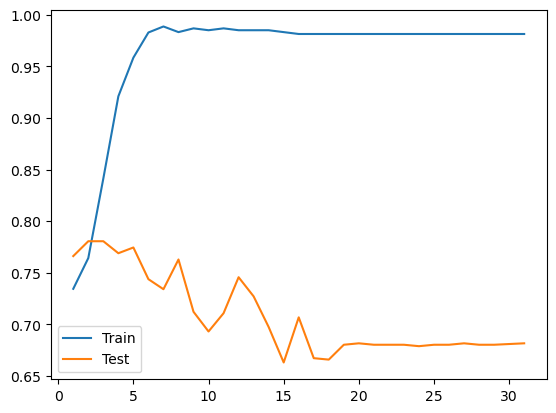

In [62]:
values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=200, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=120, num=25)] # min_samples_leaf
#values = ['friedman_mse', 'squared_error'', 'mse'}] # criterion
#values = [int(x) for x in np.linspace(start = 3, stop = 75, num = 30)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features
#vallues = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)] #learning_rate = 


train_score = []
test_score = []

for x in values :
    model_gb_tunned = GradientBoostingClassifier(max_depth=x)
    model_gb_tunned.fit(X_smotenc,y_smotenc)
    
    # eval on train
    y_pred_train_gb = model_gb_tunned.predict(X_train_scaled)
    train_auc = roc_auc_score(y_train, y_pred_train_gb)
    train_score.append(train_auc)
    
    # eval on test
    y_pred_test_gb = model_gb_tunned.predict(X_test_scaled)
    test_auc = roc_auc_score(y_test, y_pred_test_gb)
    test_score.append(test_auc)
    
    print('max_depth: ' + str(x) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

`max_depth`: 3; train: 0.8413840166439196; test: 0.7806201550387597

min_samples_split: 2; train: 0.8413840166439196; test: 0.7806201550387597
min_samples_split: 7; train: 0.8300964878669753; test: 0.7717700258397933
min_samples_split: 13; train: 0.8319252290280597; test: 0.7587532299741603
min_samples_split: 19; train: 0.830466986076234; test: 0.761531007751938
min_samples_split: 25; train: 0.8388459455779297; test: 0.7471253229974161
min_samples_split: 31; train: 0.8250124291065927; test: 0.7717700258397933
min_samples_split: 36; train: 0.8308374842854926; test: 0.7601421188630492
min_samples_split: 42; train: 0.8319331456564627; test: 0.7601421188630492
min_samples_split: 48; train: 0.8399257736920938; test: 0.7806201550387597
min_samples_split: 54; train: 0.832650392189771; test: 0.7820090439276486
min_samples_split: 60; train: 0.8446710007568295; test: 0.7457364341085273
min_samples_split: 66; train: 0.8381207824162183; test: 0.7573643410852714
min_samples_split: 71; train: 0.8297576561713285; test: 0.7703811369509044
min_samples_split: 77; train: 

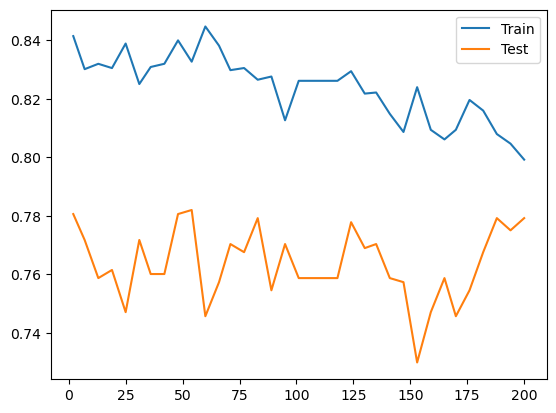

In [63]:
#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
values = [int(x) for x in np.linspace(start=2, stop=200, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=120, num=25)] # min_samples_leaf
#values = ['friedman_mse', 'squared_error'', 'mse'}] # criterion
#values = [int(x) for x in np.linspace(start = 3, stop = 75, num = 30)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features
#vallues = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)] #learning_rate = 


train_score = []
test_score = []

for x in values :
    model_gb_tunned = GradientBoostingClassifier(max_depth=3,
                                                 random_state=123,
                                                 min_samples_split=x)
    model_gb_tunned.fit(X_smotenc,y_smotenc)
    
    # eval on train
    y_pred_train_gb = model_gb_tunned.predict(X_train_scaled)
    train_auc = roc_auc_score(y_train, y_pred_train_gb)
    train_score.append(train_auc)
    
    # eval on test
    y_pred_test_gb = model_gb_tunned.predict(X_test_scaled)
    test_auc = roc_auc_score(y_test, y_pred_test_gb)
    test_score.append(test_auc)
    
    print('min_samples_split: ' + str(x) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

`min_samples_split`: 54; train: 0.832650392189771; test: 0.7820090439276486

min_samples_leaf: 1; train: 0.832650392189771; test: 0.7820090439276486
min_samples_leaf: 5; train: 0.8122666573778227; test: 0.7847868217054264
min_samples_leaf: 10; train: 0.8213786966696328; test: 0.7499031007751938
min_samples_leaf: 15; train: 0.8173902992802201; test: 0.7806201550387597
min_samples_leaf: 20; train: 0.8177528808610759; test: 0.7833979328165375
min_samples_leaf: 25; train: 0.8112026625204644; test: 0.7689922480620155
min_samples_leaf: 30; train: 0.8159478895852004; test: 0.7676033591731266
min_samples_leaf: 35; train: 0.8195816220221602; test: 0.7662144702842377
min_samples_leaf: 40; train: 0.8101149177778973; test: 0.7833979328165375
min_samples_leaf: 45; train: 0.8112105791488674; test: 0.7731589147286821
min_samples_leaf: 50; train: 0.8039431142749476; test: 0.7689922480620155
min_samples_leaf: 55; train: 0.7901175144320137; test: 0.7922480620155039
min_samples_leaf: 60; train: 0.8159716394704092; test: 0.7778423772609819
min_samples_leaf: 65; train: 0.8152464763

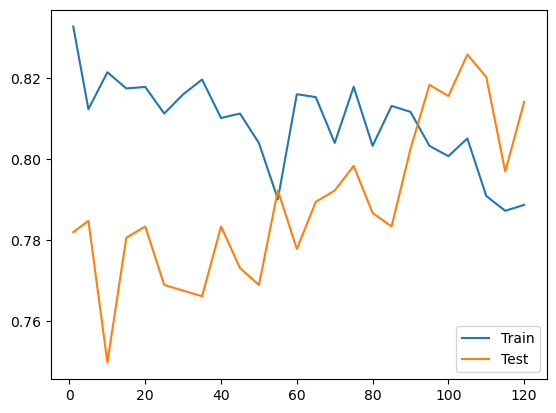

In [64]:
#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=200, num=35)] # min_samples_split
values = [int(x) for x in np.linspace(start=1, stop=120, num=25)] # min_samples_leaf
#values = ['friedman_mse', 'squared_error'', 'mse'}] # criterion
#values = [int(x) for x in np.linspace(start = 3, stop = 75, num = 30)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features
#vallues = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)] #learning_rate = 


train_score = []
test_score = []

for x in values :
    model_gb_tunned = GradientBoostingClassifier(max_depth=3,
                                                 random_state=123,
                                                 min_samples_split=54,
                                                 min_samples_leaf=x)
    model_gb_tunned.fit(X_smotenc,y_smotenc)
    
    # eval on train
    y_pred_train_gb = model_gb_tunned.predict(X_train_scaled)
    train_auc = roc_auc_score(y_train, y_pred_train_gb)
    train_score.append(train_auc)
    
    # eval on test
    y_pred_test_gb = model_gb_tunned.predict(X_test_scaled)
    test_auc = roc_auc_score(y_test, y_pred_test_gb)
    test_score.append(test_auc)
    
    print('min_samples_leaf: ' + str(x) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

`min_samples_leaf`: 105; train: 0.8050704421595295; test: 0.8257428940568475

n_estimators: 3; train: 0.538221481929504; test: 0.5683785529715762
n_estimators: 13; train: 0.7068013337935534; test: 0.7354974160206719
n_estimators: 23; train: 0.7381100158015902; test: 0.7806201550387597
n_estimators: 33; train: 0.7515888673204746; test: 0.7983204134366926
n_estimators: 43; train: 0.7585095838703446; test: 0.821576227390181
n_estimators: 54; train: 0.7588800820796032; test: 0.8085594315245478
n_estimators: 64; train: 0.7690640328571745; test: 0.8127260981912146
n_estimators: 74; train: 0.7839773774426757; test: 0.8168927648578811
n_estimators: 84; train: 0.7876190265080386; test: 0.8113372093023257
n_estimators: 95; train: 0.8050783587879325; test: 0.8141149870801033
n_estimators: 105; train: 0.8054330237403853; test: 0.8271317829457364
n_estimators: 115; train: 0.8094372543866039; test: 0.8285206718346253
n_estimators: 125; train: 0.8036042825793009; test: 0.8285206718346253
n_estimators: 136; train: 0.8126925719859021; test: 0.7964147286821706
n_estimators: 146; 

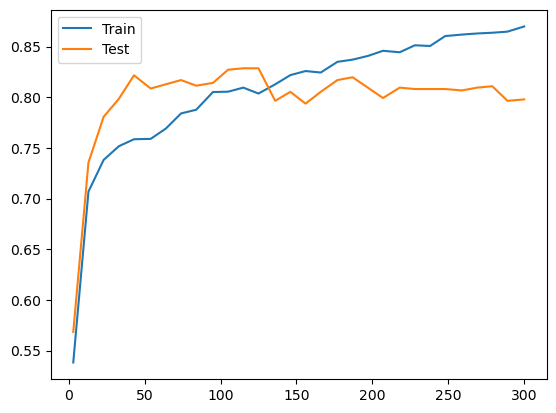

In [67]:
#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=200, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=120, num=25)] # min_samples_leaf
#values = ['friedman_mse', 'squared_error', 'mse'] # criterion
values = [int(x) for x in np.linspace(start = 3, stop = 300, num = 30)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features
#vallues = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)] #learning_rate = 


train_score = []
test_score = []

for x in values :
    model_gb_tunned = GradientBoostingClassifier(max_depth=3,
                                                 random_state=123,
                                                 min_samples_split=54,
                                                 min_samples_leaf=105,
                                                 criterion='friedman_mse',
                                                 n_estimators=x)
    model_gb_tunned.fit(X_smotenc,y_smotenc)
    
    # eval on train
    y_pred_train_gb = model_gb_tunned.predict(X_train_scaled)
    train_auc = roc_auc_score(y_train, y_pred_train_gb)
    train_score.append(train_auc)
    
    # eval on test
    y_pred_test_gb = model_gb_tunned.predict(X_test_scaled)
    test_auc = roc_auc_score(y_test, y_pred_test_gb)
    test_score.append(test_auc)
    
    print('n_estimators: ' + str(x) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

`n_estimators`: 125; train: 0.8036042825793009; test: 0.8285206718346253

max_features: auto; train: 0.8036042825793009; test: 0.8285206718346253
max_features: sqrt; train: 0.8105408323859767; test: 0.7880813953488373
max_features: log2; train: 0.8105408323859767; test: 0.7880813953488373


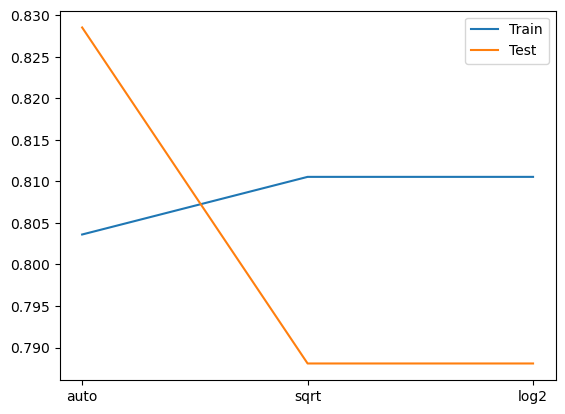

In [68]:
#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=200, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=120, num=25)] # min_samples_leaf
#values = ['friedman_mse', 'squared_error', 'mse'] # criterion
#values = [int(x) for x in np.linspace(start = 3, stop = 300, num = 30)] # n_estimators
values = ['auto', 'sqrt', 'log2'] #max_features
#vallues = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)] #learning_rate = 


train_score = []
test_score = []

for x in values :
    model_gb_tunned = GradientBoostingClassifier(max_depth=3,
                                                 random_state=123,
                                                 min_samples_split=54,
                                                 min_samples_leaf=105,
                                                 criterion='friedman_mse',
                                                 n_estimators=125,
                                                 max_features=x)
    model_gb_tunned.fit(X_smotenc,y_smotenc)
    
    # eval on train
    y_pred_train_gb = model_gb_tunned.predict(X_train_scaled)
    train_auc = roc_auc_score(y_train, y_pred_train_gb)
    train_score.append(train_auc)
    
    # eval on test
    y_pred_test_gb = model_gb_tunned.predict(X_test_scaled)
    test_auc = roc_auc_score(y_test, y_pred_test_gb)
    test_score.append(test_auc)
    
    print('max_features: ' + str(x) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

`max_features`: auto; train: 0.8036042825793009; test: 0.8285206718346253

In [78]:
model_gb_tunned = GradientBoostingClassifier(max_depth=3,
                                                 random_state=123,
                                                 min_samples_split=54,
                                                 min_samples_leaf=105,
                                                 criterion='friedman_mse',
                                                 n_estimators=125,
                                                 max_features='auto')
model_gb_tunned.fit(X_smotenc,y_smotenc)

# train
y_pred_train_gb = model_gb_tunned.predict(X_train_scaled)
train_auc_gb = roc_auc_score(y_train, y_pred_train_gb)

# test
y_pred_test_gb = model_gb_tunned.predict(X_test_scaled)
test_auc_gb = roc_auc_score(y_test, y_pred_test_gb)

print('train auc: ', train_auc_gb)
print('test auc: ', test_auc_gb)   

train auc:  0.8036042825793009
test auc:  0.8285206718346253


### XGBClassifier

In [79]:
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=42)
model_xg_tunned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
model_xg = model_xg_tunned.fit(X_smotenc,y_smotenc)


# train
y_pred_train_xg = model_xg_tunned.predict(X_train_scaled)
train_auc_xg = roc_auc_score(y_train, y_pred_train_xg)

# test
y_pred_test_xg = model_xg_tunned.predict(X_test_scaled)
test_auc_xg = roc_auc_score(y_test, y_pred_test_xg)

print('train auc: ', train_auc_xg)
print('test auc: ', test_auc_xg)   

[23:08:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:08:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:08:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:08:58] WARNING: /Users/runner/miniforge3/cond

In [81]:
model_xg.best_params_

{'tree_method': 'approx',
 'min_child_weight': 4,
 'max_depth': 50,
 'lambda': 0.6000000000000001,
 'gamma': 1.0,
 'eta': 0.31313131313131315,
 'colsample_bytree': 0.7000000000000001,
 'alpha': 0.6000000000000001}

In [82]:
best_params = model_xg.best_params_
xg = XGBClassifier(**best_params)

xg.fit(X_smotenc,y_smotenc)

# train
y_pred_train_xg = xg.predict(X_train_scaled)
train_auc_xg = roc_auc_score(y_train, y_pred_train_xg)

# test
y_pred_test_xg = xg.predict(X_test_scaled)
test_auc_xg = roc_auc_score(y_test, y_pred_test_xg)

print('train auc: ', train_auc_xg)
print('test auc: ', test_auc_xg)   

[23:11:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train auc:  0.970898473990709
test auc:  0.7559754521963825


still overfit

## Hyperparameter SMOTEENN

### Logistic Regression

In [83]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

param = {
    'penalty' : ['none', 'l2', 'l1', 'elasticnet'],
    'C' : [0.0001, 0.001, 0.002]
     }


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)
lr = LogisticRegression()

# search
lr_clf = RandomizedSearchCV(lr,
                            param,
                            scoring='roc_auc',
                            cv=skf,
                            refit=True) # refits best model to entire dataset

search_lr_sn = lr_clf.fit(X_smoteenn,y_smoteenn)

# best hyperparameters
search_lr_sn.best_params_

{'penalty': 'none', 'C': 0.0001}

In [84]:
# let's get the predictions
y_train_pred_lr_sn = search_lr_sn.predict(X_train_scaled) 
y_test_pred_lr_sn = search_lr_sn.predict(X_test_scaled) 

In [85]:
print('AUC Train Score:', roc_auc_score(y_train, y_train_pred_lr_sn))
print('AUC Test Score:', roc_auc_score(y_test, y_test_pred_lr_sn))

AUC Train Score: 0.773503678065556
AUC Test Score: 0.7863049095607235


### Random Forest

max_depth: 1; train: 0.6307732012628605; test: 0.6251937984496124
max_depth: 2; train: 0.6496036935821476; test: 0.6357881136950905
max_depth: 3; train: 0.6699003454816634; test: 0.6524547803617571
max_depth: 4; train: 0.7279133984185744; test: 0.6913436692506458
max_depth: 5; train: 0.7627212301807209; test: 0.716343669250646
max_depth: 6; train: 0.8055375232353044; test: 0.7649547803617571
max_depth: 7; train: 0.835285046122277; test: 0.7760658914728682
max_depth: 8; train: 0.8646858206852002; test: 0.7819767441860466
max_depth: 9; train: 0.8857393022600392; test: 0.8000322997416021
max_depth: 10; train: 0.9042467961404854; test: 0.7967377260981913
max_depth: 11; train: 0.9075258636249923; test: 0.8222545219638242
max_depth: 12; train: 0.9209413821166531; test: 0.7989987080103358
max_depth: 13; train: 0.9176702312605488; test: 0.8045542635658915
max_depth: 14; train: 0.9205708839073944; test: 0.8291989664082688
max_depth: 15; train: 0.9187500593747129; test: 0.795704134366925
max_dep

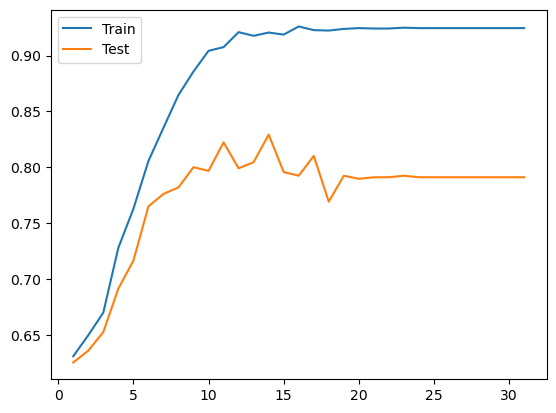

In [86]:
values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion
#values = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features

train_score_sn = []
test_score_sn = []

for x in values :
    model_rf_tunned = RandomForestClassifier(max_depth=x, random_state=123)
    model_rf_tunned.fit(X_smoteenn,y_smoteenn)
    
    # eval on train
    y_pred_train_rf_sn = model_rf_tunned.predict(X_train_scaled)
    train_auc_sn = roc_auc_score(y_train, y_pred_train_rf_sn)
    train_score_sn.append(train_auc_sn)
    
    # eval on test
    y_pred_test_rf_sn = model_rf_tunned.predict(X_test_scaled)
    test_auc_sn = roc_auc_score(y_test, y_pred_test_rf_sn)
    test_score_sn.append(test_auc_sn)
    
    print('max_depth: ' + str(x) + '; train: ' + str(train_auc_sn) + '; test: ' + str(test_auc_sn))
    
plt.plot(values, train_score_sn, label='Train')
plt.plot(values, test_score_sn, label='Test')
plt.legend()
plt.show()

`max_depth`: 14; train: 0.9205708839073944; test: 0.8291989664082688

min_samples_split: 2; train: 0.9205708839073944; test: 0.8291989664082688
min_samples_split: 4; train: 0.9154868251470116; test: 0.8059431524547804
min_samples_split: 7; train: 0.9085740252255448; test: 0.8003875968992249
min_samples_split: 10; train: 0.9067848672064752; test: 0.8194767441860465
min_samples_split: 13; train: 0.890783777878407; test: 0.8022932816537468
min_samples_split: 16; train: 0.8875205436507057; test: 0.8194767441860465
min_samples_split: 19; train: 0.8824127350051143; test: 0.8194767441860465
min_samples_split: 22; train: 0.8820659866810643; test: 0.813921188630491
min_samples_split: 25; train: 0.8656943991437376; test: 0.8097545219638244
min_samples_split: 27; train: 0.8606261736401607; test: 0.8069767441860466
min_samples_split: 30; train: 0.8559046964606338; test: 0.7767764857881136
min_samples_split: 33; train: 0.8504501394909924; test: 0.7856266149870801
min_samples_split: 36; train: 0.8515378842335595; test: 0.8069767441860466
min_samples_split: 39; train: 

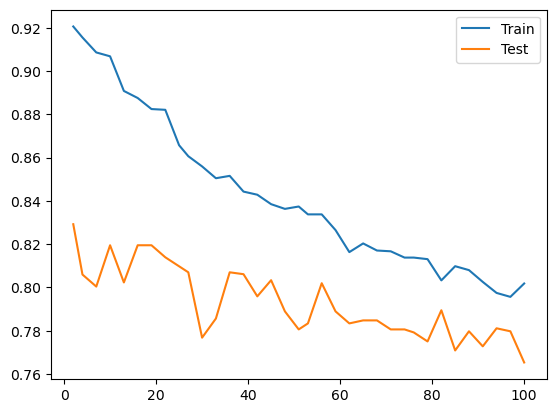

In [93]:
#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion
#values = [int(x) for x in np.linspace(start = 100, stop = 400, num = 20)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features

train_score_sn = []
test_score_sn = []

for x in values :
    model_rf_tunned = RandomForestClassifier(max_depth=14, random_state=123, min_samples_split=x)
    model_rf_tunned.fit(X_smoteenn,y_smoteenn)
    
    # eval on train
    y_pred_train_rf_sn = model_rf_tunned.predict(X_train_scaled)
    train_auc_sn = roc_auc_score(y_train, y_pred_train_rf_sn)
    train_score_sn.append(train_auc_sn)
    
    # eval on test
    y_pred_test_rf_sn = model_rf_tunned.predict(X_test_scaled)
    test_auc_sn = roc_auc_score(y_test, y_pred_test_rf_sn)
    test_score_sn.append(test_auc_sn)
    
    print('min_samples_split: ' + str(x) + '; train: ' + str(train_auc_sn) + '; test: ' + str(test_auc_sn))
    
plt.plot(values, train_score_sn, label='Train')
plt.plot(values, test_score_sn, label='Test')
plt.legend()
plt.show()

`min_samples_split`: 56; train: 0.8337476368864218; test: 0.8019379844961241

min_samples_leaf: 1; train: 0.8337476368864218; test: 0.8019379844961241
min_samples_leaf: 2; train: 0.8235636861088506; test: 0.8019379844961241
min_samples_leaf: 4; train: 0.8148538115399109; test: 0.7778100775193799
min_samples_leaf: 5; train: 0.8148696447967169; test: 0.7838824289405686
min_samples_leaf: 7; train: 0.8046936106475485; test: 0.790826873385013
min_samples_leaf: 9; train: 0.8014382930482503; test: 0.7880490956072354
min_samples_leaf: 10; train: 0.80870575792217; test: 0.7852713178294575
min_samples_leaf: 12; train: 0.8039842807426432; test: 0.7722545219638244
min_samples_leaf: 14; train: 0.8021713728383647; test: 0.7750322997416021
min_samples_leaf: 15; train: 0.8003663815624892; test: 0.7708656330749355
min_samples_leaf: 17; train: 0.8007289631433449; test: 0.7722545219638244
min_samples_leaf: 18; train: 0.7960074859638179; test: 0.7722545219638244
min_samples_leaf: 20; train: 0.8007289631433449; test: 0.7694767441860465
min_samples_leaf: 22; train: 0.7960074859638179

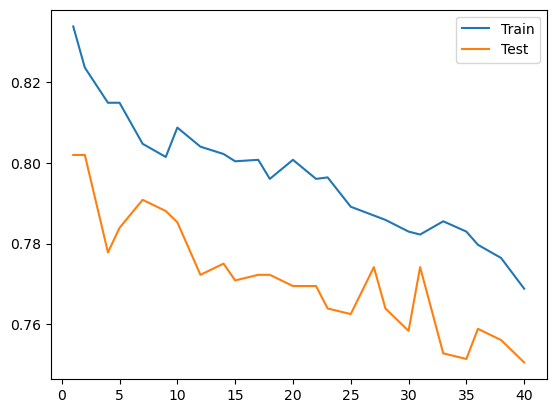

In [94]:
#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion
#values = [int(x) for x in np.linspace(start = 100, stop = 400, num = 20)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features

train_score_sn = []
test_score_sn = []

for x in values :
    model_rf_tunned = RandomForestClassifier(max_depth=14, 
                                             random_state=123, 
                                             min_samples_split=56,
                                             min_samples_leaf=x)
    model_rf_tunned.fit(X_smoteenn,y_smoteenn)
    
    # eval on train
    y_pred_train_rf_sn = model_rf_tunned.predict(X_train_scaled)
    train_auc_sn = roc_auc_score(y_train, y_pred_train_rf_sn)
    train_score_sn.append(train_auc_sn)
    
    # eval on test
    y_pred_test_rf_sn = model_rf_tunned.predict(X_test_scaled)
    test_auc_sn = roc_auc_score(y_test, y_pred_test_rf_sn)
    test_score_sn.append(test_auc_sn)
    
    print('min_samples_leaf: ' + str(x) + '; train: ' + str(train_auc_sn) + '; test: ' + str(test_auc_sn))
    
plt.plot(values, train_score_sn, label='Train')
plt.plot(values, test_score_sn, label='Test')
plt.legend()
plt.show()

`min_samples_leaf`: 2; train: 0.8235636861088506; test: 0.8019379844961241

In [96]:
model_rf_tunned = RandomForestClassifier(max_depth=14, 
                                             random_state=123, 
                                             min_samples_split=56,
                                             min_samples_leaf=2)

model_rf_tunned.fit(X_smoteenn,y_smoteenn)

# train
y_pred_train_rf_sn = model_rf_tunned.predict(X_train_scaled)
train_auc_sn_rf = roc_auc_score(y_train, y_pred_train_rf_sn)

# test
y_pred_test_rf_sn = model_rf_tunned.predict(X_test_scaled)
test_score_sn_rf = roc_auc_score(y_test, y_pred_test_rf_sn)

print('train auc: ', train_auc_sn_rf)
print('test auc: ', test_score_sn_rf)   

train auc:  0.8235636861088506
test auc:  0.8019379844961241


### Gradient Boosting Classifier

max_depth: 1; train: 0.7325082095436538; test: 0.7083656330749355
max_depth: 2; train: 0.8050641088568073; test: 0.7517764857881137
max_depth: 3; train: 0.8526256289761266; test: 0.7892764857881137
max_depth: 4; train: 0.8936606806400436; test: 0.797609819121447
max_depth: 5; train: 0.9209413821166531; test: 0.8031653746770026
max_depth: 6; train: 0.9256549426677771; test: 0.7943152454780361
max_depth: 7; train: 0.9234794531826429; test: 0.7915374677002583
max_depth: 8; train: 0.9263880224578915; test: 0.7998708010335919
max_depth: 9; train: 0.9202083023265388; test: 0.7826873385012919
max_depth: 10; train: 0.9194910557932303; test: 0.7840762273901809
max_depth: 11; train: 0.9220291268592202; test: 0.7812984496124031
max_depth: 12; train: 0.9245751145536132; test: 0.7901485788113696
max_depth: 13; train: 0.9169529847272405; test: 0.7925710594315246
max_depth: 14; train: 0.9158731566130764; test: 0.758204134366925
max_depth: 15; train: 0.9176939811457577; test: 0.7651485788113694
max_de

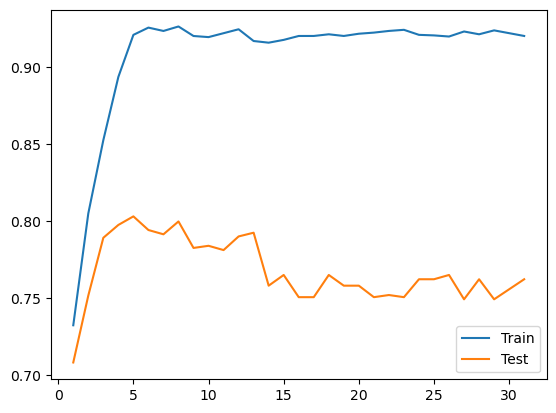

In [97]:
values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=200, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=120, num=25)] # min_samples_leaf
#values = ['friedman_mse', 'squared_error'', 'mse'}] # criterion
#values = [int(x) for x in np.linspace(start = 3, stop = 75, num = 30)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features
#vallues = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)] #learning_rate


train_score_sn = []
test_score_sn = []

for x in values :
    model_gb_tunned = GradientBoostingClassifier(max_depth=x)
    model_gb_tunned.fit(X_smoteenn,y_smoteenn)
    
    # eval on train
    y_pred_train_gb_sn = model_gb_tunned.predict(X_train_scaled)
    train_auc = roc_auc_score(y_train, y_pred_train_gb_sn)
    train_score_sn.append(train_auc)
    
    # eval on test
    y_pred_test_gb_sn = model_gb_tunned.predict(X_test_scaled)
    test_auc = roc_auc_score(y_test, y_pred_test_gb_sn)
    test_score_sn.append(test_auc)
    
    print('max_depth: ' + str(x) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))
    
plt.plot(values, train_score_sn, label='Train')
plt.plot(values, test_score_sn, label='Test')
plt.legend()
plt.show()

`max_depth`: 5; train: 0.9209413821166531; test: 0.8031653746770026

min_samples_split: 2; train: 0.9216665452783644; test: 0.7943152454780361
min_samples_split: 7; train: 0.9191205575839716; test: 0.797093023255814
min_samples_split: 13; train: 0.919845720745683; test: 0.795704134366925
min_samples_split: 19; train: 0.9194752225364243; test: 0.7943152454780361
min_samples_split: 25; train: 0.9183874777938573; test: 0.7840762273901809
min_samples_split: 31; train: 0.9169371514704345; test: 0.812887596899225
min_samples_split: 36; train: 0.9169371514704345; test: 0.811498708010336
min_samples_split: 42; train: 0.9180248962130017; test: 0.7812984496124031
min_samples_split: 48; train: 0.9191126409555685; test: 0.7882428940568476
min_samples_split: 54; train: 0.912940837452619; test: 0.7887596899224807
min_samples_split: 60; train: 0.9151084103093502; test: 0.812887596899225
min_samples_split: 66; train: 0.9100164349205645; test: 0.8087209302325582
min_samples_split: 71; train: 0.9111120962915347; test: 0.8059431524547804
min_samples_split: 77; train: 0.90

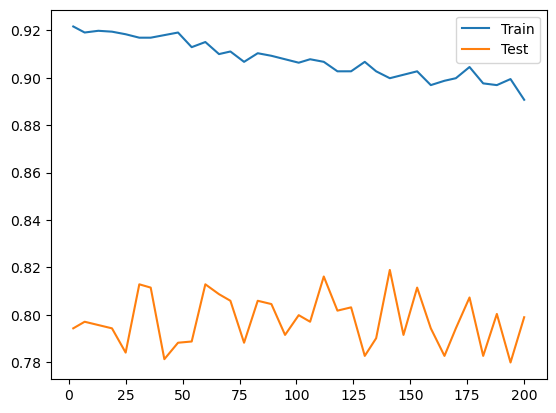

In [98]:
#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
values = [int(x) for x in np.linspace(start=2, stop=200, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=120, num=25)] # min_samples_leaf
#values = ['friedman_mse', 'squared_error'', 'mse'}] # criterion
#values = [int(x) for x in np.linspace(start = 3, stop = 75, num = 30)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features
#vallues = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)] #learning_rate


train_score_sn = []
test_score_sn = []

for x in values :
    model_gb_tunned = GradientBoostingClassifier(max_depth=5,
                                                 random_state=123,
                                                 min_samples_split=x)
    model_gb_tunned.fit(X_smoteenn,y_smoteenn)
    
    # eval on train
    y_pred_train_gb_sn = model_gb_tunned.predict(X_train_scaled)
    train_auc = roc_auc_score(y_train, y_pred_train_gb_sn)
    train_score_sn.append(train_auc)
    
    # eval on test
    y_pred_test_gb_sn = model_gb_tunned.predict(X_test_scaled)
    test_auc = roc_auc_score(y_test, y_pred_test_gb_sn)
    test_score_sn.append(test_auc)
    
    print('min_samples_split: ' + str(x) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))
    
plt.plot(values, train_score_sn, label='Train')
plt.plot(values, test_score_sn, label='Test')
plt.legend()
plt.show()

`min_samples_split`: 141; train: 0.8998404007713963; test: 0.8189599483204135

min_samples_leaf: 1; train: 0.8998404007713963; test: 0.8189599483204135
min_samples_leaf: 5; train: 0.9016533086756746; test: 0.7826873385012919
min_samples_leaf: 10; train: 0.8976569946578592; test: 0.7915374677002583
min_samples_leaf: 15; train: 0.9005655639331077; test: 0.7929263565891472
min_samples_leaf: 20; train: 0.9009281455139633; test: 0.7868540051679587
min_samples_leaf: 25; train: 0.9031036349990975; test: 0.7984819121447029
min_samples_leaf: 30; train: 0.9020158902565304; test: 0.7868540051679587
min_samples_leaf: 35; train: 0.9045618779509232; test: 0.8045542635658915
min_samples_leaf: 40; train: 0.901290727094819; test: 0.7738372093023255
min_samples_leaf: 45; train: 0.8969318314961476; test: 0.8059431524547804
min_samples_leaf: 50; train: 0.8903816131555364; test: 0.795704134366925
min_samples_leaf: 55; train: 0.889656449993825; test: 0.812887596899225
min_samples_leaf: 60; train: 0.8871183789278353; test: 0.8040374677002584
min_samples_leaf: 65; train: 0.8842018930241

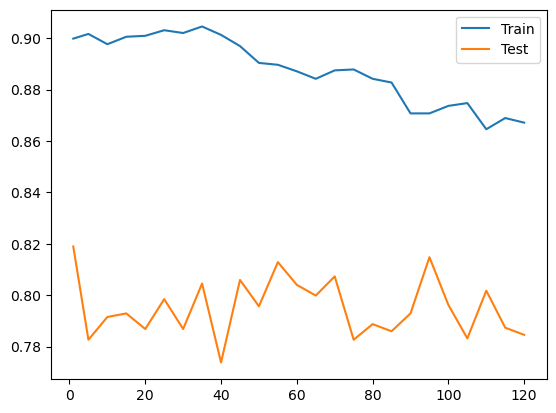

In [99]:
#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=200, num=35)] # min_samples_split
values = [int(x) for x in np.linspace(start=1, stop=120, num=25)] # min_samples_leaf
#values = ['friedman_mse', 'squared_error'', 'mse'}] # criterion
#values = [int(x) for x in np.linspace(start = 3, stop = 75, num = 30)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features
#vallues = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)] #learning_rate


train_score_sn = []
test_score_sn = []

for x in values :
    model_gb_tunned = GradientBoostingClassifier(max_depth=5,
                                                 random_state=123,
                                                 min_samples_split=141,
                                                 min_samples_leaf=x)
    model_gb_tunned.fit(X_smoteenn,y_smoteenn)
    
    # eval on train
    y_pred_train_gb_sn = model_gb_tunned.predict(X_train_scaled)
    train_auc = roc_auc_score(y_train, y_pred_train_gb_sn)
    train_score_sn.append(train_auc)
    
    # eval on test
    y_pred_test_gb_sn = model_gb_tunned.predict(X_test_scaled)
    test_auc = roc_auc_score(y_test, y_pred_test_gb_sn)
    test_score_sn.append(test_auc)
    
    print('min_samples_leaf: ' + str(x) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))
    
plt.plot(values, train_score_sn, label='Train')
plt.plot(values, test_score_sn, label='Test')
plt.legend()
plt.show()

`min_samples_leaf`: 110; train: 0.8645829045159615; test: 0.8017764857881138

n_estimators: 3; train: 0.6591178975968284; test: 0.618766149870801
n_estimators: 6; train: 0.7289615600191266; test: 0.703843669250646
n_estimators: 9; train: 0.7442374861854835; test: 0.6996770025839792
n_estimators: 12; train: 0.7580076696295969; test: 0.7093992248062015
n_estimators: 15; train: 0.7793920662716796; test: 0.742732558139535
n_estimators: 18; train: 0.7804481445006349; test: 0.7519379844961241
n_estimators: 21; train: 0.7949514077348626; test: 0.7583656330749354
n_estimators: 24; train: 0.7971268972199967; test: 0.7597545219638242
n_estimators: 28; train: 0.802920285885285; test: 0.7783268733850129
n_estimators: 31; train: 0.8061676868561802; test: 0.7675710594315246
n_estimators: 34; train: 0.80870575792217; test: 0.7573320413436693
n_estimators: 37; train: 0.8185033772336766; test: 0.7512596899224806
n_estimators: 40; train: 0.818132879024418; test: 0.7656653746770026
n_estimators: 43; train: 0.8203004518811493; test: 0.7684431524547803
n_estimators: 46; train: 0.818

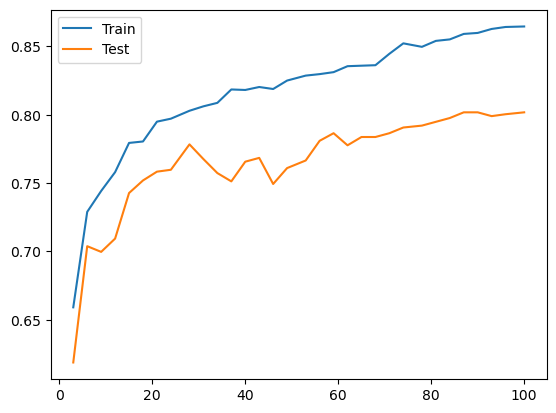

In [103]:
#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=200, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=120, num=25)] # min_samples_leaf
#values = ['friedman_mse', 'squared_error', 'mse'] # criterion
values = [int(x) for x in np.linspace(start = 3, stop = 100, num = 32)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features
#vallues = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)] #learning_rate


train_score_sn = []
test_score_sn = []

for x in values :
    model_gb_tunned = GradientBoostingClassifier(max_depth=5,
                                                 random_state=123,
                                                 min_samples_split=141,
                                                 min_samples_leaf=110,
                                                 criterion='squared_error',
                                                 n_estimators=x)
    model_gb_tunned.fit(X_smoteenn,y_smoteenn)
    
    # eval on train
    y_pred_train_gb_sn = model_gb_tunned.predict(X_train_scaled)
    train_auc = roc_auc_score(y_train, y_pred_train_gb_sn)
    train_score_sn.append(train_auc)
    
    # eval on test
    y_pred_test_gb_sn = model_gb_tunned.predict(X_test_scaled)
    test_auc = roc_auc_score(y_test, y_pred_test_gb_sn)
    test_score_sn.append(test_auc)
    
    print('n_estimators: ' + str(x) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))
    
plt.plot(values, train_score_sn, label='Train')
plt.plot(values, test_score_sn, label='Test')
plt.legend()
plt.show()

`n_estimators`: 87; train: 0.8591362641747232; test: 0.8017764857881138

learning_rate: 0.001; train: 0.5; test: 0.5
learning_rate: 0.006210526315789474; train: 0.7068678334721382; test: 0.6691214470284237
learning_rate: 0.011421052631578946; train: 0.7431497414429163; test: 0.7024547803617571
learning_rate: 0.01663157894736842; train: 0.7619644005053976; test: 0.7316214470284238
learning_rate: 0.021842105263157895; train: 0.7826236339857691; test: 0.7519379844961241
learning_rate: 0.02705263157894737; train: 0.793485248154634; test: 0.7555878552971576
learning_rate: 0.03226315789473684; train: 0.8043626955803047; test: 0.763921188630491
learning_rate: 0.03747368421052632; train: 0.810889164035707; test: 0.7675710594315246
learning_rate: 0.04268421052631579; train: 0.8083194264561054; test: 0.7512596899224806
learning_rate: 0.04789473684210526; train: 0.8170372176534481; test: 0.7540374677002584
learning_rate: 0.05310526315789474; train: 0.8155710580732193; test: 0.7684431524547803
learning_rate: 0.05831578947368421; train: 0.8275600001266661; test: 0.76237

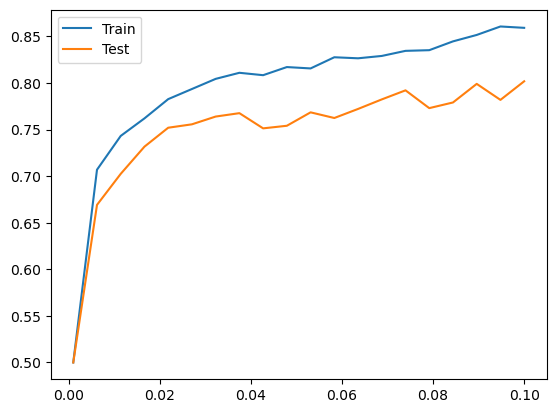

In [105]:
#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=200, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=120, num=25)] # min_samples_leaf
#values = ['friedman_mse', 'squared_error', 'mse'] # criterion
#values = [int(x) for x in np.linspace(start = 3, stop = 100, num = 32)] # n_estimators
values = ['auto', 'sqrt', 'log2'] #max_features
values = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)] #learning_rate


train_score_sn = []
test_score_sn = []

for x in values :
    model_gb_tunned = GradientBoostingClassifier(max_depth=5,
                                                 random_state=123,
                                                 min_samples_split=141,
                                                 min_samples_leaf=110,
                                                 criterion='squared_error',
                                                 n_estimators=87,
                                                 max_features='auto',
                                                 learning_rate=x)
    model_gb_tunned.fit(X_smoteenn,y_smoteenn)
    
    # eval on train
    y_pred_train_gb_sn = model_gb_tunned.predict(X_train_scaled)
    train_auc = roc_auc_score(y_train, y_pred_train_gb_sn)
    train_score_sn.append(train_auc)
    
    # eval on test
    y_pred_test_gb_sn = model_gb_tunned.predict(X_test_scaled)
    test_auc = roc_auc_score(y_test, y_pred_test_gb_sn)
    test_score_sn.append(test_auc)
    
    print('learning_rate: ' + str(x) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))
    
plt.plot(values, train_score_sn, label='Train')
plt.plot(values, test_score_sn, label='Test')
plt.legend()
plt.show()

`learning_rate`: 0.1; train: 0.8591362641747232; test: 0.8017764857881138

In [106]:
model_gb_tunned = GradientBoostingClassifier(max_depth=5,
                                                 random_state=123,
                                                 min_samples_split=141,
                                                 min_samples_leaf=110,
                                                 criterion='squared_error',
                                                 n_estimators=87,
                                                 max_features='auto',
                                                 learning_rate=0.1)

model_gb_tunned.fit(X_smoteenn,y_smoteenn)
    
# eval on train
y_pred_train_gb_sn = model_gb_tunned.predict(X_train_scaled)
train_auc_gb_sn = roc_auc_score(y_train, y_pred_train_gb_sn)

    
# eval on test
y_pred_test_gb_sn = model_gb_tunned.predict(X_test_scaled)
test_auc_gb_sn = roc_auc_score(y_test, y_pred_test_gb_sn)


print('train auc: ', train_auc_gb_sn)
print('test auc: ', test_auc_gb_sn)  

train auc:  0.8591362641747232
test auc:  0.8017764857881138


### XGBClassifier

[23:31:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
max_depth: 1; train: 0.7905212624805648; test: 0.7861434108527131
[23:31:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
max_depth: 2; train: 0.8623915817740214; test: 0.8180878552971577
[23:31:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

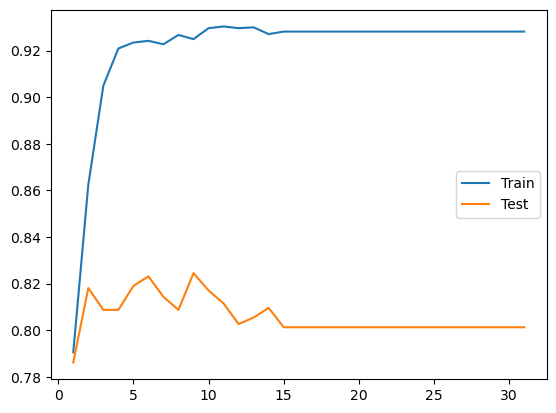

In [107]:
values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=200, num=35)] # min_child_weight
#values = [float(x) for x in np.linspace(start=0, stop=1, num=25)] # gamma
#values = ['auto', 'exact', 'approx', 'hist'] # tree_method
#values = [float(x) for x in np.linspace(start = 0, stop = 1, num = 30)] # colsample_bytree
#values = [float(x) for x in np.linspace(0, 1, num = 100)] #eta
#values = [float(x) for x in np.linspace(0, 1, num = 100)] #lambda
#values = [float(x) for x in np.linspace(0, 1, num = 100)] #alpha

train_score_sn = []
test_score_sn = []

for x in values :
    model_xg_tunned = XGBClassifier(max_depth=x,
                                    random_state=123)
    model_xg_tunned.fit(X_smoteenn,y_smoteenn)
    
    # eval on train
    y_pred_train_xg_sn = model_xg_tunned.predict(X_train_scaled)
    train_auc = roc_auc_score(y_train, y_pred_train_xg_sn)
    train_score_sn.append(train_auc)
    
    # eval on test
    y_pred_test_xg_sn = model_xg_tunned.predict(X_test_scaled)
    test_auc = roc_auc_score(y_test, y_pred_test_xg_sn)
    test_score_sn.append(test_auc)
    
    print('max_depth: ' + str(x) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))
    
plt.plot(values, train_score_sn, label='Train')
plt.plot(values, test_score_sn, label='Test')
plt.legend()
plt.show()

`max_depth`: 2; train: 0.8623915817740214; test: 0.8180878552971577


[23:33:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
min_child_weight: 2; train: 0.8482113169786346; test: 0.8106266149870801
[23:33:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
min_child_weight: 7; train: 0.8482192336070377; test: 0.7845930232558139
[23:33:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed 

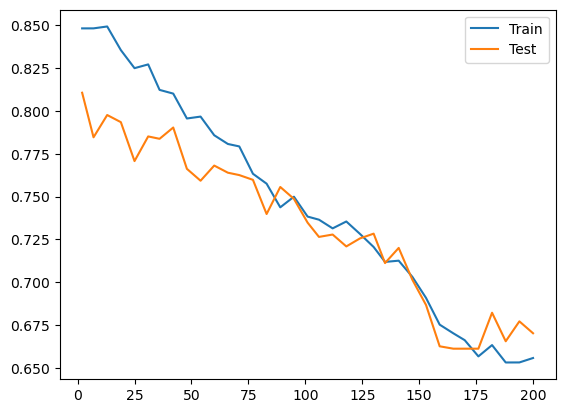

In [108]:
#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
values = [int(x) for x in np.linspace(start=2, stop=200, num=35)] # min_child_weight
#values = [float(x) for x in np.linspace(start=0, stop=1, num=25)] # gamma
#values = ['auto', 'exact', 'approx', 'hist'] # tree_method
#values = [float(x) for x in np.linspace(start = 0, stop = 1, num = 30)] # colsample_bytree
#values = [float(x) for x in np.linspace(0, 1, num = 100)] #eta
#values = [float(x) for x in np.linspace(0, 1, num = 100)] #lambda
#values = [float(x) for x in np.linspace(0, 1, num = 100)] #alpha

train_score_sn = []
test_score_sn = []

for x in values :
    model_xg_tunned = XGBClassifier(max_depth=2,
                                    random_state=123,
                                    min_child_weight=x)
    model_xg_tunned.fit(X_smoteenn,y_smoteenn)
    
    # eval on train
    y_pred_train_xg_sn = model_xg_tunned.predict(X_train_scaled)
    train_auc = roc_auc_score(y_train, y_pred_train_xg_sn)
    train_score_sn.append(train_auc)
    
    # eval on test
    y_pred_test_xg_sn = model_xg_tunned.predict(X_test_scaled)
    test_auc = roc_auc_score(y_test, y_pred_test_xg_sn)
    test_score_sn.append(test_auc)
    
    print('min_child_weight: ' + str(x) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))
    
plt.plot(values, train_score_sn, label='Train')
plt.plot(values, test_score_sn, label='Test')
plt.legend()
plt.show()

`min_child_weight`: 2; train: 0.8482113169786346; test: 0.8106266149870801


[23:34:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
gamma: 0.0; train: 0.8482113169786346; test: 0.8106266149870801
[23:34:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
gamma: 0.041666666666666664; train: 0.8482113169786346; test: 0.8106266149870801
[23:34:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed f

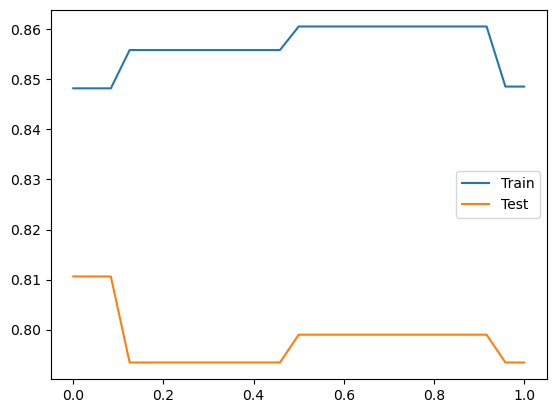

In [109]:
#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=200, num=35)] # min_child_weight
values = [float(x) for x in np.linspace(start=0, stop=1, num=25)] # gamma
#values = ['auto', 'exact', 'approx', 'hist'] # tree_method
#values = [float(x) for x in np.linspace(start = 0, stop = 1, num = 30)] # colsample_bytree
#values = [float(x) for x in np.linspace(0, 1, num = 100)] #eta
#values = [float(x) for x in np.linspace(0, 1, num = 100)] #lambda
#values = [float(x) for x in np.linspace(0, 1, num = 100)] #alpha

train_score_sn = []
test_score_sn = []

for x in values :
    model_xg_tunned = XGBClassifier(max_depth=2,
                                    random_state=123,
                                    min_child_weight=2,
                                    gamma=x)
    model_xg_tunned.fit(X_smoteenn,y_smoteenn)
    
    # eval on train
    y_pred_train_xg_sn = model_xg_tunned.predict(X_train_scaled)
    train_auc = roc_auc_score(y_train, y_pred_train_xg_sn)
    train_score_sn.append(train_auc)
    
    # eval on test
    y_pred_test_xg_sn = model_xg_tunned.predict(X_test_scaled)
    test_auc = roc_auc_score(y_test, y_pred_test_xg_sn)
    test_score_sn.append(test_auc)
    
    print('gamma: ' + str(x) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))
    
plt.plot(values, train_score_sn, label='Train')
plt.plot(values, test_score_sn, label='Test')
plt.legend()
plt.show()

`gamma`: 0.041666666666666664; train: 0.8482113169786346; test: 0.8106266149870801


[23:35:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
tree_method: auto; train: 0.8482113169786346; test: 0.8106266149870801
[23:35:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
tree_method: exact; train: 0.8482113169786346; test: 0.8106266149870801
[23:35:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed fro

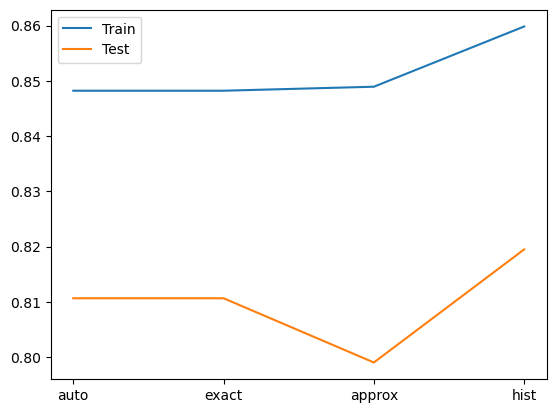

In [110]:
#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=200, num=35)] # min_child_weight
#values = [float(x) for x in np.linspace(start=0, stop=1, num=25)] # gamma
values = ['auto', 'exact', 'approx', 'hist'] # tree_method
#values = [float(x) for x in np.linspace(start = 0, stop = 1, num = 30)] # colsample_bytree
#values = [float(x) for x in np.linspace(0, 1, num = 100)] #eta
#values = [float(x) for x in np.linspace(0, 1, num = 100)] #lambda
#values = [float(x) for x in np.linspace(0, 1, num = 100)] #alpha

train_score_sn = []
test_score_sn = []

for x in values :
    model_xg_tunned = XGBClassifier(max_depth=2,
                                    random_state=123,
                                    min_child_weight=2,
                                    gamma=0.041666666666666664,
                                    tree_method=x)
    model_xg_tunned.fit(X_smoteenn,y_smoteenn)
    
    # eval on train
    y_pred_train_xg_sn = model_xg_tunned.predict(X_train_scaled)
    train_auc = roc_auc_score(y_train, y_pred_train_xg_sn)
    train_score_sn.append(train_auc)
    
    # eval on test
    y_pred_test_xg_sn = model_xg_tunned.predict(X_test_scaled)
    test_auc = roc_auc_score(y_test, y_pred_test_xg_sn)
    test_score_sn.append(test_auc)
    
    print('tree_method: ' + str(x) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))
    
plt.plot(values, train_score_sn, label='Train')
plt.plot(values, test_score_sn, label='Test')
plt.legend()
plt.show()

`tree_method`: hist; train: 0.8598455940796286; test: 0.8194767441860465


[23:36:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
colsample_bytree: 0.0; train: 0.79766997792844; test: 0.7892764857881137
[23:36:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
colsample_bytree: 0.034482758620689655; train: 0.79766997792844; test: 0.7892764857881137
[23:36:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logis

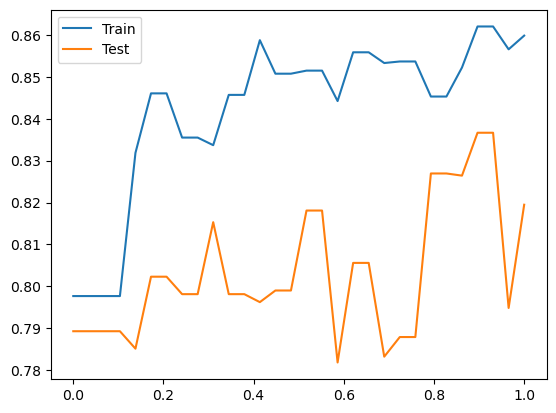

In [111]:
#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=200, num=35)] # min_child_weight
#values = [float(x) for x in np.linspace(start=0, stop=1, num=25)] # gamma
#values = ['auto', 'exact', 'approx', 'hist'] # tree_method
values = [float(x) for x in np.linspace(start = 0, stop = 1, num = 30)] # colsample_bytree
#values = [float(x) for x in np.linspace(0, 1, num = 100)] #eta
#values = [float(x) for x in np.linspace(0, 1, num = 100)] #lambda
#values = [float(x) for x in np.linspace(0, 1, num = 100)] #alpha

train_score_sn = []
test_score_sn = []

for x in values :
    model_xg_tunned = XGBClassifier(max_depth=2,
                                    random_state=123,
                                    min_child_weight=2,
                                    gamma=0.041666666666666664,
                                    tree_method='hist',
                                    colsample_bytree=x)
    model_xg_tunned.fit(X_smoteenn,y_smoteenn)
    
    # eval on train
    y_pred_train_xg_sn = model_xg_tunned.predict(X_train_scaled)
    train_auc = roc_auc_score(y_train, y_pred_train_xg_sn)
    train_score_sn.append(train_auc)
    
    # eval on test
    y_pred_test_xg_sn = model_xg_tunned.predict(X_test_scaled)
    test_auc = roc_auc_score(y_test, y_pred_test_xg_sn)
    test_score_sn.append(test_auc)
    
    print('colsample_bytree: ' + str(x) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))
    
plt.plot(values, train_score_sn, label='Train')
plt.plot(values, test_score_sn, label='Test')
plt.legend()
plt.show()

`colsample_bytree`: 0.896551724137931; train: 0.8620290001931658; test: 0.8366602067183463


[23:38:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
alpha: 0.0; train: 0.8620290001931658; test: 0.8366602067183463
[23:38:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
alpha: 0.010101010101010102; train: 0.8620290001931658; test: 0.8366602067183463
[23:38:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed f

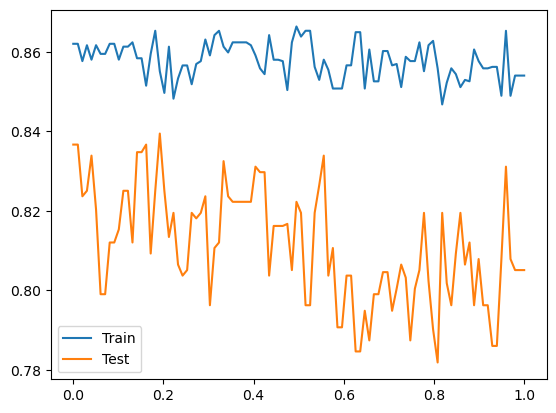

In [114]:
#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=200, num=35)] # min_child_weight
#values = [float(x) for x in np.linspace(start=0, stop=1, num=25)] # gamma
#values = ['auto', 'exact', 'approx', 'hist'] # tree_method
#values = [float(x) for x in np.linspace(start = 0, stop = 1, num = 30)] # colsample_bytree
#values = [float(x) for x in np.linspace(0, 1, num = 100)] #eta
#values = [float(x) for x in np.linspace(0, 1, num = 100)] #lambda
values = [float(x) for x in np.linspace(0, 1, num = 100)] #alpha

train_score_sn = []
test_score_sn = []

for x in values :
    model_xg_tunned = XGBClassifier(max_depth=2,
                                    random_state=123,
                                    min_child_weight=2,
                                    gamma=0.041666666666666664,
                                    tree_method='hist',
                                    colsample_bytree=0.896551724137931,
                                    alpha=x)
    model_xg_tunned.fit(X_smoteenn,y_smoteenn)
    
    # eval on train
    y_pred_train_xg_sn = model_xg_tunned.predict(X_train_scaled)
    train_auc = roc_auc_score(y_train, y_pred_train_xg_sn)
    train_score_sn.append(train_auc)
    
    # eval on test
    y_pred_test_xg_sn = model_xg_tunned.predict(X_test_scaled)
    test_auc = roc_auc_score(y_test, y_pred_test_xg_sn)
    test_score_sn.append(test_auc)
    
    print('alpha: ' + str(x) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))
    
plt.plot(values, train_score_sn, label='Train')
plt.plot(values, test_score_sn, label='Test')
plt.legend()
plt.show()

`alpha`: 0.20202020202020204; train: 0.8496695599304604; test: 0.8250322997416022

In [29]:
model_xg_tunned = XGBClassifier(max_depth=2,
                                    random_state=123,
                                    min_child_weight=2,
                                    gamma=0.041666666666666664,
                                    tree_method='hist',
                                    colsample_bytree=0.896551724137931,
                                    alpha=0.20202020202020204
                                    )

model_xg_tunned.fit(X_smoteenn,y_smoteenn)
    
# eval on train
y_pred_train_xg_sn = model_xg_tunned.predict(X_train_scaled)
train_auc_xg_sn = roc_auc_score(y_train, y_pred_train_xg_sn)

# eval on test
y_pred_test_xg_sn = model_xg_tunned.predict(X_test_scaled)
test_auc_xg_sn = roc_auc_score(y_test, y_pred_test_xg_sn)
   
print('Train XG AUC: ', train_auc_xg_sn)
print('Test XG AUC: ', test_auc_xg_sn)

[09:31:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train XG AUC:  0.8496695599304604
Test XG AUC:  0.8250322997416022


## Summary

In [118]:
abcd = [['Logistic Regression SMOTE-NC', roc_auc_score(y_train, y_train_pred_lr), roc_auc_score(y_test, y_test_pred_lr)],
        ['Decision Tree SMOTE-NC', roc_auc_score(y_train, y_train_pred_dt), roc_auc_score(y_test, y_test_pred_dt)],
        ['Random Forest SMOTE-NC', train_auc_rf_sm, test_auc_rf_sm],
        ['AdaBoost Classifier SMOTE-NC', train_auc_ab, test_auc_ab],
        ['Gradient Boosting Classifier SMOTE-NC', train_auc_gb, test_auc_gb],
        ['XGBClassifier SMOTE-NC', train_auc_xg, test_auc_xg],
        ['Logistic Regression SMOTEENN', roc_auc_score(y_train, y_train_pred_lr_sn), roc_auc_score(y_test, y_test_pred_lr_sn)],
        ['Random Forest SMOTEENN', train_auc_sn_rf, test_score_sn_rf],
        ['Gradient Boosting SMOTEENN', train_auc_gb_sn, test_auc_gb_sn],
        ['XGB SMOTEENN', train_auc_xg_sn, test_auc_xg_sn]]



df_score = pd.DataFrame(abcd,columns=['Model', 'Train AUC', 'Test AUC'],dtype=float)
df_score

Model  Train AUC  Test AUC
0           Logistic Regression SMOTE-NC   0.760071  0.781654
1                 Decision Tree SMOTE-NC   0.823681  0.737565
2                 Random Forest SMOTE-NC   0.801066  0.802487
3           AdaBoost Classifier SMOTE-NC   0.748357  0.750420
4  Gradient Boosting Classifier SMOTE-NC   0.803604  0.828521
5                 XGBClassifier SMOTE-NC   0.970898  0.755975
6           Logistic Regression SMOTEENN   0.773504  0.786305
7                 Random Forest SMOTEENN   0.823564  0.801938
8             Gradient Boosting SMOTEENN   0.859136  0.801776
9                           XGB SMOTEENN   0.849670  0.825032

We will use `XGB SMOTEENN` <br> 
model = `model_xg_tunned` <br>
- Train AUC = 0.849670
- Test AUC = 0.825032 <br>

In [120]:
# eval on train
y_pred_train_xg_sn = model_xg_tunned.predict(X_train_scaled)
train_auc_xg_sn = roc_auc_score(y_train, y_pred_train_xg_sn)

# eval on test
y_pred_test_xg_sn = model_xg_tunned.predict(X_test_scaled)
test_auc_xg_sn = roc_auc_score(y_test, y_pred_test_xg_sn)

print('TRAINING RESULT:')
print('======================================================')
print('AUC Score:', np.round(roc_auc_score(y_train, y_pred_train_xg_sn),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_train, y_pred_train_xg_sn))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_train, y_pred_train_xg_sn))

print('\n======================================================')

print('\nTESTING RESULT:')
print('======================================================')
print('AUC Score:', np.round(roc_auc_score(y_test, y_pred_test_xg_sn),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_pred_test_xg_sn))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, y_pred_test_xg_sn))

TRAINING RESULT:
AUC Score: 0.85
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      1379
           1       0.45      0.88      0.59       229

    accuracy                           0.83      1608
   macro avg       0.71      0.85      0.74      1608
weighted avg       0.90      0.83      0.85      1608

Confussion Matrix ------------------------------------
[[1133  246]
 [  28  201]]


TESTING RESULT:
AUC Score: 0.825
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.97      0.84      0.90       360
           1       0.37      0.81      0.51        43

    accuracy                           0.83       403
   macro avg       0.67      0.83      0.71       403
weighted avg       0.91      0.83      0.86       403

Confussion Matrix ------------------------------------
[[301  59]
 [  8  35]]


<AxesSubplot:>

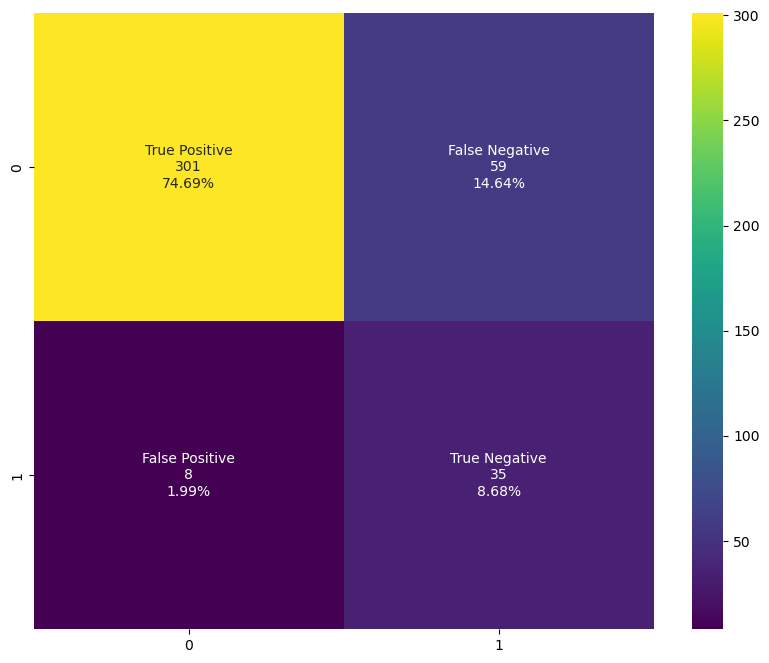

In [33]:
cf_matrix = confusion_matrix(y_test, y_pred_test_xg_sn)

group_names = ["True Positive", "False Negative", "False Positive", "True Negative"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10, 8))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='viridis')

## Feature Importance

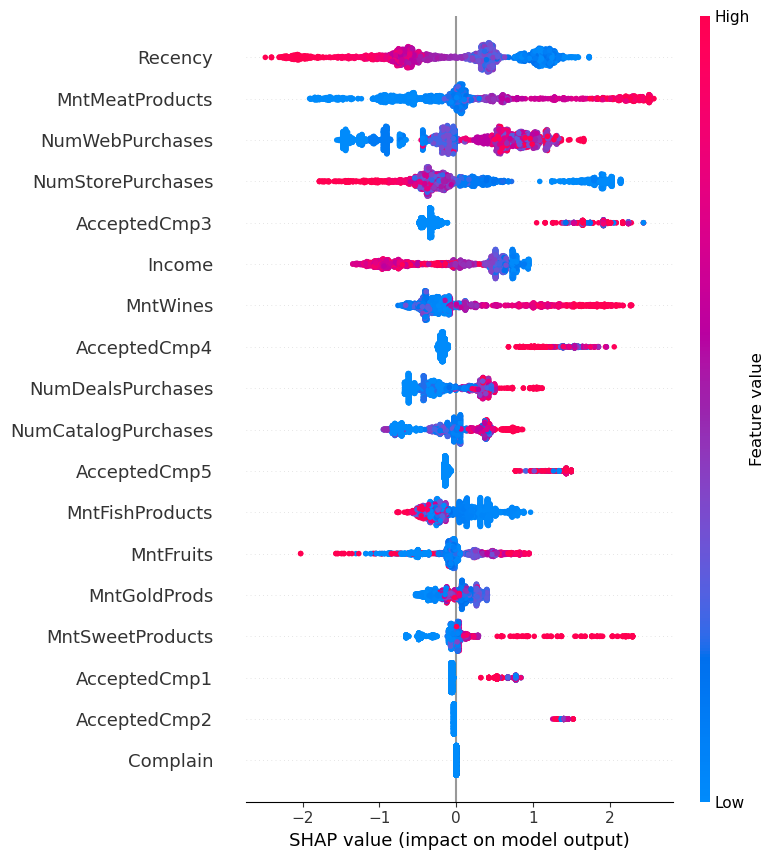

In [121]:
import shap
explainer = shap.TreeExplainer(model_xg_tunned)
shap_values = explainer.shap_values(X_smoteenn)
shap.summary_plot(shap_values, X_smoteenn)

## RFM

In [53]:
rfm = df[['Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]
rfm.head()

Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
1        0       464          5               64                7   
2        0       134         11               59               15   
3        0        10          0                1                0   
4        0         6         16               24               11   
6        0       769         80              252               15   

   MntSweetProducts  MntGoldProds  NumWebPurchases  NumCatalogPurchases  \
1                 0            37                7                    3   
2                 2            30                3                    2   
3                 0             0                1                    0   
4                 0            34                3                    1   
6                34            65               10                   10   

   NumStorePurchases  
1                  7  
2                  5  
3                  2  
4                  2  
6                  7

- Avg `MntWines` = $15.36 Source: [Here](https://www.vivino.com/wine-news/how-much-does-a-good-bottle-of-wine-cost)

- Avg `MntFruits` = $2.6 Source: [Here](https://www.statista.com/statistics/643582/average-unit-price-candy-and-chocolate-us-by-segment/)

- Avg `MntMeatProducts` = $7 Source: [Here](https://www.statista.com/statistics/643582/average-unit-price-candy-and-chocolate-us-by-segment/)

- Avg `MntFishProducts` = $12 Source: [Here](https://www.statista.com/statistics/643582/average-unit-price-candy-and-chocolate-us-by-segment/)

- Avg `MntSweetProducts` = $4 Source: [Here](https://www.statista.com/statistics/643582/average-unit-price-candy-and-chocolate-us-by-segment/)

- Avg `MntGoldProds` = $58.93 Source: [Here](https://harga-emas.org/)

In [56]:
rfm['Monetary'] = rfm['MntWines']*15.36 + rfm['MntFruits']*2.6 + rfm['MntMeatProducts']*7 + rfm['MntFishProducts']*12 + rfm['MntSweetProducts']*4 + rfm['MntGoldProds']*58.93
rfm['Frequency'] = rfm['NumWebPurchases'] + rfm['NumCatalogPurchases'] + rfm['NumStorePurchases']
RFM = rfm[['Recency', 'Monetary', 'Frequency']]

In [57]:
RFM.head()

Recency  Monetary  Frequency
1        0   9852.45         17
2        0   4455.74         10
3        0    160.60          3
4        0   2437.38          6
6        0  17930.29         27

### Feature Standardisation

In [59]:
from sklearn.preprocessing import StandardScaler

sc_data = StandardScaler()
data_std = sc_data.fit_transform(RFM)

In [74]:
data_std = pd.DataFrame(data_std, columns=RFM.columns)
data_std.head()

Recency  Monetary  Frequency
0 -1.692423  0.264299   0.735921
1 -1.692423 -0.437971  -0.257802
2 -1.692423 -0.996895  -1.251524
3 -1.692423 -0.700619  -0.825643
4 -1.692423  1.315463   2.155524

### Clustering K-Means

<AxesSubplot:>

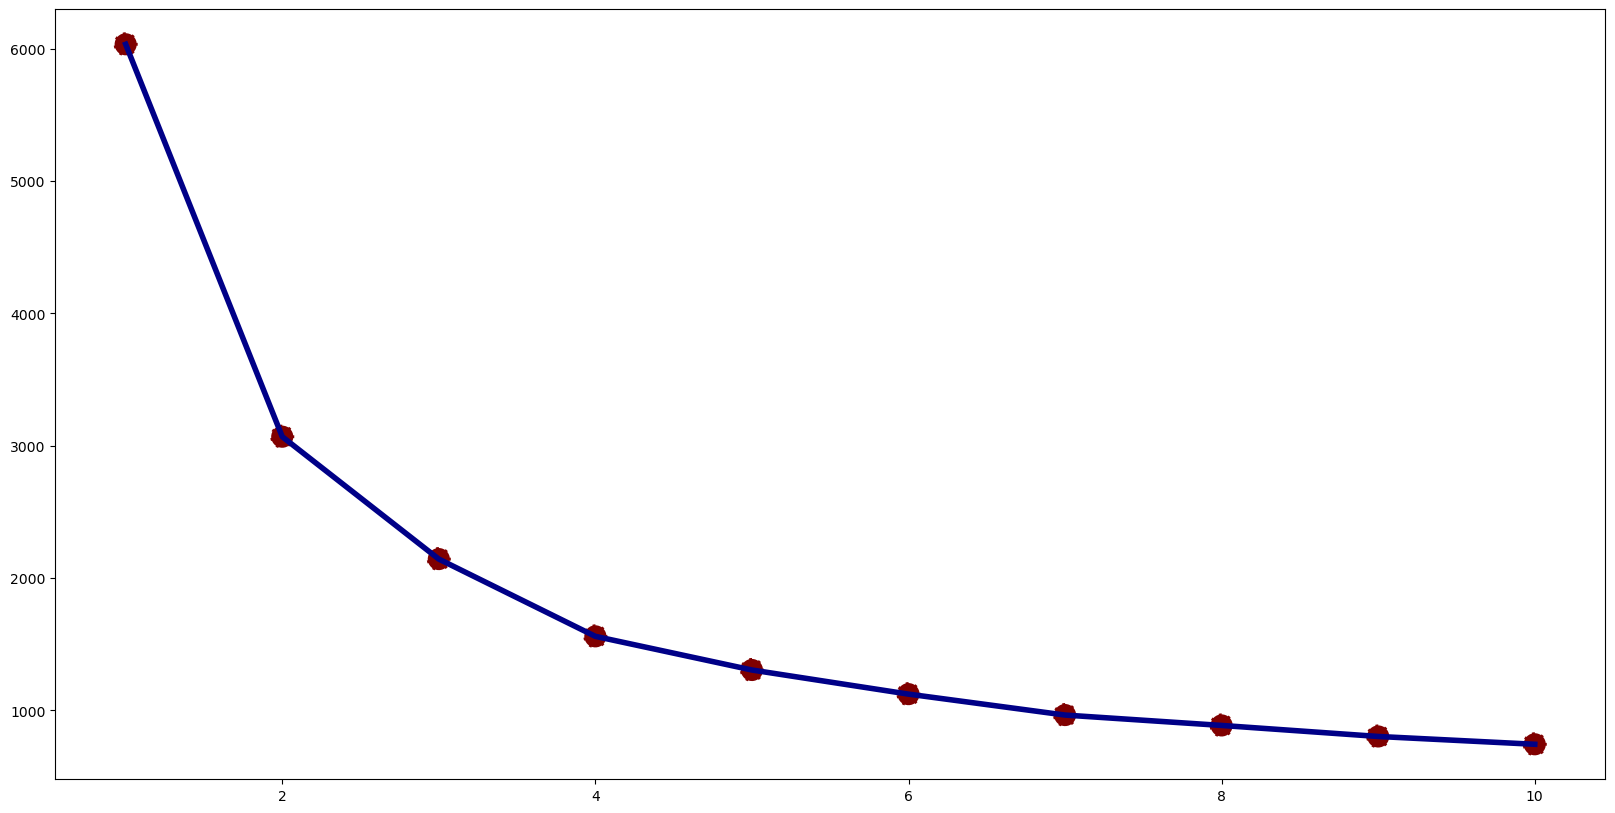

In [61]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=123)
    kmeans.fit(data_std)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(20, 10))

# plt.plot(inertia)
sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')

Case: Eventho Elbow method showed the best cluster is 2, but our business stakeholder assign data scientist team to make 3 cluster

In [96]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0)

# fit model 
kc = kmeans.fit(data_std.values)
cluster_labels = kc.labels_

# add cluster
data_cluster = data_std.assign(K_Cluster = cluster_labels)
data_cluster.head()

Recency  Monetary  Frequency  K_Cluster
0 -1.692423  0.264299   0.735921          0
1 -1.692423 -0.437971  -0.257802          0
2 -1.692423 -0.996895  -1.251524          0
3 -1.692423 -0.700619  -0.825643          0
4 -1.692423  1.315463   2.155524          2

In [97]:
# add label to 'data' dataframe
data_label = RFM.assign(K_Cluster = cluster_labels)
data_label.head()

Recency  Monetary  Frequency  K_Cluster
1        0   9852.45         17          0
2        0   4455.74         10          0
3        0    160.60          3          0
4        0   2437.38          6          0
6        0  17930.29         27          2

In [98]:
df['Monetary'] = df['MntWines']*15.36 + df['MntFruits']*2.6 + df['MntMeatProducts']*7 + df['MntFishProducts']*12 + df['MntSweetProducts']*4 + df['MntGoldProds']*58.93
df['Frequency'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df = df.assign(K_Cluster = cluster_labels)
df.head()

ID  Education  Marital_Status     Income  Kidhome  Teenhome  Recency  \
1      1          1               0  5709100.0        0         0        0   
2  10476          1               1  6726700.0        0         1        0   
3   1386          1               1  3247400.0        1         1        0   
4   5371          1               0  2147400.0        1         0        0   
6   4073          2               1  6356400.0        0         0        0   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
1       464          5               64                7                 0   
2       134         11               59               15                 2   
3        10          0                1                0                 0   
4         6         16               24               11                 0   
6       769         80              252               15                34   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
1            37                  1                7                    3   
2            30                  1                3                    2   
3             0                  1                1                    0   
4            34                  2                3                    1   
6            65                  1               10                   10   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
1                  7                  5             0             0   
2                  5                  2             0             0   
3                  2                  7             0             0   
4                  2                  7             1             0   
6                  7                  6             1             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Complain   Age  \
1             0             0             1         1         0  60.0   
2             0             0             0         0         0  63.0   
3             0             0             0         0         0  54.0   
4             0             0             0         1         0  32.0   
6             0             0             0         1         0  67.0   

   Cust_Tenure  Registered_on_weekend  Country_AUS  Country_CA  Country_GER  \
1          7.0                      1            0           1            0   
2          7.0                      0            0           0            0   
3          7.0                      1            1           0            0   
4          7.0                      0            0           0            0   
6          7.0                      0            0           0            1   

   Country_IND  Country_ME  Country_SA  Country_SP  Country_US  \
1            0           0           0           0           0   
2            0           0           0           0           1   
3            0           0           0           0           0   
4            0           0           0           1           0   
6            0           0           0           0           0   

   Month_Registered_April  Month_Registered_August  Month_Registered_December  \
1                       0                        0                          0   
2                       0                        0                          0   
3                       0                        0                          0   
4                       1                        0                          0   
6                       0                        0                          0   

   Month_Registered_February  Month_Registered_January  Month_Registered_July  \
1                          0                         0                      0   
2                          0                         0                      0   
3                          0                         0                      0   
4                          0                         0        

### Cluster Distribution Analysis

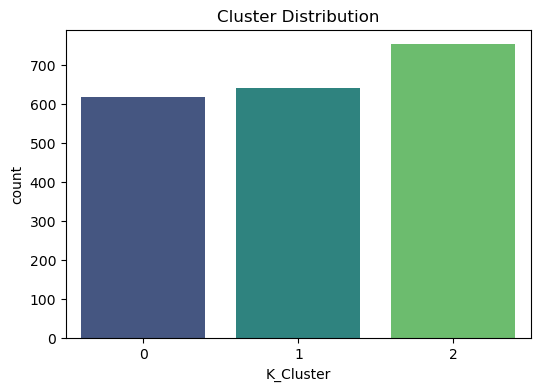

In [99]:
plt.figure(figsize=(6,4))
pl = sns.countplot(x = data_label['K_Cluster'], palette='viridis')
pl.set_title('Cluster Distribution')
plt.show()

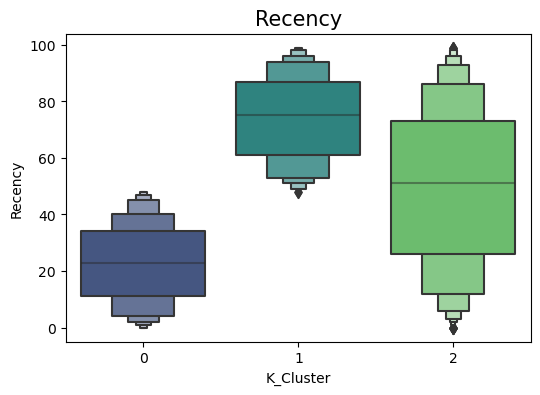

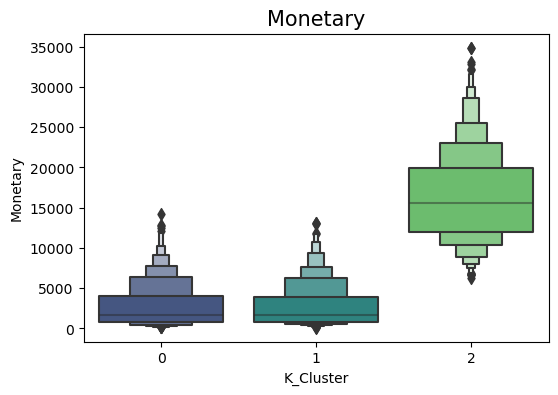

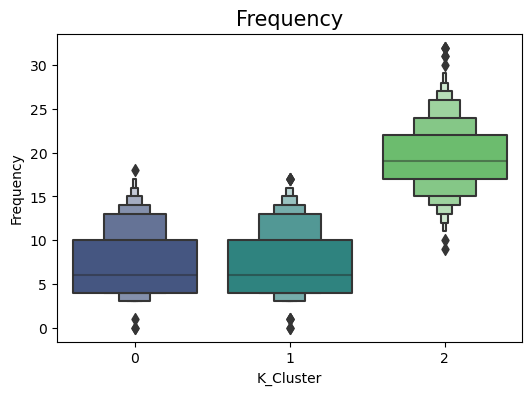

In [100]:
for i in data_label.columns[:-1]:
    plt.figure(figsize=(6,4))
    pl = sns.boxenplot(x = data_label['K_Cluster'], y = data_label[i], palette='viridis')
    pl.set_title(i, fontsize=15)
plt.show()

In [101]:
# find average RFM each cluster
data_label.groupby('K_Cluster').mean()

Recency      Monetary  Frequency
K_Cluster                                    
0          22.648298   2738.615300   7.236629
1          73.936037   2723.630016   7.198128
2          49.634794  16325.716799  19.499336

## Business Simulation

In [124]:
simulation_features = ['Income', 'MntWines', 'MntMeatProducts', 'MntGoldProds',
                       'MntFishProducts', 'MntFruits', 'MntSweetProducts', 'Recency',
                       'NumCatalogPurchases', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp3',
                       'NumWebPurchases', 'AcceptedCmp4', 'AcceptedCmp2', 'NumDealsPurchases',
                       'NumStorePurchases', 'Complain']

In [164]:
# Create Simulation Function

def simulation(feature):
    # Define TP FN FP TN var
    tp, fn, fp, tn = cf_matrix.flatten()

    # Create Simulation Data
    df_response = df[df.Response == 1][simulation_features]
    df_not_response = df[df.Response == 0][simulation_features]
  
    cr_list = []
  
    # Create Improvement Experiments
    experiments = np.arange(-1,1.05,0.05)
    experiments[20] = 0
    
    for i in experiments:
        df_simulation = pd.concat([df_response.sample(int(np.ceil(0.1*df_response.shape[0])), random_state=123), df_not_response.sample(int(np.ceil(0.1*df_not_response.shape[0])), random_state=123)]).reset_index(drop=True)
        df_simulation[feature] = df_simulation[feature]*(1+i) # ini feature yg di experiment dikalikan dengan treatment
    
        # Feature Scaling
        temp = X_test[simulation_features].reset_index(drop=True)[:224].copy()
        temp[simulation_features] = df_simulation
        scaler = RobustScaler()
        scaler.fit(X_train)
        df_simulation = scaler.transform(temp)
        df_simulation = pd.DataFrame(df_simulation, columns=X_smoteenn.columns)
        df_simulation = df_simulation[simulation_features]
    
        # Predict Simulation Values
        simulation_pred = model_xg_tunned.predict(df_simulation)

        # Adjust Predicted Value to Actual Value
        simulation_pred_pos = simulation_pred[simulation_pred==0]
        simulation_pred_pos[:(int(np.ceil((fp/(fp+tp))*(simulation_pred[simulation_pred==0].size))))] = 1
        simulation_pred_pos
        simulation_pred_neg = simulation_pred[simulation_pred==1]
        simulation_pred_neg[:(int(np.ceil((fn/(fn+tn))*(simulation_pred[simulation_pred==1].size))))] = 0
        simulation_pred_neg
        simulation_pred = np.concatenate((simulation_pred_neg, simulation_pred_pos))
    
        # Calculate Simulation Conversion Rate
        cr = simulation_pred[simulation_pred==1].size/simulation_pred.size
        cr_list.append(cr)
    
    # Create CR Plot
    # print(cr_list)
    plt.plot(experiments, cr_list, marker='o', linewidth=1)
    plt.ylabel('Conversion Rate')
    plt.xlabel(str(feature) + ' Increased')
    plt.title('Conversion Rate Increased by ' + str(feature))
    plt.axvline(linewidth=1, color='r', label = 'Current Condition')
    plt.legend()
    plt.show()

### Improving Conversion Rate by  Target and Give Special Treatment Only for Customers who have low recency

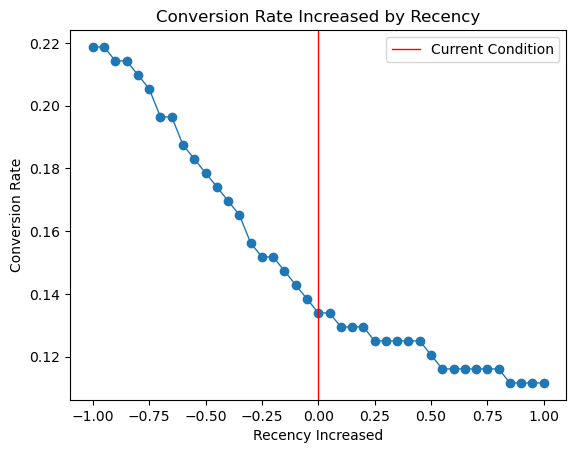

In [170]:
simulation('Recency')

In [26]:
X['Recency'].mean()

49.10094480358031

In [27]:
# average recency decreasing by 20%
X['Recency'].mean() - X['Recency'].mean()*20/100

39.28075584286425

Assumption, there is a decrease in average Recency from last year to the current year by 20% which is caused by other factors. Assuming the company continues to grow and has additional new customers, we target customers in cluster 0 which has the lowest recency

In [171]:
# Case
# We want to run new campaign using existing customers (Re-Targeting) for next year <br>

# Define TP FN FP TN var
tp, fn, fp, tn = cf_matrix.flatten()
    
# Create Simulation Data
df_response = df[df.Response == 1][simulation_features]
df_not_response = df[df.Response == 0][simulation_features]

# Create Improvement Experiments
df_simulation = df_simulation = pd.concat([df_response.sample(int(np.ceil(0.1*df_response.shape[0])), random_state=123), df_not_response.sample(int(np.ceil(0.1*df_not_response.shape[0])), random_state=123)]).reset_index(drop=True)
df_simulation['Recency'] = df_simulation['Recency']*0.80



# Feature Scaling
temp = X_test[simulation_features].reset_index(drop=True)[:224].copy()
temp[simulation_features] = df_simulation
scaler = RobustScaler()
scaler.fit(X_train)
df_simulation = scaler.transform(temp)
df_simulation = pd.DataFrame(df_simulation, columns=X_smoteenn.columns)
df_simulation = df_simulation[simulation_features]
    
# Predict Simulation Values
simulation_pred = model_xg_tunned.predict(df_simulation)
    
# Adjust Predicted Value to Actual Value
simulation_pred_pos = simulation_pred[simulation_pred==0]
simulation_pred_pos[:(int(np.ceil((fp/(fp+tp))*(simulation_pred[simulation_pred==0].size))))] = 1
simulation_pred_pos
simulation_pred_neg = simulation_pred[simulation_pred==1]
simulation_pred_neg[:(int(np.ceil((fn/(fn+tn))*(simulation_pred[simulation_pred==1].size))))] = 0
simulation_pred_neg
simulation_pred = np.concatenate((simulation_pred_neg, simulation_pred_pos))

#Assumption
Current_CR = 13.52 #%
AOV = 7821.4 #USD
Num_Customers = 2011 #(All Customers in Database will be retargeted)
tp, fn, fp, tn = cf_matrix.flatten()/Num_Customers
treatment_eff_rate = 0.1
treatment_cost = 0.1 * (df['Monetary'].mean()) #10% Discount

# Current Condition
current_cr = df['Response'].value_counts()[1]/df['Response'].shape[0]
current_revenue = current_cr * (df['Monetary'].mean()) * Num_Customers #AOV

# Print
print(f'Current Conversion Rate = {current_cr *100:.2f}%')
print(f'Current Revenue = ${current_revenue:.0f}\n')

new_cr = simulation_pred[simulation_pred==1].size/simulation_pred.size

simulation_cr = new_cr + (treatment_eff_rate * tn)
simulation_revenue_bc = simulation_cr * (df['Monetary'].mean()) * Num_Customers
simulation_cost = ((treatment_eff_rate * tn) + fn) * treatment_cost * Num_Customers
simulation_revenue = simulation_revenue_bc - simulation_cost

print(f'Simulation Conversion Rate After Targeting Cluster 0 With 10% Discount  = {simulation_cr *100:.2f}%')
print(f'Simulation Revenue After Recommendation = ${simulation_revenue:.0f}')

Current Conversion Rate = 13.53%
Current Revenue = $2127421

Simulation Conversion Rate After Targeting Cluster 0 With 10% Discount  = 15.35%
Simulation Revenue After Recommendation = $2365904


### Improving Conversion Rate by Increase MntMeatProducts Offering

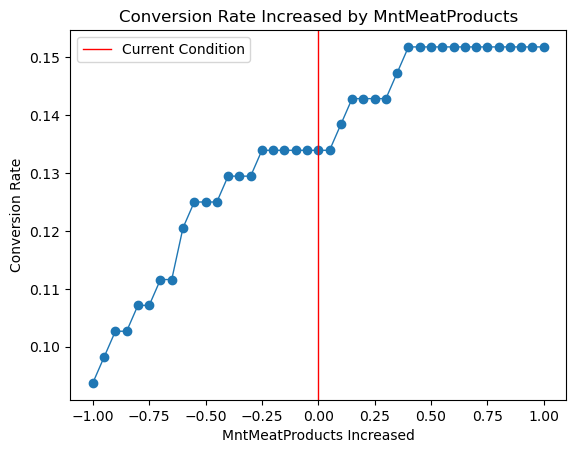

In [172]:
simulation('MntMeatProducts')

Increase `MntMeatProducts` Sales up to 20%

In [178]:
# Case
# We want to run new campaign using existing customers (Re-Targeting) for next year <br>

# Define TP FN FP TN var
tp, fn, fp, tn = cf_matrix.flatten()
    
# Create Simulation Data
df_response = df[df.Response == 1][simulation_features]
df_not_response = df[df.Response == 0][simulation_features]

# Create Improvement Experiments
df_simulation = df_simulation = pd.concat([df_response.sample(int(np.ceil(0.1*df_response.shape[0])), random_state=123), df_not_response.sample(int(np.ceil(0.1*df_not_response.shape[0])), random_state=123)]).reset_index(drop=True)
df_simulation['MntMeatProducts'] = df_simulation['MntMeatProducts']*1.2



# Feature Scaling
temp = X_test[simulation_features].reset_index(drop=True)[:224].copy()
temp[simulation_features] = df_simulation
scaler = RobustScaler()
scaler.fit(X_train)
df_simulation = scaler.transform(temp)
df_simulation = pd.DataFrame(df_simulation, columns=X_smoteenn.columns)
df_simulation = df_simulation[simulation_features]
    
# Predict Simulation Values
simulation_pred = model_xg_tunned.predict(df_simulation)
    
# Adjust Predicted Value to Actual Value
simulation_pred_pos = simulation_pred[simulation_pred==0]
simulation_pred_pos[:(int(np.ceil((fp/(fp+tp))*(simulation_pred[simulation_pred==0].size))))] = 1
simulation_pred_pos
simulation_pred_neg = simulation_pred[simulation_pred==1]
simulation_pred_neg[:(int(np.ceil((fn/(fn+tn))*(simulation_pred[simulation_pred==1].size))))] = 0
simulation_pred_neg
simulation_pred = np.concatenate((simulation_pred_neg, simulation_pred_pos))

#Assumption
Current_CR = 13.52 #%
AOV = 7821.4 #USD
Num_Customers = 2011 #(All Customers in Database will be retargeted)
tp, fn, fp, tn = cf_matrix.flatten()/Num_Customers
treatment_eff_rate = 0.1
treatment_cost = 0.1 * (df['Monetary'].mean()) #10% Discount

# Current Condition
current_cr = df['Response'].value_counts()[1]/df['Response'].shape[0]
current_revenue = current_cr * (df['Monetary'].mean()) * Num_Customers #AOV

# Print
print(f'Current Conversion Rate = {current_cr *100:.2f}%')
print(f'Current Revenue = ${current_revenue:.0f}\n')

new_cr = simulation_pred[simulation_pred==1].size/simulation_pred.size

simulation_cr = new_cr + (treatment_eff_rate * tn)
simulation_revenue_bc = simulation_cr * (df['Monetary'].mean()) * Num_Customers
simulation_cost = ((treatment_eff_rate * tn) + fn) * treatment_cost * Num_Customers
simulation_revenue = simulation_revenue_bc - simulation_cost

print(f'Simulation Conversion Rate After Increase MntMeatProducts Sales up to 20%  = {simulation_cr *100:.2f}%')
print(f'Simulation Revenue After Recommendation = ${simulation_revenue:.0f}')

Current Conversion Rate = 13.53%
Current Revenue = $2127421

Simulation Conversion Rate After Increase MntMeatProducts Sales up to 20%  = 14.46%
Simulation Revenue After Recommendation = $2225468


### Improving Conversion Rate by Increase NumWebPurchases Customers

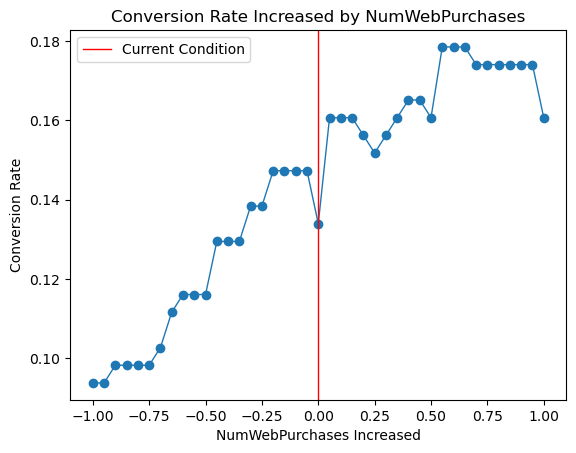

In [174]:
simulation('NumWebPurchases')

Increase `NumWebPurchases` 5%

In [179]:
# Case
# We want to run new campaign using existing customers (Re-Targeting) for next year <br>

# Define TP FN FP TN var
tp, fn, fp, tn = cf_matrix.flatten()
    
# Create Simulation Data
df_response = df[df.Response == 1][simulation_features]
df_not_response = df[df.Response == 0][simulation_features]

# Create Improvement Experiments
df_simulation = df_simulation = pd.concat([df_response.sample(int(np.ceil(0.1*df_response.shape[0])), random_state=123), df_not_response.sample(int(np.ceil(0.1*df_not_response.shape[0])), random_state=123)]).reset_index(drop=True)
df_simulation['NumWebPurchases'] = df_simulation['NumWebPurchases']*1.05



# Feature Scaling
temp = X_test[simulation_features].reset_index(drop=True)[:224].copy()
temp[simulation_features] = df_simulation
scaler = RobustScaler()
scaler.fit(X_train)
df_simulation = scaler.transform(temp)
df_simulation = pd.DataFrame(df_simulation, columns=X_smoteenn.columns)
df_simulation = df_simulation[simulation_features]
    
# Predict Simulation Values
simulation_pred = model_xg_tunned.predict(df_simulation)
    
# Adjust Predicted Value to Actual Value
simulation_pred_pos = simulation_pred[simulation_pred==0]
simulation_pred_pos[:(int(np.ceil((fp/(fp+tp))*(simulation_pred[simulation_pred==0].size))))] = 1
simulation_pred_pos
simulation_pred_neg = simulation_pred[simulation_pred==1]
simulation_pred_neg[:(int(np.ceil((fn/(fn+tn))*(simulation_pred[simulation_pred==1].size))))] = 0
simulation_pred_neg
simulation_pred = np.concatenate((simulation_pred_neg, simulation_pred_pos))

#Assumption
Current_CR = 13.52 #%
AOV = 7821.4 #USD
Num_Customers = 2011 #(All Customers in Database will be retargeted)
tp, fn, fp, tn = cf_matrix.flatten()/Num_Customers
treatment_eff_rate = 0.1
treatment_cost = 0.1 * (df['Monetary'].mean()) #10% Discount

# Current Condition
current_cr = df['Response'].value_counts()[1]/df['Response'].shape[0]
current_revenue = current_cr * (df['Monetary'].mean()) * Num_Customers #AOV

# Print
print(f'Current Conversion Rate = {current_cr *100:.2f}%')
print(f'Current Revenue = ${current_revenue:.0f}\n')

new_cr = simulation_pred[simulation_pred==1].size/simulation_pred.size

simulation_cr = new_cr + (treatment_eff_rate * tn)
simulation_revenue_bc = simulation_cr * (df['Monetary'].mean()) * Num_Customers
simulation_cost = ((treatment_eff_rate * tn) + fn) * treatment_cost * Num_Customers
simulation_revenue = simulation_revenue_bc - simulation_cost

print(f'Simulation Conversion Rate After Increasing NumWebPurchases 5%  = {simulation_cr *100:.2f}%')
print(f'Simulation Revenue After Recommendation = ${simulation_revenue:.0f}')

Current Conversion Rate = 13.53%
Current Revenue = $2127421

Simulation Conversion Rate After Increasing NumWebPurchases 5%  = 16.25%
Simulation Revenue After Recommendation = $2506340


### Improving Conversion Rate by Decrease NumStorePurchases

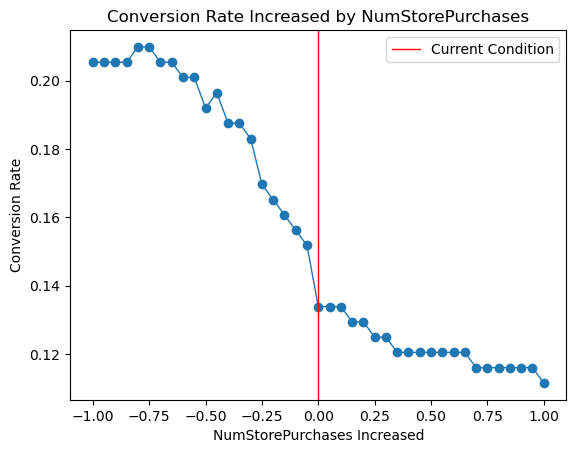

In [183]:
simulation('NumStorePurchases')

Decrease `NumStorePurchases` 15% (15% is enough consider the cost is  high if lowering more than 15%)

In [187]:
# Case
# We want to run new campaign using existing customers (Re-Targeting) for next year <br>

# Define TP FN FP TN var
tp, fn, fp, tn = cf_matrix.flatten()
    
# Create Simulation Data
df_response = df[df.Response == 1][simulation_features]
df_not_response = df[df.Response == 0][simulation_features]

# Create Improvement Experiments
df_simulation = df_simulation = pd.concat([df_response.sample(int(np.ceil(0.1*df_response.shape[0])), random_state=123), df_not_response.sample(int(np.ceil(0.1*df_not_response.shape[0])), random_state=123)]).reset_index(drop=True)
df_simulation['NumStorePurchases'] = df_simulation['NumStorePurchases']*0.85



# Feature Scaling
temp = X_test[simulation_features].reset_index(drop=True)[:224].copy()
temp[simulation_features] = df_simulation
scaler = RobustScaler()
scaler.fit(X_train)
df_simulation = scaler.transform(temp)
df_simulation = pd.DataFrame(df_simulation, columns=X_smoteenn.columns)
df_simulation = df_simulation[simulation_features]
    
# Predict Simulation Values
simulation_pred = model_xg_tunned.predict(df_simulation)
    
# Adjust Predicted Value to Actual Value
simulation_pred_pos = simulation_pred[simulation_pred==0]
simulation_pred_pos[:(int(np.ceil((fp/(fp+tp))*(simulation_pred[simulation_pred==0].size))))] = 1
simulation_pred_pos
simulation_pred_neg = simulation_pred[simulation_pred==1]
simulation_pred_neg[:(int(np.ceil((fn/(fn+tn))*(simulation_pred[simulation_pred==1].size))))] = 0
simulation_pred_neg
simulation_pred = np.concatenate((simulation_pred_neg, simulation_pred_pos))

#Assumption
Current_CR = 13.52 #%
AOV = 7821.4 #USD
Num_Customers = 2011 #(All Customers in Database will be retargeted)
tp, fn, fp, tn = cf_matrix.flatten()/Num_Customers
treatment_eff_rate = 0.1
treatment_cost = 0.1 * (df['Monetary'].mean()) #10% Discount

# Current Condition
current_cr = df['Response'].value_counts()[1]/df['Response'].shape[0]
current_revenue = current_cr * (df['Monetary'].mean()) * Num_Customers #AOV

# Print
print(f'Current Conversion Rate = {current_cr *100:.2f}%')
print(f'Current Revenue = ${current_revenue:.0f}\n')

new_cr = simulation_pred[simulation_pred==1].size/simulation_pred.size

simulation_cr = new_cr + (treatment_eff_rate * tn)
simulation_revenue_bc = simulation_cr * (df['Monetary'].mean()) * Num_Customers
simulation_cost = ((treatment_eff_rate * tn) + fn) * treatment_cost * Num_Customers
simulation_revenue = simulation_revenue_bc - simulation_cost

print(f'Simulation Conversion Rate After Decreasing NumStorePurchases 15%  = {simulation_cr *100:.2f}%')
print(f'Simulation Revenue After Recommendation = ${simulation_revenue:.0f}')

Current Conversion Rate = 13.53%
Current Revenue = $2127421

Simulation Conversion Rate After Decreasing NumStorePurchases 15%  = 16.25%
Simulation Revenue After Recommendation = $2506340


### Combine All Recomendation (MntMeatProducts, NumWebPurchases, NumStorePurchases)

In [190]:
# Case
# We want to run new campaign using existing customers (Re-Targeting) for next year <br>

# Define TP FN FP TN var
tp, fn, fp, tn = cf_matrix.flatten()
    
# Create Simulation Data
df_response = df[df.Response == 1][simulation_features]
df_not_response = df[df.Response == 0][simulation_features]

# Create Improvement Experiments
df_simulation = df_simulation = pd.concat([df_response.sample(int(np.ceil(0.1*df_response.shape[0])), random_state=123), df_not_response.sample(int(np.ceil(0.1*df_not_response.shape[0])), random_state=123)]).reset_index(drop=True)
df_simulation['MntMeatProducts'] = df_simulation['MntMeatProducts']*1.2
df_simulation['NumWebPurchases'] = df_simulation['NumWebPurchases']*1.05
df_simulation['NumStorePurchases'] = df_simulation['NumStorePurchases']*0.85



# Feature Scaling
temp = X_test[simulation_features].reset_index(drop=True)[:224].copy()
temp[simulation_features] = df_simulation
scaler = RobustScaler()
scaler.fit(X_train)
df_simulation = scaler.transform(temp)
df_simulation = pd.DataFrame(df_simulation, columns=X_smoteenn.columns)
df_simulation = df_simulation[simulation_features]
    
# Predict Simulation Values
simulation_pred = model_xg_tunned.predict(df_simulation)
    
# Adjust Predicted Value to Actual Value
simulation_pred_pos = simulation_pred[simulation_pred==0]
simulation_pred_pos[:(int(np.ceil((fp/(fp+tp))*(simulation_pred[simulation_pred==0].size))))] = 1
simulation_pred_pos
simulation_pred_neg = simulation_pred[simulation_pred==1]
simulation_pred_neg[:(int(np.ceil((fn/(fn+tn))*(simulation_pred[simulation_pred==1].size))))] = 0
simulation_pred_neg
simulation_pred = np.concatenate((simulation_pred_neg, simulation_pred_pos))

#Assumption
Current_CR = 13.52 #%
AOV = 7821.4 #USD
Num_Customers = 2011 #(All Customers in Database will be retargeted)
tp, fn, fp, tn = cf_matrix.flatten()/Num_Customers
treatment_eff_rate = 0.1
treatment_cost = 0.1 * (df['Monetary'].mean()) #10% Discount

# Current Condition
current_cr = df['Response'].value_counts()[1]/df['Response'].shape[0]
current_revenue = current_cr * (df['Monetary'].mean()) * Num_Customers #AOV

# Print
print(f'Current Conversion Rate = {current_cr *100:.2f}%')
print(f'Current Revenue = ${current_revenue:.0f}\n')

new_cr = simulation_pred[simulation_pred==1].size/simulation_pred.size

simulation_cr = new_cr + (treatment_eff_rate * tn)
simulation_revenue_bc = simulation_cr * (df['Monetary'].mean()) * Num_Customers
simulation_cost = ((treatment_eff_rate * tn) + fn) * treatment_cost * Num_Customers
simulation_revenue = simulation_revenue_bc - simulation_cost

print(f'Simulation Conversion Rate After Combine All Recommendation  = {simulation_cr *100:.2f}%')
print(f'Simulation Revenue After Recommendation = ${simulation_revenue:.0f}')

Current Conversion Rate = 13.53%
Current Revenue = $2127421

Simulation Conversion Rate After Combine All Recommendation  = 19.37%
Simulation Revenue After Recommendation = $2997866


In [40]:
((2997866-2127421)/2127421)*100

40.91550285533517